In [13]:
import numpy as np
import pandas as pd

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
raw = pd.read_csv('/content/drive/MyDrive/하영/캐글데이터로데이터분석하기/kaggle_survey_2020_responses.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
raw.head()

Time from Start to Finish (seconds)  ...                                        Q35_B_OTHER
0               Duration (in seconds)  ...  In the next 2 years, do you hope to become mor...
1                                1838  ...                                                NaN
2                              289287  ...                                                NaN
3                                 860  ...                                                NaN
4                                 507  ...                                                NaN

[5 rows x 355 columns]

In [17]:
question = raw.iloc[0] # 위의 데이터프레임에서 0번째 인덱스 행을 가져옴.
question # 질문내용이 들어감.

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [18]:
answer = raw.drop([0]) # 0번째를 제외하고 나머지
answer

Time from Start to Finish (seconds)     Q1  ... Q35_B_Part_10 Q35_B_OTHER
1                                    1838  35-39  ...           NaN         NaN
2                                  289287  30-34  ...           NaN         NaN
3                                     860  35-39  ...          None         NaN
4                                     507  30-34  ...           NaN         NaN
5                                      78  30-34  ...           NaN         NaN
...                                   ...    ...  ...           ...         ...
20032                                 126  18-21  ...           NaN         NaN
20033                                 566  55-59  ...          None         NaN
20034                                 238  30-34  ...           NaN         NaN
20035                                 625  22-24  ...           NaN         NaN
20036                                1031  22-24  ...           NaN         NaN

[20036 rows x 355 columns]

In [19]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20036 entries, 1 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.4+ MB


Q1. What is your age (# years)?

In [20]:
question["Q1"]

'What is your age (# years)?'

In [21]:
answer["Q1"] # pandas 시리즈 형태로 가져옴

1        35-39
2        30-34
3        35-39
4        30-34
5        30-34
         ...  
20032    18-21
20033    55-59
20034    30-34
20035    22-24
20036    22-24
Name: Q1, Length: 20036, dtype: object

In [22]:
answer["Q1"].value_counts() # 빈도수를 가져올 수 있다

25-29    4011
22-24    3786
18-21    3469
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

In [23]:
answer["Q1"].value_counts(normalize=True) * 100 # normalize=True 하면 비율을 볼 수 있다

25-29    20.018966
22-24    18.895987
18-21    17.313835
30-34    14.029746
35-39     9.937113
40-44     6.972450
45-49     4.931124
50-54     3.483729
55-59     2.051308
60-69     1.986424
70+       0.379317
Name: Q1, dtype: float64

In [24]:
answer["Q1"].value_counts().sort_index() # 인덱스 순으로 정렬(보통은 많은 순서대로 정렬됨)

18-21    3469
22-24    3786
25-29    4011
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

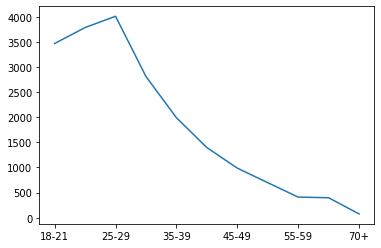

In [25]:
answer["Q1"].value_counts().sort_index().plot()

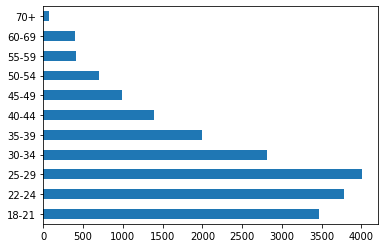

In [26]:
answer["Q1"].value_counts().sort_index().plot.barh()

In [27]:
# 시각화를 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina") # retina 설정

plt.style.use("seaborn-whitegrid") # 스타일 지정

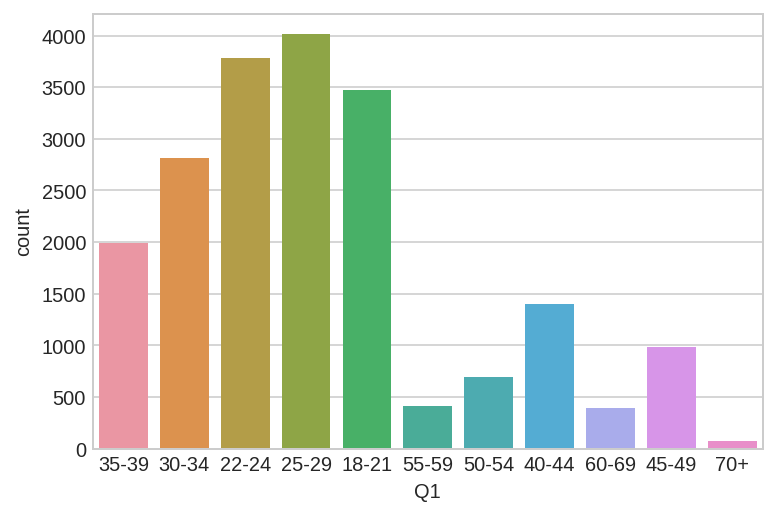

In [28]:
sns.countplot(data=answer, x="Q1")

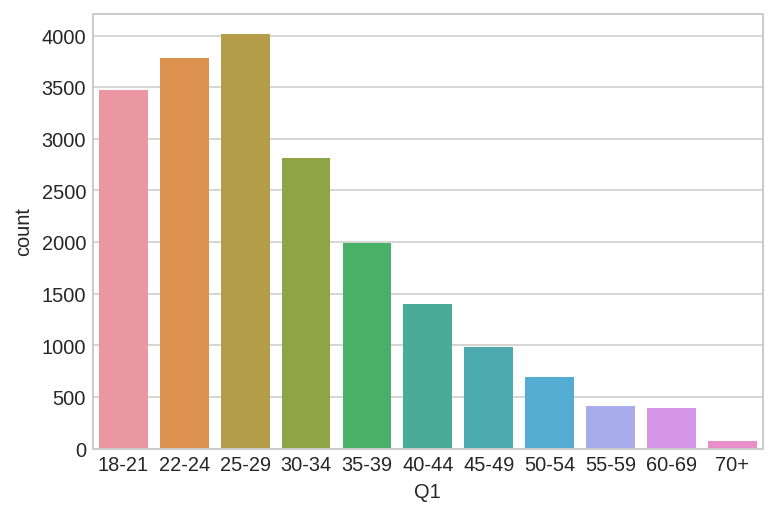

In [29]:
sns.countplot(data=answer.sort_values("Q1"), x="Q1")

Text(0.5, 1.0, 'What is your age (# years)?')

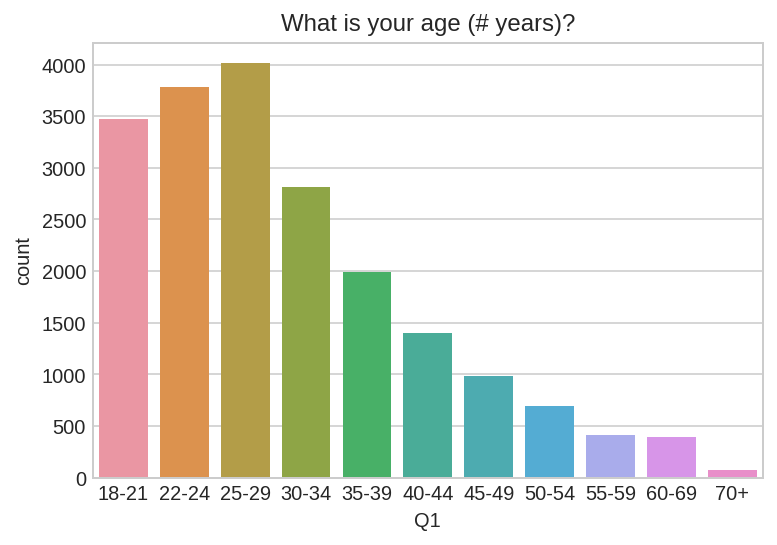

In [30]:
sns.countplot(data=answer.sort_values("Q1"), x="Q1").set_title(question["Q1"])

Text(0.5, 1.0, 'What is your age (# years)?')

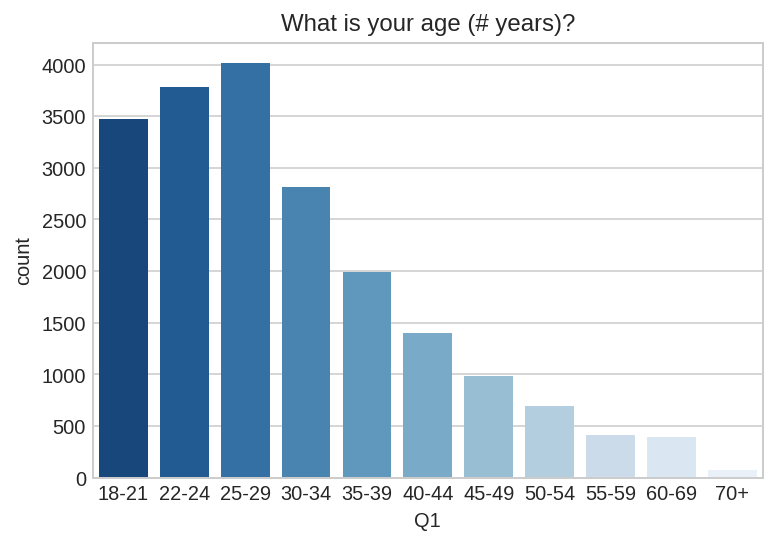

In [31]:
sns.countplot(data=answer.sort_values("Q1"), x="Q1", palette="Blues_r").set_title(question["Q1"])

Q2 What is your gender? - Selected Choice

In [32]:
question_no = "Q2"
Q2 = answer[question_no].value_counts()
Q2

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

Text(0.5, 1.0, 'What is your gender? - Selected Choice')

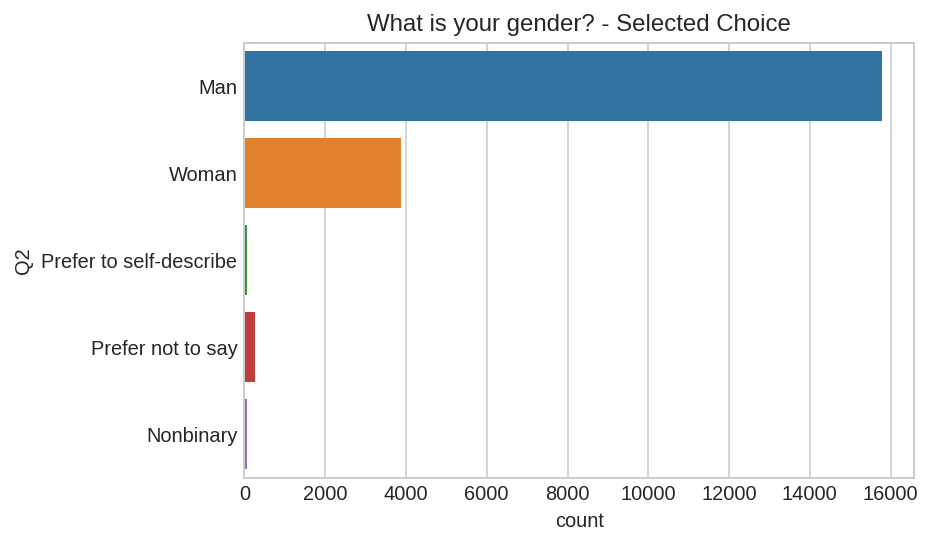

In [33]:
sns.countplot(data=answer, y=question_no).set_title(question[question_no])

In [136]:
answer["Q1"].value_counts()
# answer["Q2"]

25-29    4011
22-24    3786
18-21    3469
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

In [138]:
# 2개의 변수에 대해서 빈도수 세고 싶을 때
q1q2 = pd.crosstab(answer["Q1"], answer["Q2"])
q1q2

Q2      Man  Nonbinary  Prefer not to say  Prefer to self-describe  Woman
Q1                                                                       
18-21  2611          8                 42                       12    796
22-24  2838         12                 41                        9    886
25-29  3128         13                 42                        9    819
30-34  2246          8                 44                        9    504
35-39  1581          7                 33                        2    368
40-44  1153          2                 15                        5    222
45-49   840          1                 17                        4    126
50-54   605          0                 10                        2     81
55-59   353          0                 13                        0     45
60-69   362          1                  4                        2     29
70+      72          0                  2                        0      2

In [142]:
# 남녀만 보려면
q1q2[["Man","Woman"]]
q1q2[["Man"]] # 하나일 때도 리스트형태로 하면 데이터프레임 형태로 출력할 수 있다.

Q2      Man
Q1         
18-21  2611
22-24  2838
25-29  3128
30-34  2246
35-39  1581
40-44  1153
45-49   840
50-54   605
55-59   353
60-69   362
70+      72

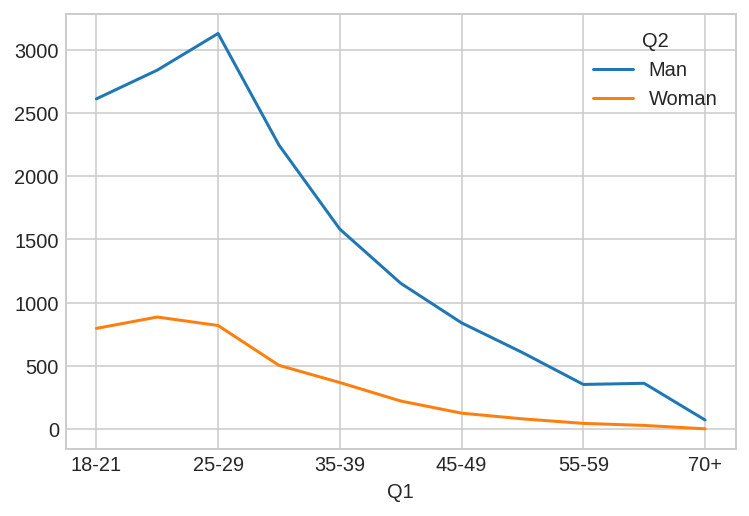

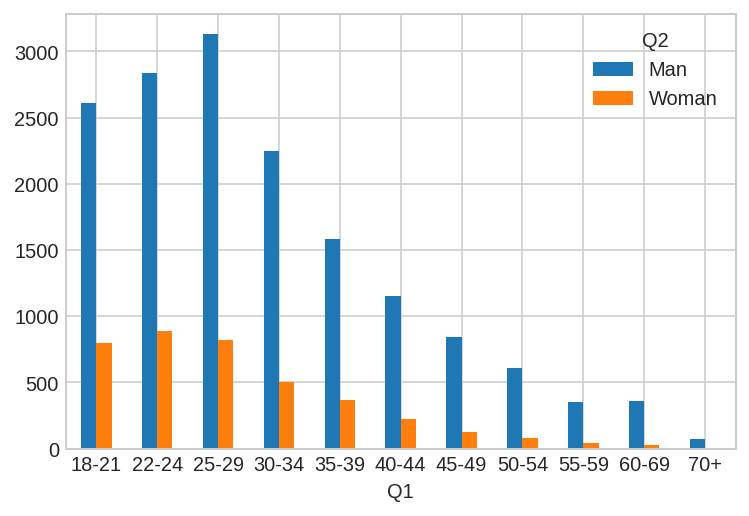

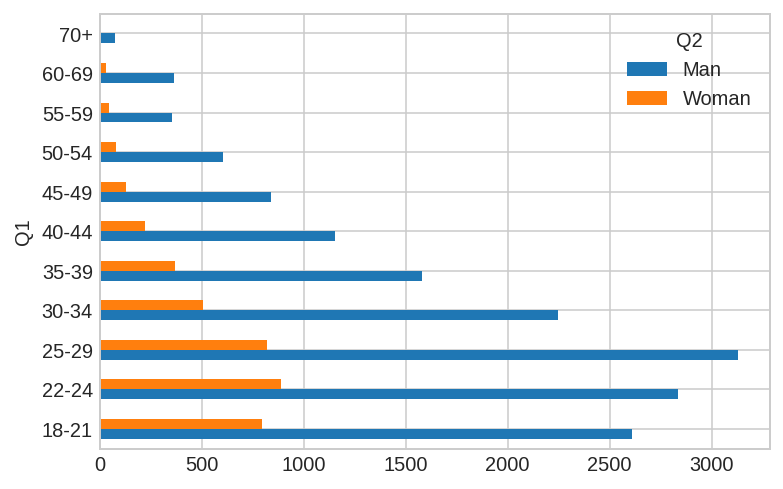

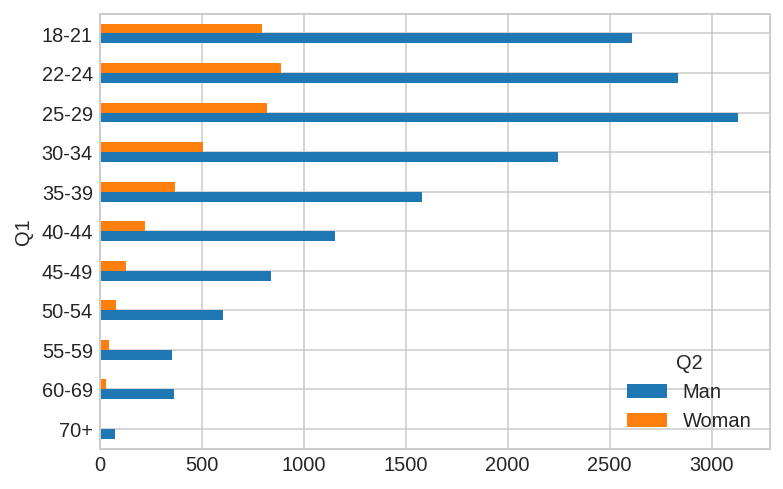

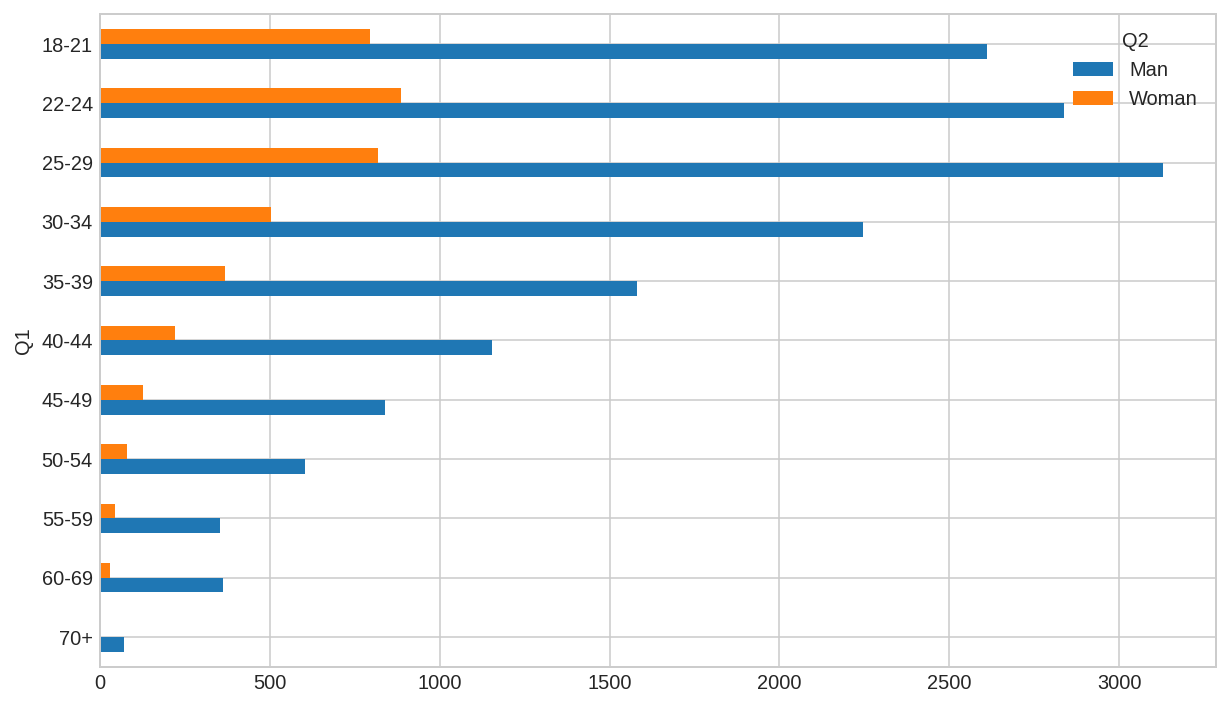

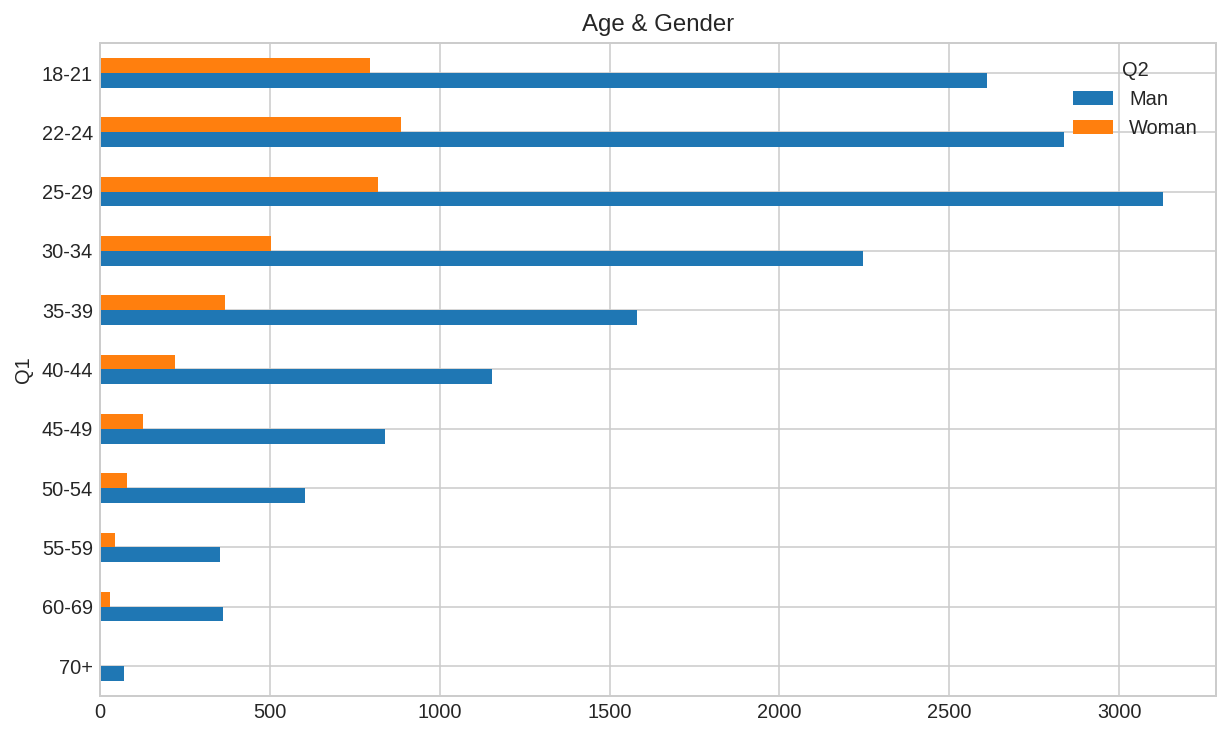

In [150]:
# pandas plot 
q1q2[["Man","Woman"]].plot() # 연속적일 때
q1q2[["Man","Woman"]].plot.bar(rot=0) # 불연속적일 때, rot=0 글자 똑바로
q1q2[["Man","Woman"]].plot.barh() # 가로로
q1q2[["Man","Woman"]].sort_index(ascending=False).plot.barh() # 인덱스 순으로
q1q2[["Man","Woman"]].sort_index(ascending=False).plot.barh(figsize=(10,6)) # 사이즈 조정
q1q2[["Man","Woman"]].sort_index(ascending=False).plot.barh(figsize=(10,6), title="Age & Gender") # 타이틀 지정

Text(0.5, 1.0, 'Age & Gender')

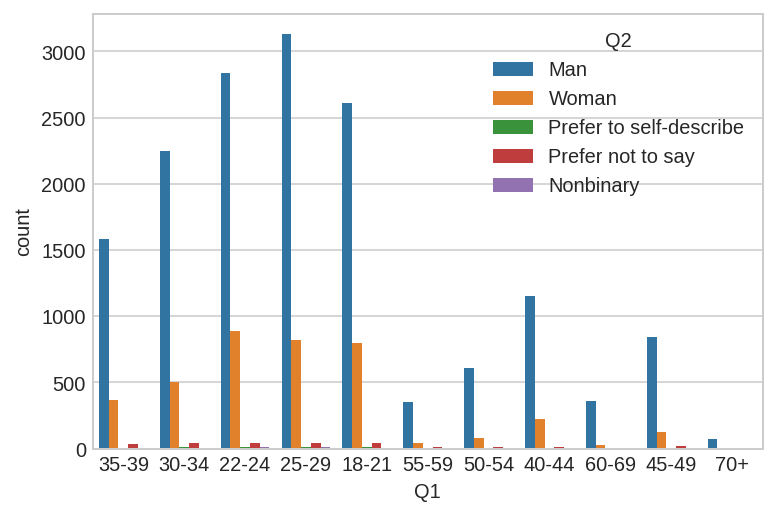

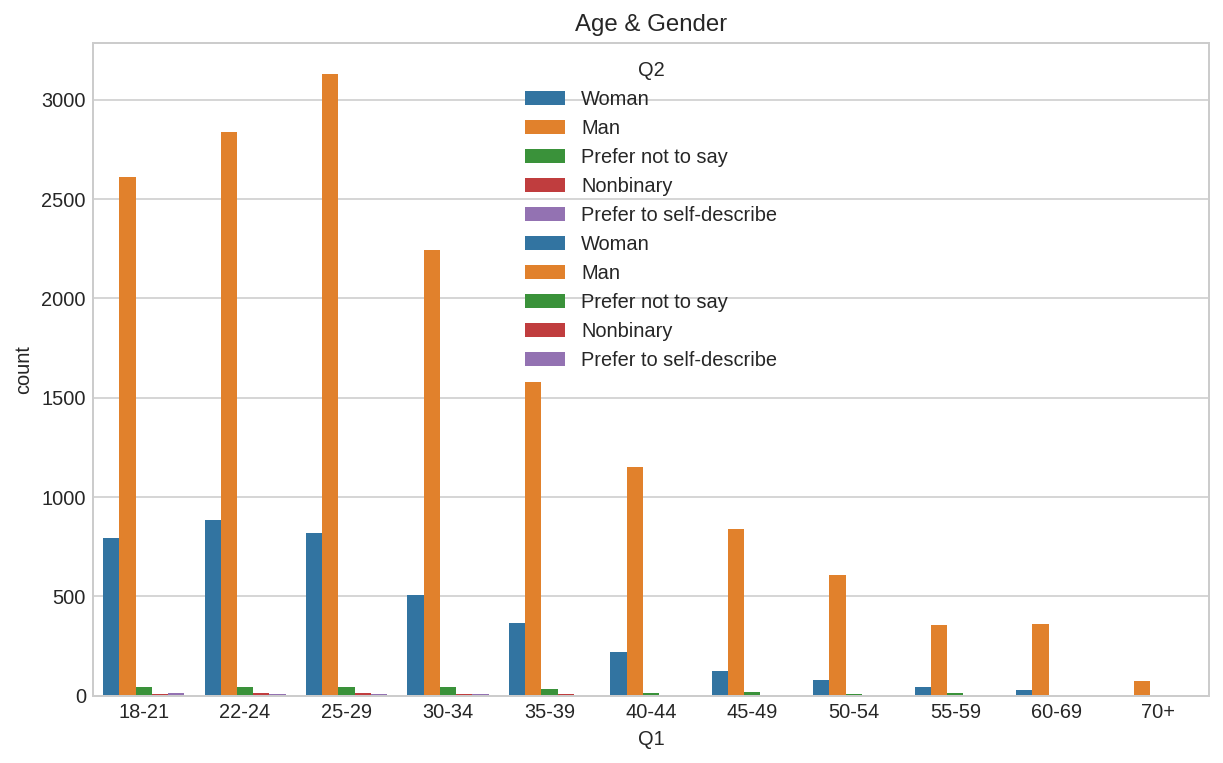

In [155]:
# seaborn으로 그리는 방법
sns.countplot(data=answer, x="Q1", hue="Q2") # hue : Q2에 따라서 색 지정
plt.figure(figsize=(10,6)) # 그래프 사이즈 조정
sns.countplot(data=answer.sort_values("Q1"), x="Q1", hue="Q2") # 연령대로 정렬
sns.countplot(data=answer.sort_values("Q1"), x="Q1", hue="Q2").set_title("Age & Gender") # 타이틀 지정

Q3 In which country do you currently reside?

In [34]:
answer.head() # Q1 ~ Q6까지는 하나의 문항만 선택, Q7부터는 여러 문항 선택

Time from Start to Finish (seconds)     Q1  ... Q35_B_Part_10 Q35_B_OTHER
1                                1838  35-39  ...           NaN         NaN
2                              289287  30-34  ...           NaN         NaN
3                                 860  35-39  ...          None         NaN
4                                 507  30-34  ...           NaN         NaN
5                                  78  30-34  ...           NaN         NaN

[5 rows x 355 columns]

In [35]:
# 반복되는 코드를 함수화 하기
def show_countplot_by_qno(qno, fsize=(10,6), order=None):
  if not order:
    order = answer[qno].value_counts().index

  plt.figure(figsize=fsize)
  sns.countplot(data=answer, y=qno, palette="Blues_r", order=order)

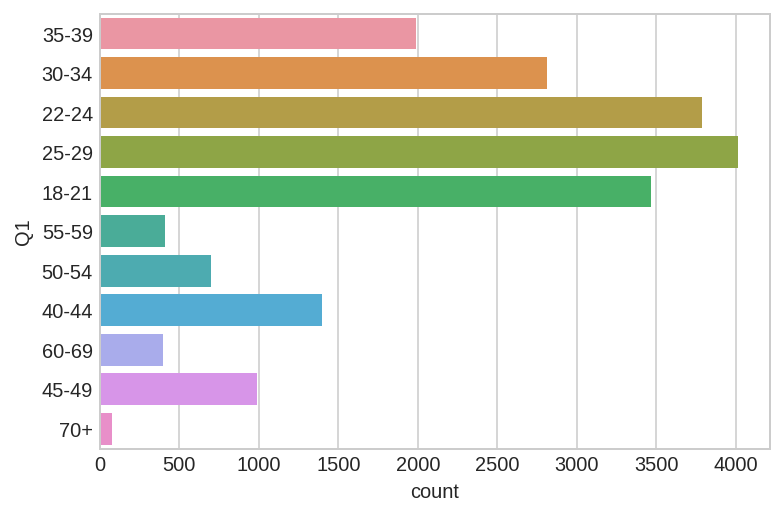

In [36]:
# 간소화 버전
def show_countplot_by_qno(qno):
  sns.countplot(data=answer, y=qno)

show_countplot_by_qno("Q1")

In [37]:
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

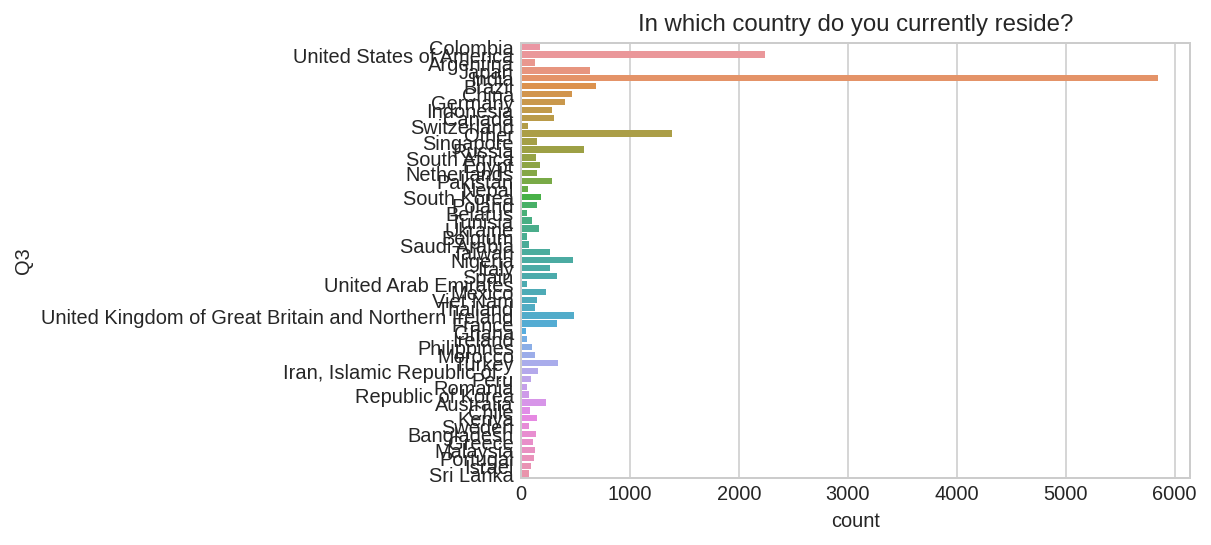

In [38]:
def show_countplot_by_qno(qno):
  sns.countplot(data=answer, y=qno).set_title(question[qno])

# show_countplot_by_qno("Q1")
# show_countplot_by_qno("Q2")
show_countplot_by_qno("Q3") # 그래프 사이즈 지정이 필요하겠다

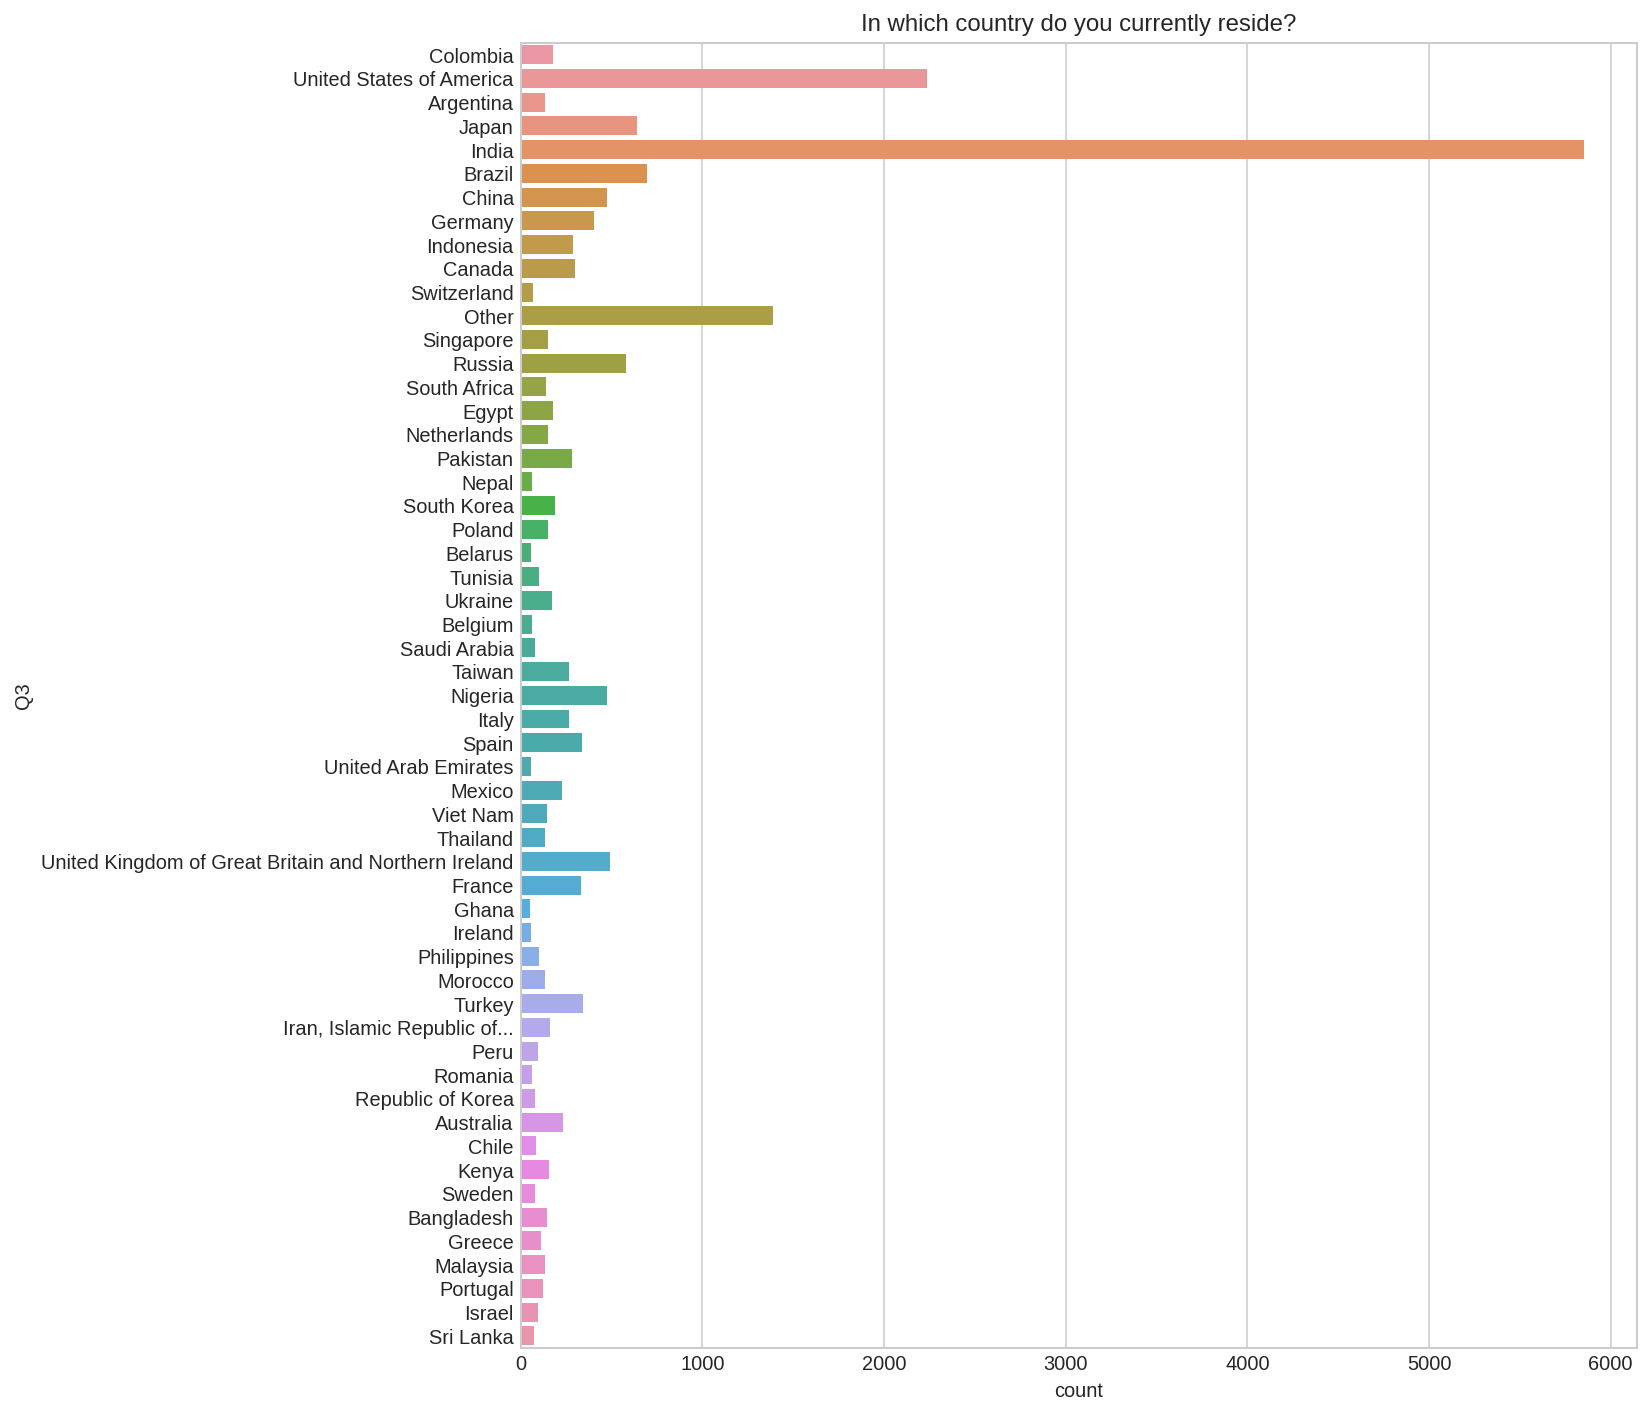

In [39]:
def show_countplot_by_qno(qno):
  plt.figure(figsize=(10,12))
  sns.countplot(data=answer, y=qno).set_title(question[qno])

show_countplot_by_qno("Q3") # 근데 모든 그래프를 이렇게 크게 만들면 안좋음.

In [40]:
def show_countplot_by_qno(qno, fsize=(10,6)): # 기본값은 (10,6) 으로 지정
  plt.figure(figsize=fsize)
  sns.countplot(data=answer, y=qno).set_title(question[qno])

# show_countplot_by_qno("Q3", fsize=(10,12))
# show_countplot_by_qno("Q4")
# show_countplot_by_qno("Q5")
# show_countplot_by_qno("Q6")
show_countplot_by_qno("Q7") # Q7은 기본 형식으로 그릴 수 없음.

ValueError: ignored

<Figure size 720x432 with 0 Axes>

In [41]:
answer["Q1"].value_counts().index # 빈도수 많은 순서대로 index값을 뽑아옴

Index(['25-29', '22-24', '18-21', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-69', '70+'],
      dtype='object')

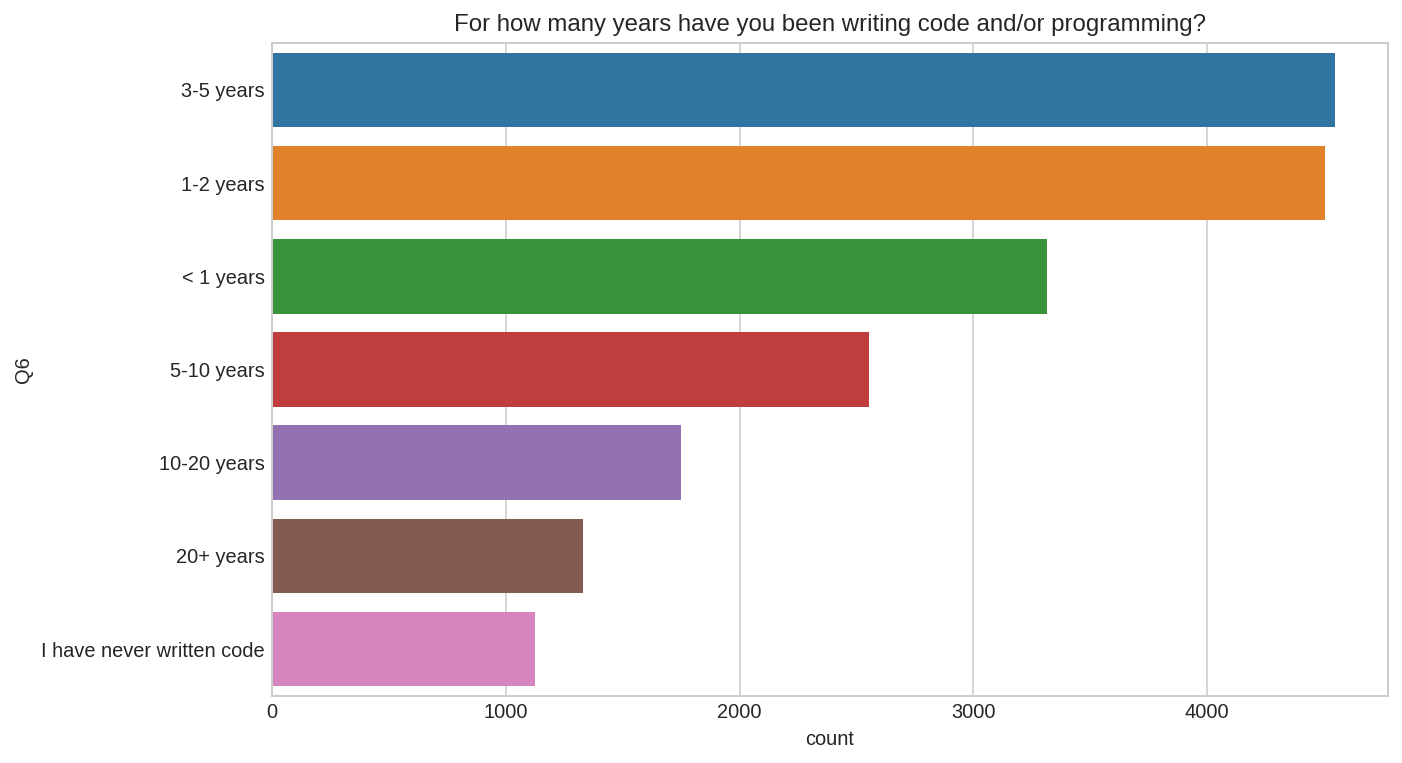

In [42]:
# 값이 많은 순으로 정렬하게 하려면
def show_countplot_by_qno(qno, fsize=(10,6)):
  order = answer[qno].value_counts().index
  plt.figure(figsize=fsize)
  sns.countplot(data=answer, y=qno, 
                order=order
                ).set_title(question[qno])

show_countplot_by_qno("Q6")

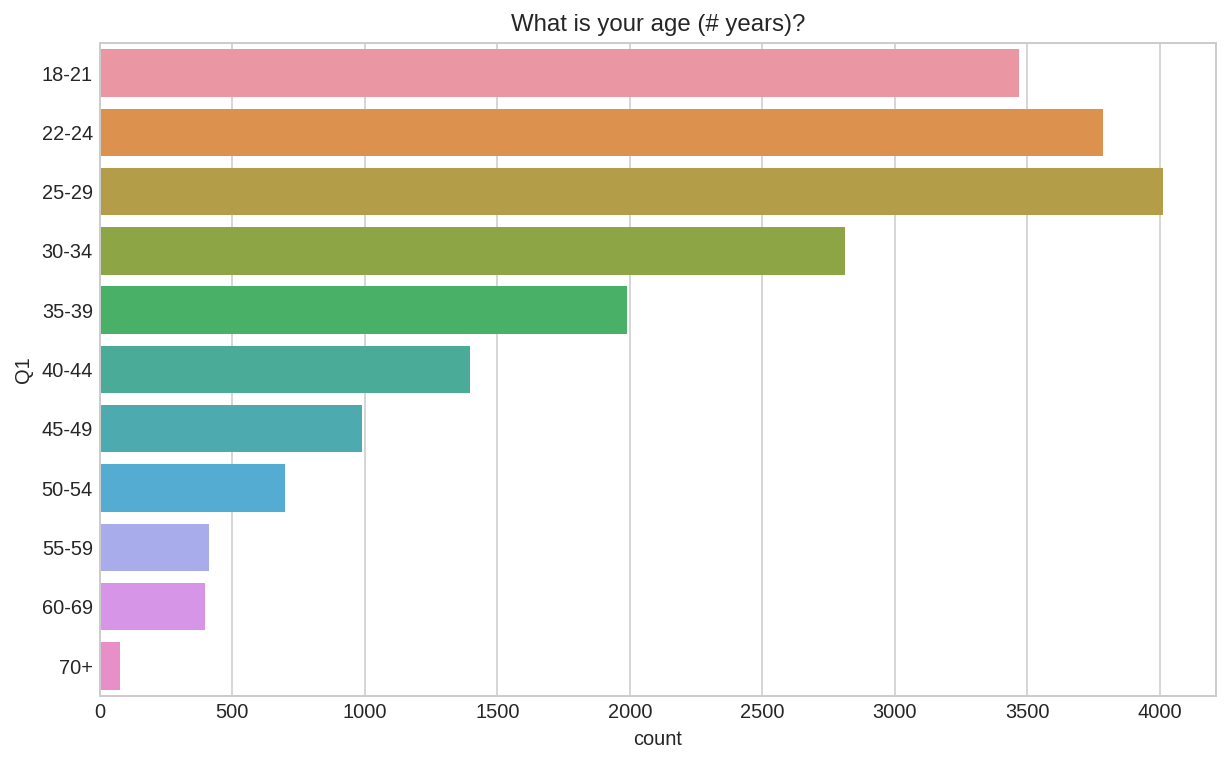

In [43]:
# order을 따로 정하고 싶을 때를 위해 파라미터로 빼기
def show_countplot_by_qno(qno, fsize=(10,6), order=None):
  if not order:
    order = answer[qno].value_counts().index
  plt.figure(figsize=fsize)
  sns.countplot(data=answer, y=qno, 
                order=order
                ).set_title(question[qno])

q1_cols = answer["Q1"].value_counts().sort_index().index.tolist()
show_countplot_by_qno("Q1", order=q1_cols)

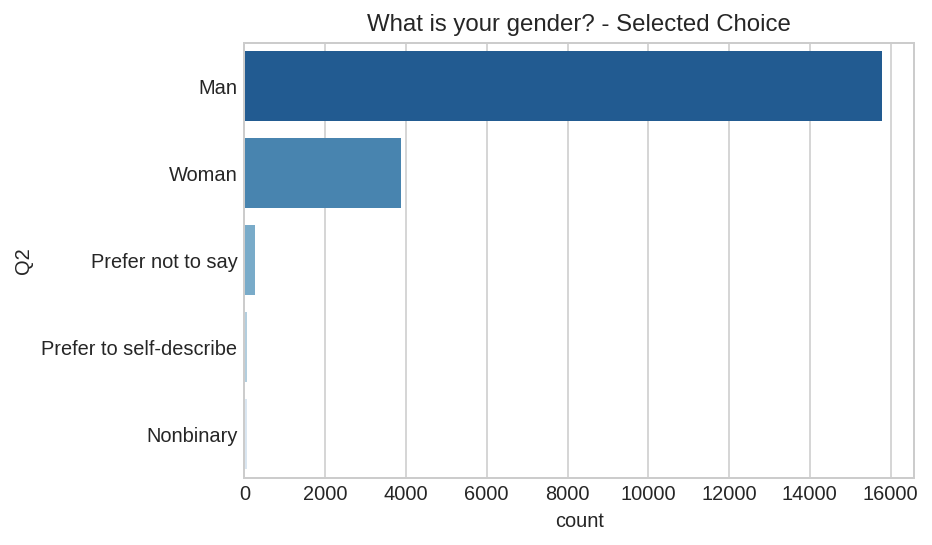

In [61]:
# 팔레트 지정
def show_countplot_by_qno(qno, fsize=(10,6), order=None):
  if not order:
    order = answer[qno].value_counts().index
  plt.figure(figsize=fsize)
  sns.countplot(data=answer, y=qno, 
                order=order, palette="Blues_r"
                ).set_title(question[qno])

show_countplot_by_qno("Q2", fsize=(6,4))

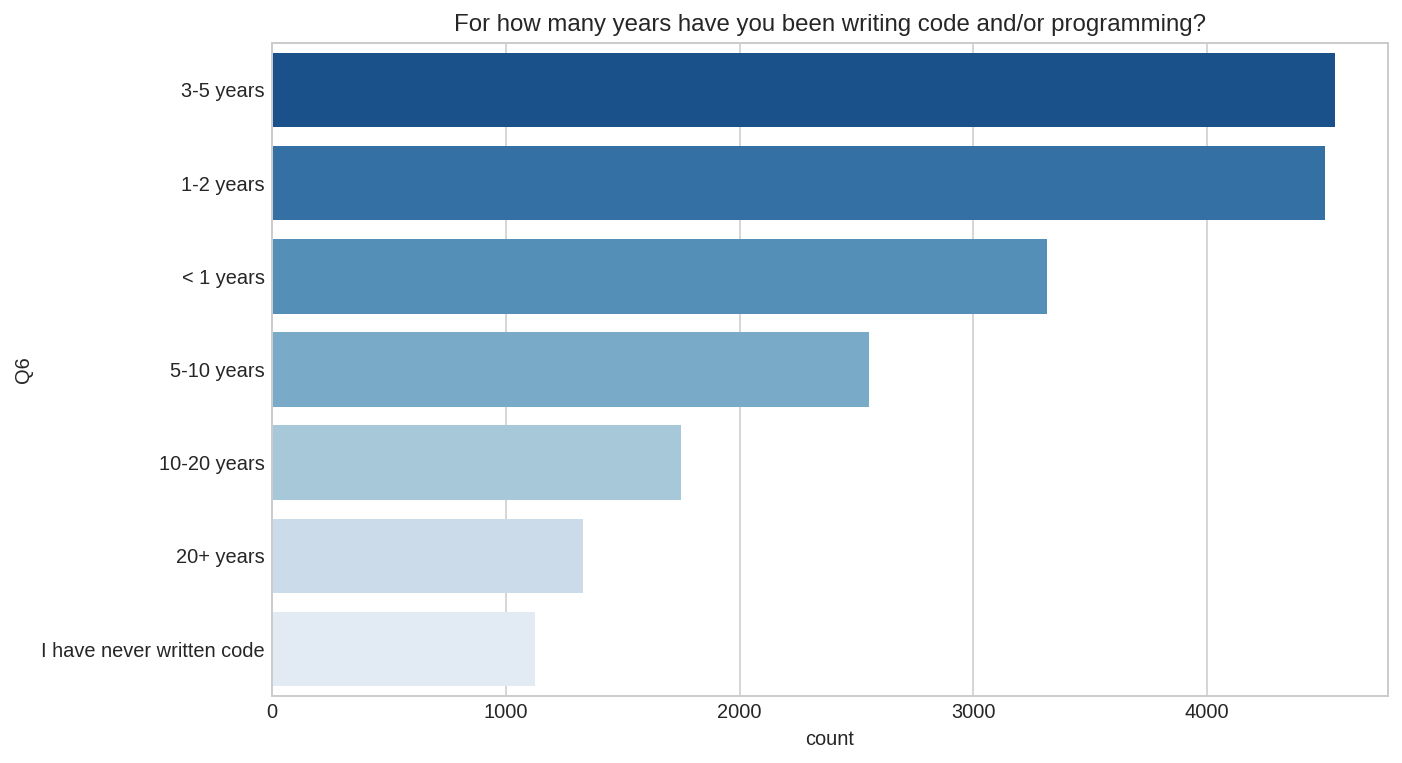

In [52]:
# show_countplot_by_qno("Q4") # 학력
# show_countplot_by_qno("Q5") # 직업군 분포
show_countplot_by_qno("Q6") # 경력

In [53]:
# Q7부터는 함수를 사용하지 못함.
show_countplot_by_qno("Q7")

KeyError: ignored

In [55]:
# show_countplot_by_qno? # 도움말
# show_countplot_by_qno?? # 소스코드

Q4 What is the highest level of formal education that you have attained or plan to attain within the next 2 years

05 Select the title most similar to your current role (or most recent title if retired): - Selected Choice

06 For how many years have you been writing code and/or programming?

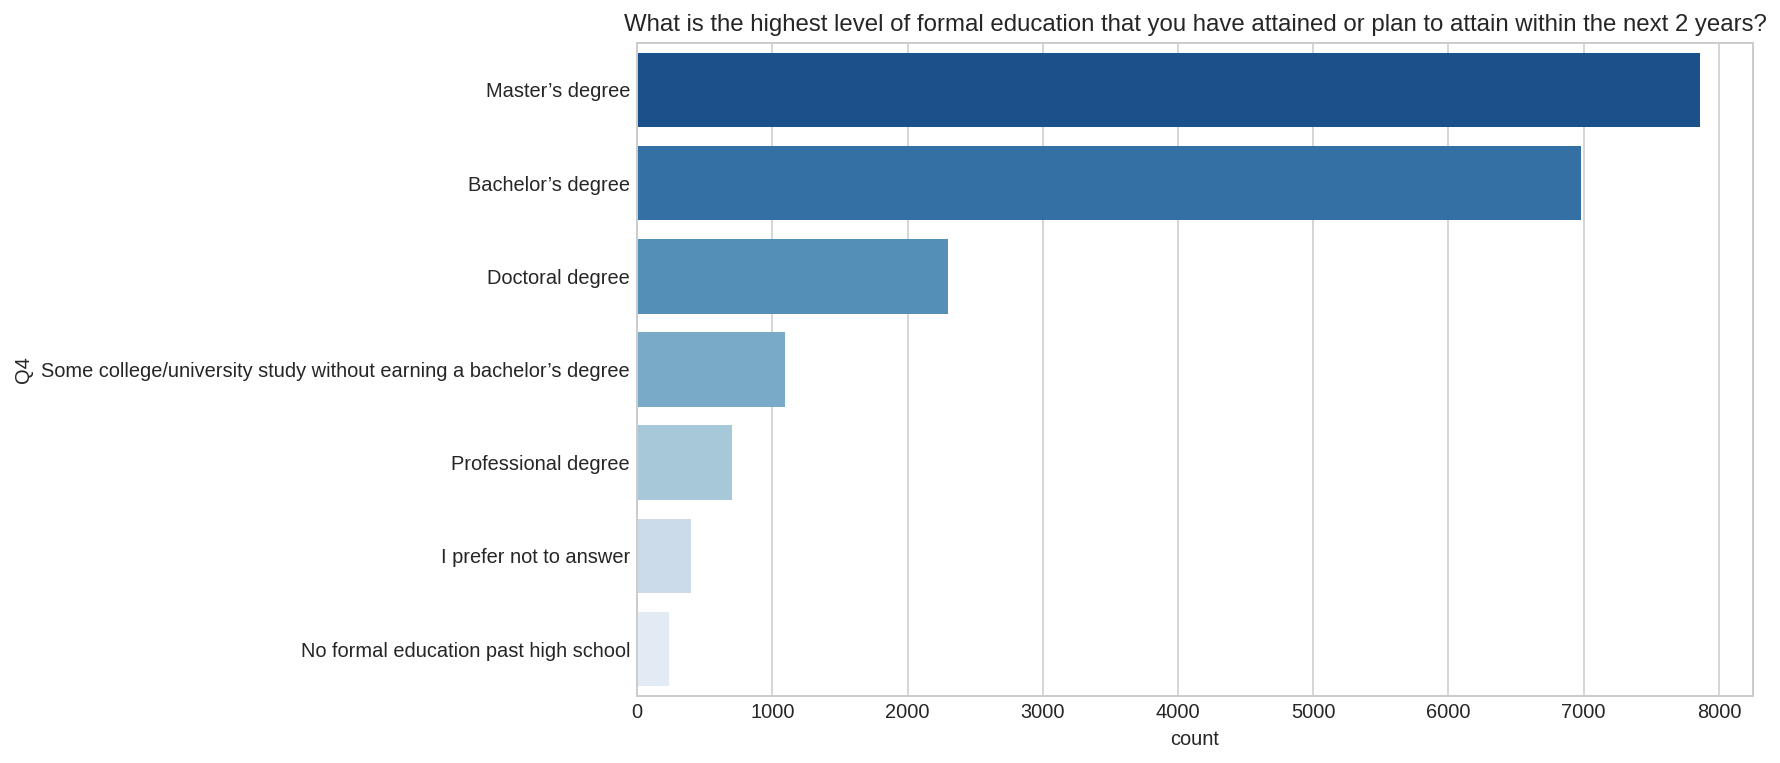

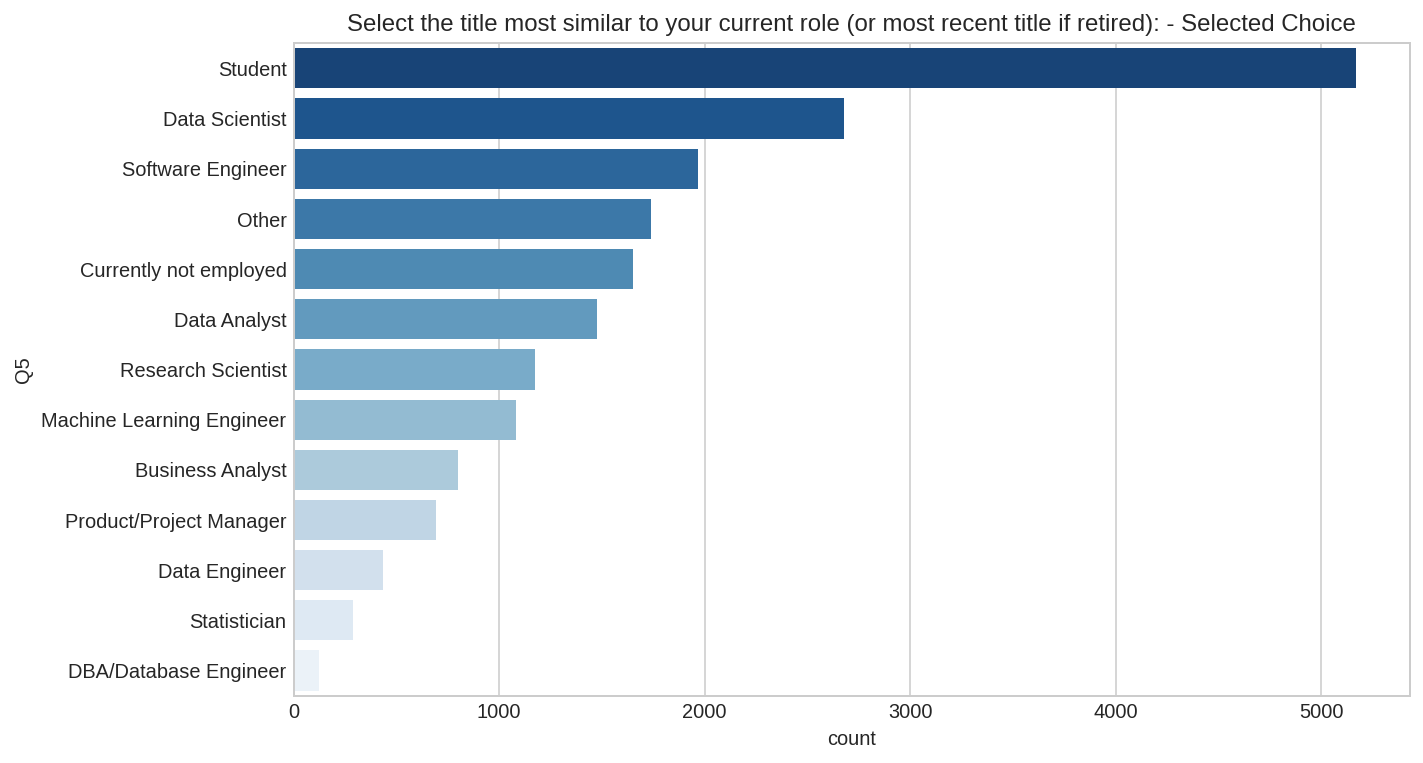

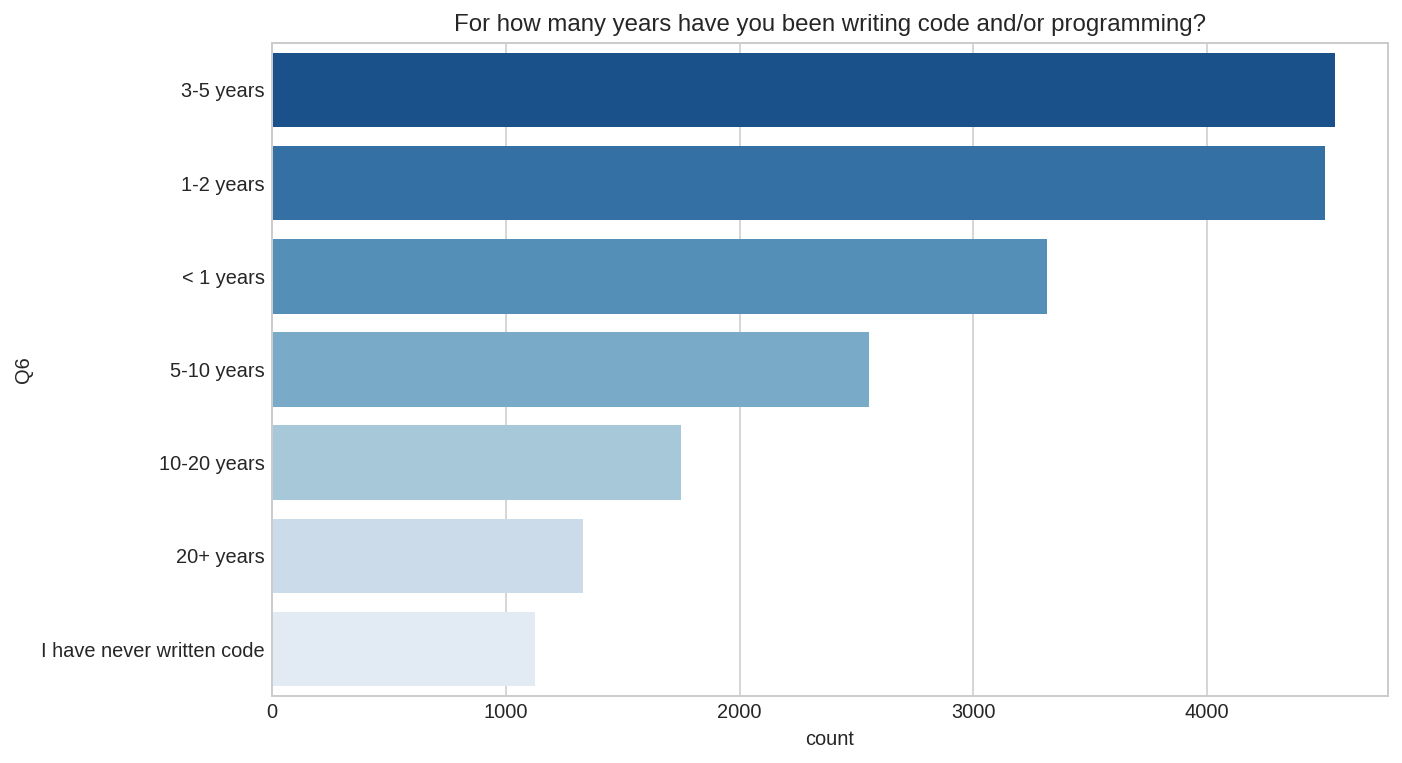

In [63]:
show_countplot_by_qno("Q4")
show_countplot_by_qno("Q5")
show_countplot_by_qno("Q6")

Q7 What programming languages do you use on a regular basis? (Select all that apply)
- pandas filter & describe 사용!

In [68]:
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [69]:
question.filter("Q7") # 정확히 Q7과 매치되는 것

Series([], Name: 0, dtype: object)

In [71]:
question.filter(regex="Q7") # Q7이 들어가는 것. regex 정규식

Q7_Part_1     What programming languages do you use on a reg...
Q7_Part_2     What programming languages do you use on a reg...
Q7_Part_3     What programming languages do you use on a reg...
Q7_Part_4     What programming languages do you use on a reg...
Q7_Part_5     What programming languages do you use on a reg...
Q7_Part_6     What programming languages do you use on a reg...
Q7_Part_7     What programming languages do you use on a reg...
Q7_Part_8     What programming languages do you use on a reg...
Q7_Part_9     What programming languages do you use on a reg...
Q7_Part_10    What programming languages do you use on a reg...
Q7_Part_11    What programming languages do you use on a reg...
Q7_Part_12    What programming languages do you use on a reg...
Q7_OTHER      What programming languages do you use on a reg...
Name: 0, dtype: object

In [73]:
question.filter(regex="Q7")[0]

'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'

In [74]:
question.filter(regex="Q7")[0].split("-")[0]

'What programming languages do you use on a regular basis? (Select all that apply) '

In [65]:
answer_Q7 = answer.filter(regex="Q7")
answer_Q7

Q7_Part_1 Q7_Part_2 Q7_Part_3  ... Q7_Part_11 Q7_Part_12 Q7_OTHER
1        Python         R       SQL  ...     MATLAB        NaN    Other
2        Python         R       SQL  ...        NaN        NaN      NaN
3           NaN       NaN       NaN  ...        NaN        NaN      NaN
4        Python       NaN       SQL  ...        NaN        NaN      NaN
5        Python       NaN       NaN  ...        NaN        NaN      NaN
...         ...       ...       ...  ...        ...        ...      ...
20032       NaN       NaN       NaN  ...        NaN        NaN      NaN
20033    Python       NaN       NaN  ...        NaN        NaN      NaN
20034    Python       NaN       NaN  ...        NaN        NaN      NaN
20035    Python       NaN       SQL  ...        NaN        NaN      NaN
20036    Python       NaN       NaN  ...        NaN        NaN      NaN

[20036 rows x 13 columns]

In [77]:
# NaN = 결측치, Q7_Part_1의 Python 응답수만 알아보려고 할 때
# answer_Q7.isnull()
answer_Q7.notnull().sum()
# 이건 파이썬인지 SQL인지 모름

Q7_Part_1     15530
Q7_Part_2      4277
Q7_Part_3      7535
Q7_Part_4      3315
Q7_Part_5      3827
Q7_Part_6      3367
Q7_Part_7      2995
Q7_Part_8       262
Q7_Part_9       198
Q7_Part_10     1776
Q7_Part_11     2217
Q7_Part_12      206
Q7_OTHER       1945
dtype: int64

In [78]:
answer_Q7.describe() # 기술 통계 값
# unique가 1이기 때문에 언어 하나 말고는 다 결측치라는 소리
# top과 count를 활용하면 되겠다고 보임

Q7_Part_1 Q7_Part_2 Q7_Part_3  ... Q7_Part_11 Q7_Part_12 Q7_OTHER
count      15530      4277      7535  ...       2217        206     1945
unique         1         1         1  ...          1          1        1
top       Python         R       SQL  ...     MATLAB       None    Other
freq       15530      4277      7535  ...       2217        206     1945

[4 rows x 13 columns]

In [79]:
answer_Q7_desc = answer_Q7.describe()
answer_Q7_desc

Q7_Part_1 Q7_Part_2 Q7_Part_3  ... Q7_Part_11 Q7_Part_12 Q7_OTHER
count      15530      4277      7535  ...       2217        206     1945
unique         1         1         1  ...          1          1        1
top       Python         R       SQL  ...     MATLAB       None    Other
freq       15530      4277      7535  ...       2217        206     1945

[4 rows x 13 columns]

In [80]:
answer_Q7_desc.loc["top"] # 행 가져올 때는 loc사용

Q7_Part_1         Python
Q7_Part_2              R
Q7_Part_3            SQL
Q7_Part_4              C
Q7_Part_5            C++
Q7_Part_6           Java
Q7_Part_7     Javascript
Q7_Part_8          Julia
Q7_Part_9          Swift
Q7_Part_10          Bash
Q7_Part_11        MATLAB
Q7_Part_12          None
Q7_OTHER           Other
Name: top, dtype: object

In [82]:
# answer_Q7_desc.loc["top", "count"] # 2개 이상 사용할 떄는 리스트로 사용해야 함.
answer_Q7_desc.loc[["top", "count"]]

Q7_Part_1 Q7_Part_2 Q7_Part_3  ... Q7_Part_11 Q7_Part_12 Q7_OTHER
top      Python         R       SQL  ...     MATLAB       None    Other
count     15530      4277      7535  ...       2217        206     1945

[2 rows x 13 columns]

In [86]:
# 행 값을 컬럼으로 오게 하기 위해 T 사용. 행과열 바꿔줌.
# answer_Q7_desc.loc[["top", "count"]].T
# 그 다음에 top별로 빈도수 가져오기
answer_Q7_desc.loc[["top", "count"]].T.set_index("top")

count
top              
Python      15530
R            4277
SQL          7535
C            3315
C++          3827
Java         3367
Javascript   2995
Julia         262
Swift         198
Bash         1776
MATLAB       2217
None          206
Other        1945

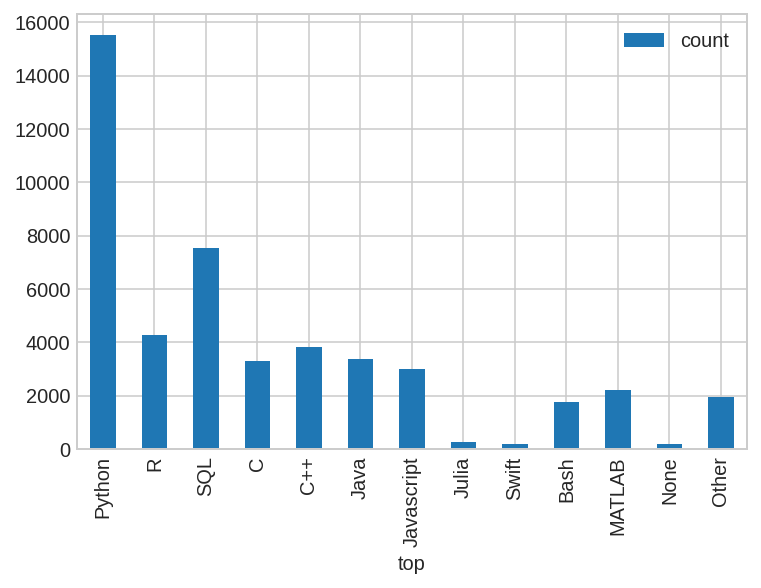

In [84]:
answer_Q7_desc.loc[["top", "count"]].T.set_index("top").plot.bar()

In [89]:
answer_Q7_count = answer_Q7_desc.loc[["top", "count"]].T
answer_Q7_count = answer_Q7_count.set_index("top")
answer_Q7_count = answer_Q7_count.sort_values("count", ascending=False)
answer_Q7_count

count
top              
Python      15530
SQL          7535
R            4277
C++          3827
Java         3367
C            3315
Javascript   2995
MATLAB       2217
Other        1945
Bash         1776
Julia         262
None          206
Swift         198

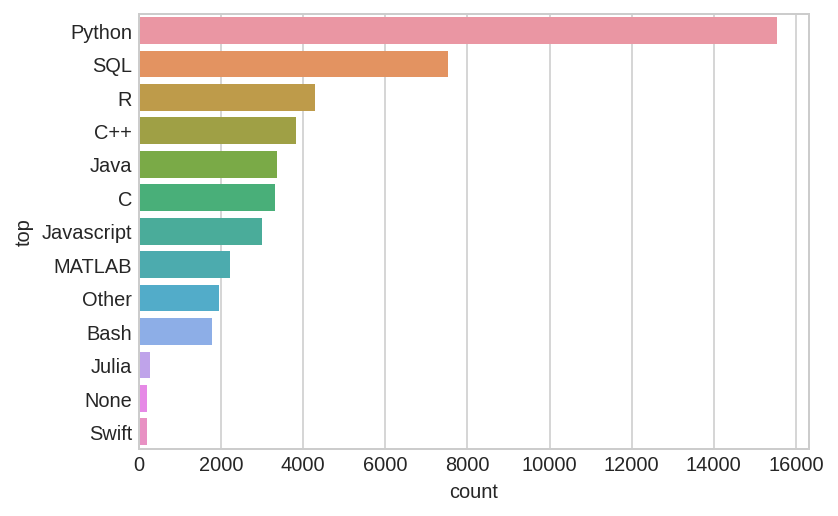

In [91]:
sns.barplot(data=answer_Q7_count, y=answer_Q7_count.index, x="count")

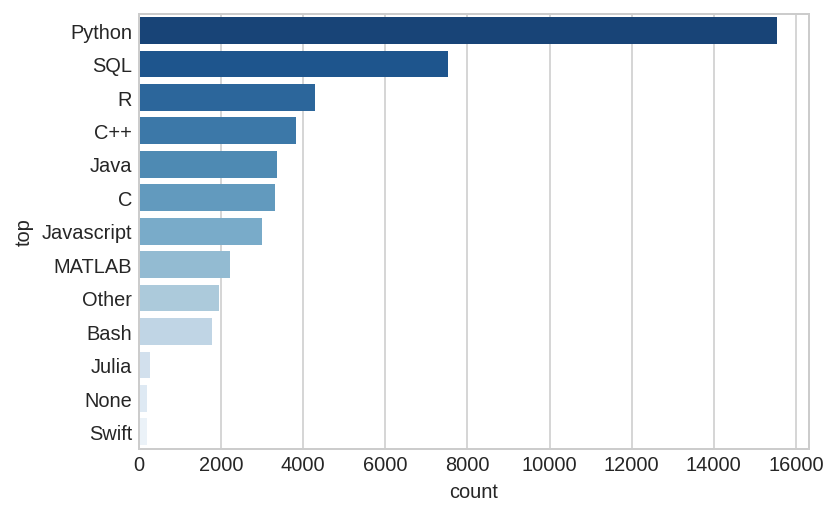

In [93]:
sns.barplot(data=answer_Q7_count, y=answer_Q7_count.index, x="count", palette="Blues_r")

In [99]:
question.filter(regex="Q7")
question.filter(regex="Q7")[0]
question.filter(regex="Q7")[0].split("-")
q7_title = question.filter(regex="Q7")[0].split("-")[0]
q7_title

'What programming languages do you use on a regular basis? (Select all that apply) '

Text(0.5, 1.0, 'What programming languages do you use on a regular basis? (Select all that apply) ')

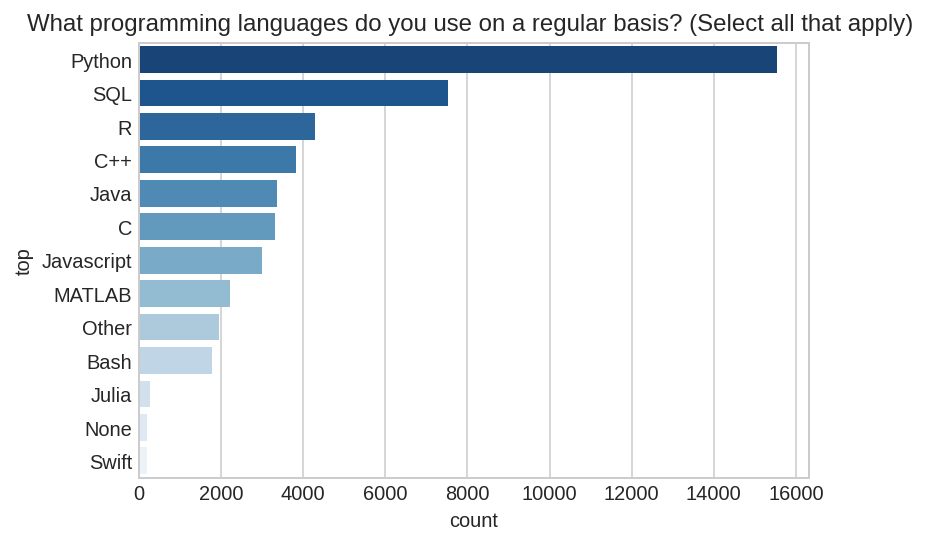

In [100]:
sns.barplot(data=answer_Q7_count, y=answer_Q7_count.index, x="count", palette="Blues_r").set_title(q7_title)

define get_question_title function

In [ ]:
# multiple choice 에 대해 함수화 해놓기(answer 사용방법)
def get_question_title_by_qno(qno):
  if qno in question.index:
    return question[qno]
  else:
    q_no = anaswer.filter(regex=qno).columns[0]
    q_no = question[q_no].split("-")[0]
    return q_no

In [101]:
# 간소화 버전
def get_question_title_by_qno(qno):
  return question[qno]

In [103]:
# get_question_title_by_qno("Q1") # Q1~Q6 까지느 문제 없음.
get_question_title_by_qno("Q7")

KeyError: ignored

In [104]:
def get_question_title_by_qno(qno):
  try:
    return question[qno]
  except:
    return qno
    
get_question_title_by_qno("Q7")

'Q7'

In [111]:
# Q7부터의 타이틀을 가져오기 위해 추가

def get_question_title_by_qno(qno):
  if qno in question.index:
    return question[qno]
  else:
    q_no = question.filter(regex=qno)[0]
    return q_no

get_question_title_by_qno("Q7")

'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'

In [114]:
# 선택항목 제외하고 가져오기 "-"로 나누기

# (question) 사용방법)
def get_question_title_by_qno(qno):
  if qno in question.index:
    return question[qno]
  else:
    q_no = question.filter(regex=qno)[0].split("-")[0]
    return q_no

get_question_title_by_qno("Q7")

'What programming languages do you use on a regular basis? (Select all that apply) '

define get_multiple_choice_answer function

In [115]:
# qno에 따라서 multiple choice answer에 대한 빈도수 가져오기 함수
def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  answer_count = answer_desc.loc[["top","count"]].T.set_index("top")
  answer_count = answer_count.sort_values("count", ascending=False)
  return answer_count


In [117]:
def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  return df_answer

get_multiple_choice_answer_by_qno("Q7")

Q7_Part_1 Q7_Part_2 Q7_Part_3  ... Q7_Part_11 Q7_Part_12 Q7_OTHER
1        Python         R       SQL  ...     MATLAB        NaN    Other
2        Python         R       SQL  ...        NaN        NaN      NaN
3           NaN       NaN       NaN  ...        NaN        NaN      NaN
4        Python       NaN       SQL  ...        NaN        NaN      NaN
5        Python       NaN       NaN  ...        NaN        NaN      NaN
...         ...       ...       ...  ...        ...        ...      ...
20032       NaN       NaN       NaN  ...        NaN        NaN      NaN
20033    Python       NaN       NaN  ...        NaN        NaN      NaN
20034    Python       NaN       NaN  ...        NaN        NaN      NaN
20035    Python       NaN       SQL  ...        NaN        NaN      NaN
20036    Python       NaN       NaN  ...        NaN        NaN      NaN

[20036 rows x 13 columns]

In [120]:
def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  return answer_desc

get_multiple_choice_answer_by_qno("Q7")

Q7_Part_1 Q7_Part_2 Q7_Part_3  ... Q7_Part_11 Q7_Part_12 Q7_OTHER
count      15530      4277      7535  ...       2217        206     1945
unique         1         1         1  ...          1          1        1
top       Python         R       SQL  ...     MATLAB       None    Other
freq       15530      4277      7535  ...       2217        206     1945

[4 rows x 13 columns]

In [122]:
def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  return answer_desc.loc[["top", "count"]]

get_multiple_choice_answer_by_qno("Q7")

Q7_Part_1 Q7_Part_2 Q7_Part_3  ... Q7_Part_11 Q7_Part_12 Q7_OTHER
top      Python         R       SQL  ...     MATLAB       None    Other
count     15530      4277      7535  ...       2217        206     1945

[2 rows x 13 columns]

In [123]:
def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  return answer_desc.loc[["top", "count"]].T # 행열 바꾸기
# top이 인덱스로 있어야 시각화를 할 때 유용하다.
get_multiple_choice_answer_by_qno("Q7")

top  count
Q7_Part_1       Python  15530
Q7_Part_2            R   4277
Q7_Part_3          SQL   7535
Q7_Part_4            C   3315
Q7_Part_5          C++   3827
Q7_Part_6         Java   3367
Q7_Part_7   Javascript   2995
Q7_Part_8        Julia    262
Q7_Part_9        Swift    198
Q7_Part_10        Bash   1776
Q7_Part_11      MATLAB   2217
Q7_Part_12        None    206
Q7_OTHER         Other   1945

In [124]:
def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  return answer_desc.loc[["top", "count"]].T.set_index("top")

get_multiple_choice_answer_by_qno("Q7")

count
top              
Python      15530
R            4277
SQL          7535
C            3315
C++          3827
Java         3367
Javascript   2995
Julia         262
Swift         198
Bash         1776
MATLAB       2217
None          206
Other        1945

In [127]:
def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  answer_count = answer_desc.loc[["top", "count"]].T.set_index("top")
  answer_count = answer_count.sort_values(by="count", ascending=False)
  return answer_count

get_multiple_choice_answer_by_qno("Q7")
get_multiple_choice_answer_by_qno("Q8")
get_multiple_choice_answer_by_qno("Q9")

count
top                                                 
Jupyter (JupyterLab, Jupyter Notebooks, etc)   11211
Visual Studio Code (VSCode)                     5873
 PyCharm                                        5099
 RStudio                                        3826
  Spyder                                        3290
  Notepad++                                     3132
  Sublime Text                                  2452
Visual Studio                                   2445
 MATLAB                                         1604
  Vim / Emacs                                   1502
Other                                           1162
None                                             386

define show_multiple_choice_bar_plot_by_qno function

In [129]:
def show_multiple_choice_bar_plot_by_qno(qno):
  multiple_choice_answer = get_multiple_choice_answer_by_qno(qno)

  plt.figure(figsize=(10,6))
  sns.barplot(data=multiple_choice_answer, y=multiple_choice_answer.index, 
              x="count", palette="Blues_r"
              ).set_title(get_question_title_by_qno(qno))

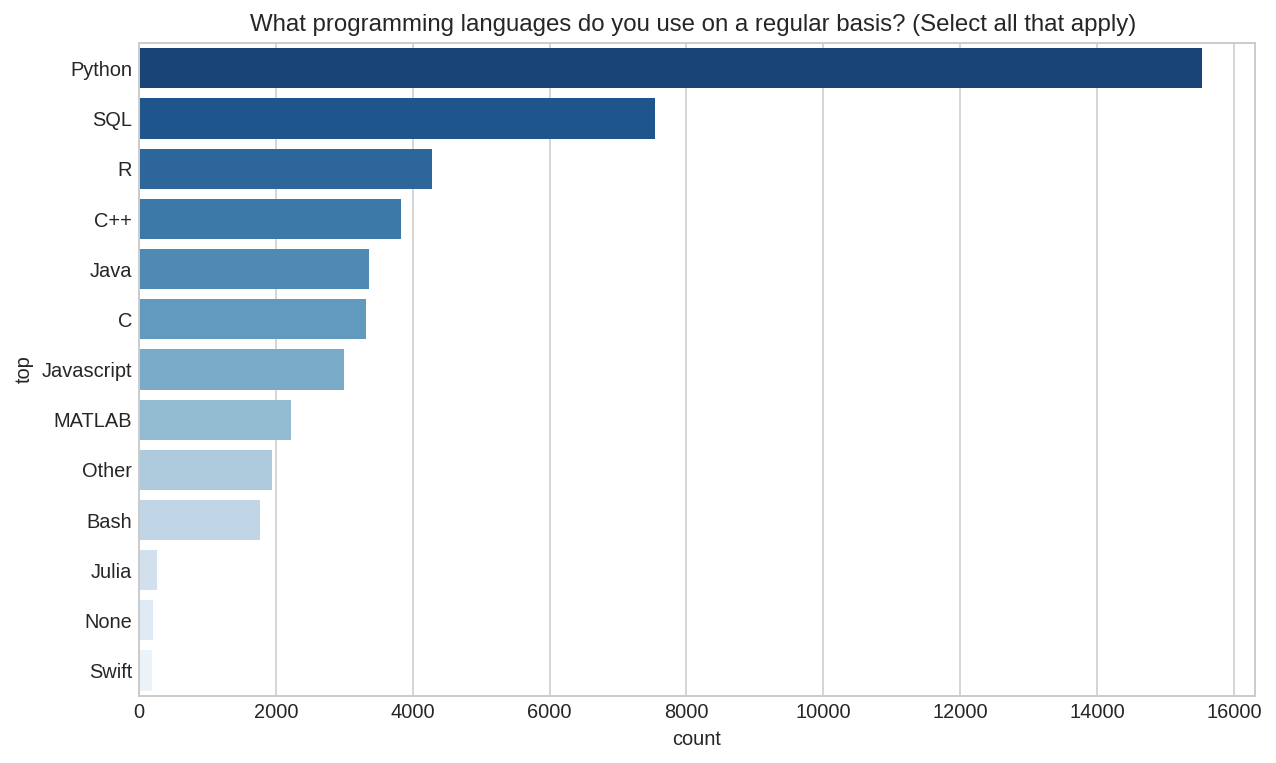

In [130]:
show_multiple_choice_bar_plot_by_qno("Q7")

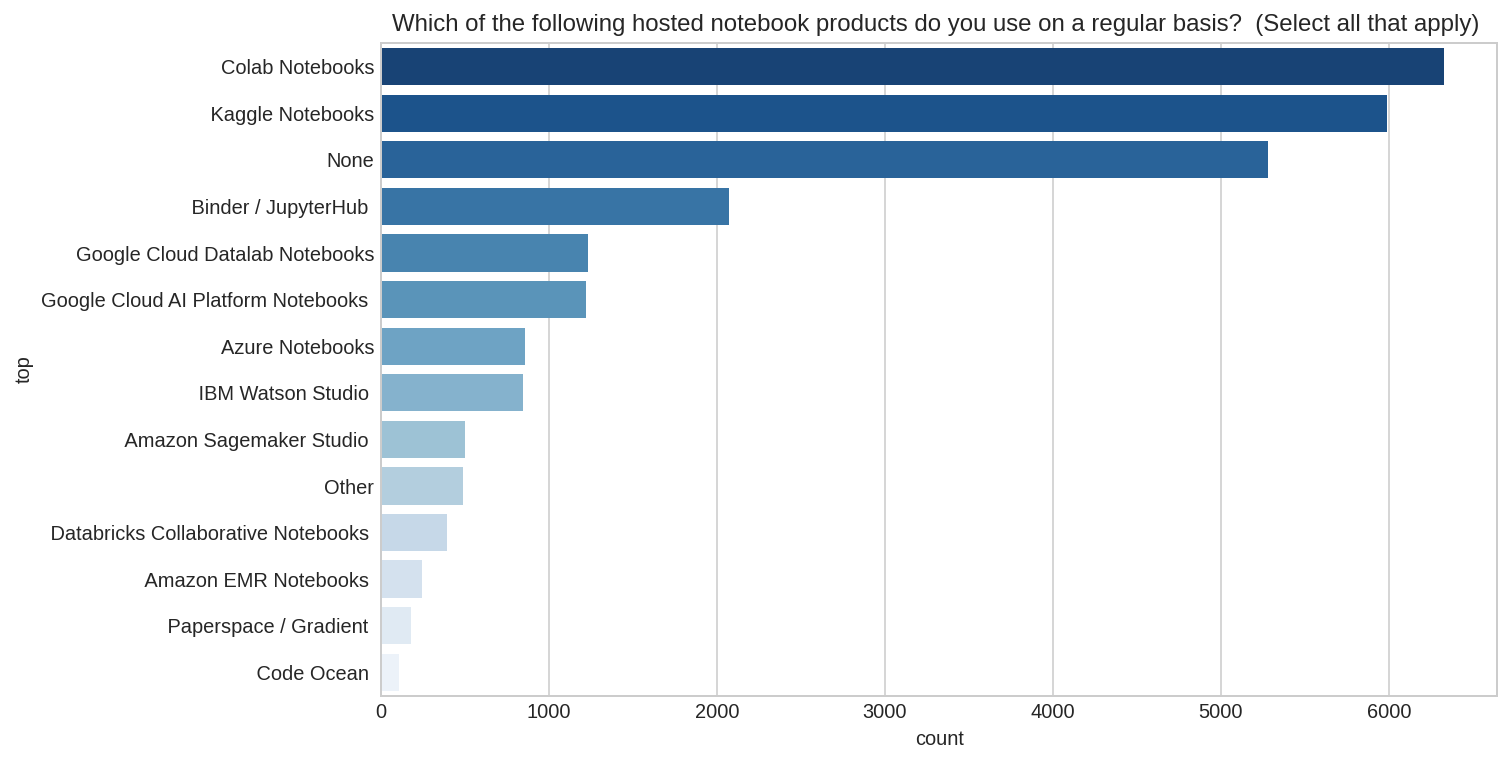

In [133]:
show_multiple_choice_bar_plot_by_qno("Q10")

In [158]:
# single choice 경우
pd.crosstab(answer["Q5"], answer["Q2"])

Q2                          Man  Nonbinary  ...  Prefer to self-describe  Woman
Q5                                          ...                                
Business Analyst            627          3  ...                        1    156
Currently not employed     1235          4  ...                        7    376
DBA/Database Engineer       103          2  ...                        0     16
Data Analyst               1110          1  ...                        5    348
Data Engineer               369          0  ...                        1     60
Data Scientist             2194          8  ...                        8    438
Machine Learning Engineer   928          0  ...                        4    136
Other                      1418          2  ...                        4    292
Product/Project Manager     603          1  ...                        2     78
Research Scientist          899          4  ...                        2    239
Software Engineer          1670          4  ...                        6    260
Statistician                219          1  ...                        0     69
Student                    3843         18  ...                       13   1245

[13 rows x 5 columns]

In [173]:
answer.filter(regex="Q7").describe().loc["top"]
q7_cols = answer.filter(regex="Q7").describe().loc["top"].tolist()
q7_cols

['Python',
 'R',
 'SQL',
 'C',
 'C++',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'None',
 'Other']

In [165]:
# multiple choice 경우

# pd.crosstab(answer["Q7"], answer["Q2"]) # 오류
# answer.filter(regex="Q7|Q2") # Q2로 시작하는 것도 다 가져옴.(Q29 이런거까지)
q2q7 = answer.filter(regex="Q7|^Q2$") # ^:시작, $:끝
q2q7

Q2 Q7_Part_1 Q7_Part_2  ... Q7_Part_11 Q7_Part_12 Q7_OTHER
1        Man    Python         R  ...     MATLAB        NaN    Other
2        Man    Python         R  ...        NaN        NaN      NaN
3        Man       NaN       NaN  ...        NaN        NaN      NaN
4        Man    Python       NaN  ...        NaN        NaN      NaN
5        Man    Python       NaN  ...        NaN        NaN      NaN
...      ...       ...       ...  ...        ...        ...      ...
20032    Man       NaN       NaN  ...        NaN        NaN      NaN
20033  Woman    Python       NaN  ...        NaN        NaN      NaN
20034    Man    Python       NaN  ...        NaN        NaN      NaN
20035    Man    Python       NaN  ...        NaN        NaN      NaN
20036    Man    Python       NaN  ...        NaN        NaN      NaN

[20036 rows x 14 columns]

In [176]:
q2q7_count = q2q7.groupby("Q2").count() # Q2를 기준으로 groupby하고 빈도수 계산
q2q7_count.columns = q7_cols # Q7_Part_1 이런거를 top의 값으로 바꾼 것
q2q7_count

Python     R   SQL     C  ...  Bash  MATLAB  None  Other
Q2                                                 ...                           
Man                       12530  3299  5940  2552  ...  1561    1679   149   1634
Nonbinary                    41    14    20     8  ...    10       7     0      7
Prefer not to say           182    48    97    36  ...    31      28     6     31
Prefer to self-describe      41     8    18    12  ...    10       6     0      7
Woman                      2736   908  1460   707  ...   164     497    51    266

[5 rows x 13 columns]

In [177]:
# 남녀 빈도수만 보려고 하면
q2q7_count.loc[["Man", "Woman"]] # loc: 행 인덱스

Python     R   SQL     C   C++  ...  Swift  Bash  MATLAB  None  Other
Q2                                     ...                                  
Man     12530  3299  5940  2552  3063  ...    171  1561    1679   149   1634
Woman    2736   908  1460   707   698  ...     20   164     497    51    266

[2 rows x 13 columns]

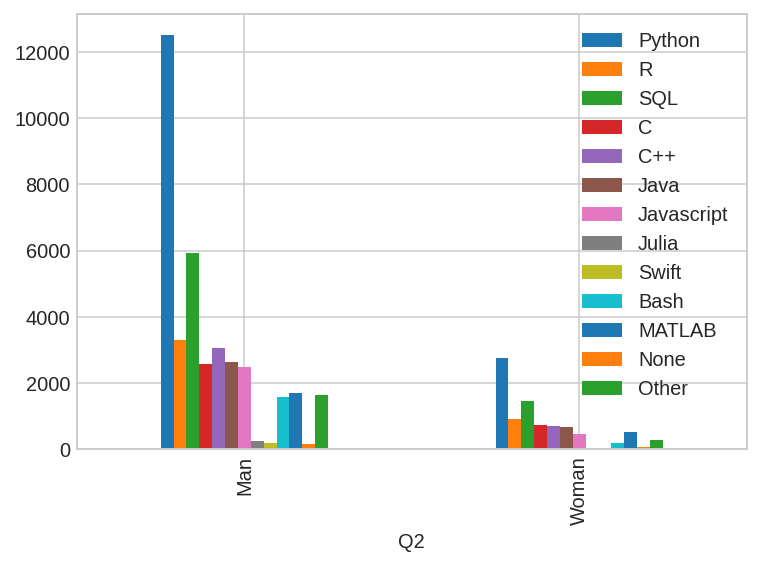

In [178]:
q2q7_count.loc[["Man", "Woman"]].plot.bar()

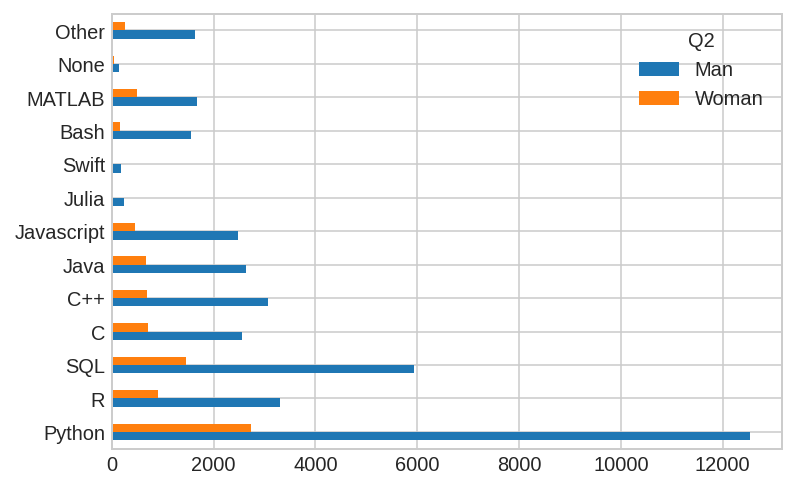

In [180]:
# 언어를 x축에 두고 싶을 때
q2q7_count.loc[["Man", "Woman"]].T.plot.barh()

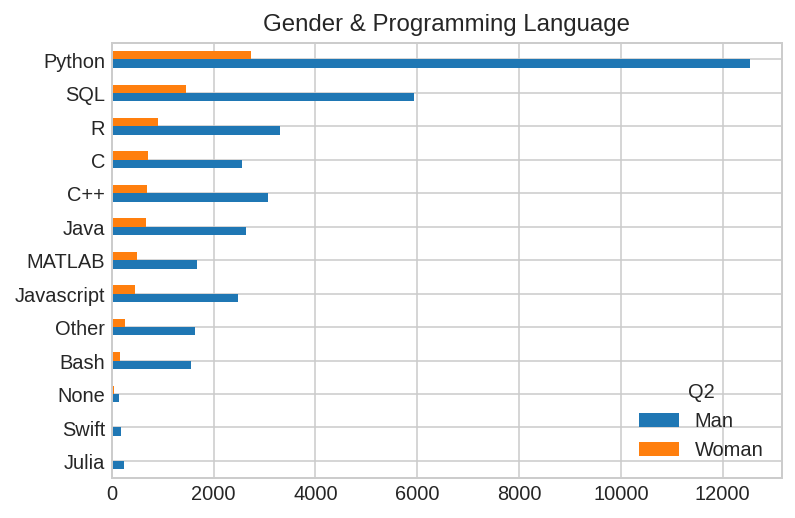

In [182]:
# 빈도수 높은 순서대로
q2q7_count.loc[["Man", "Woman"]].T.sort_values("Woman").plot.barh(title="Gender & Programming Language")

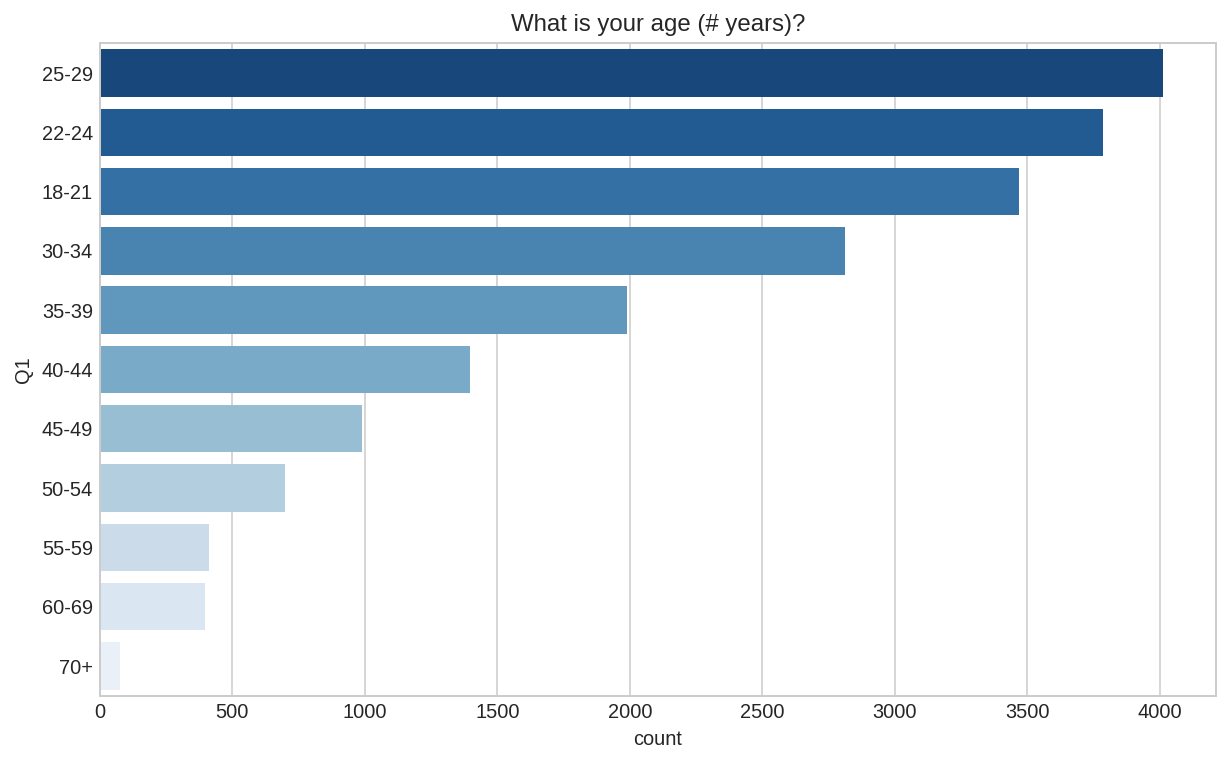

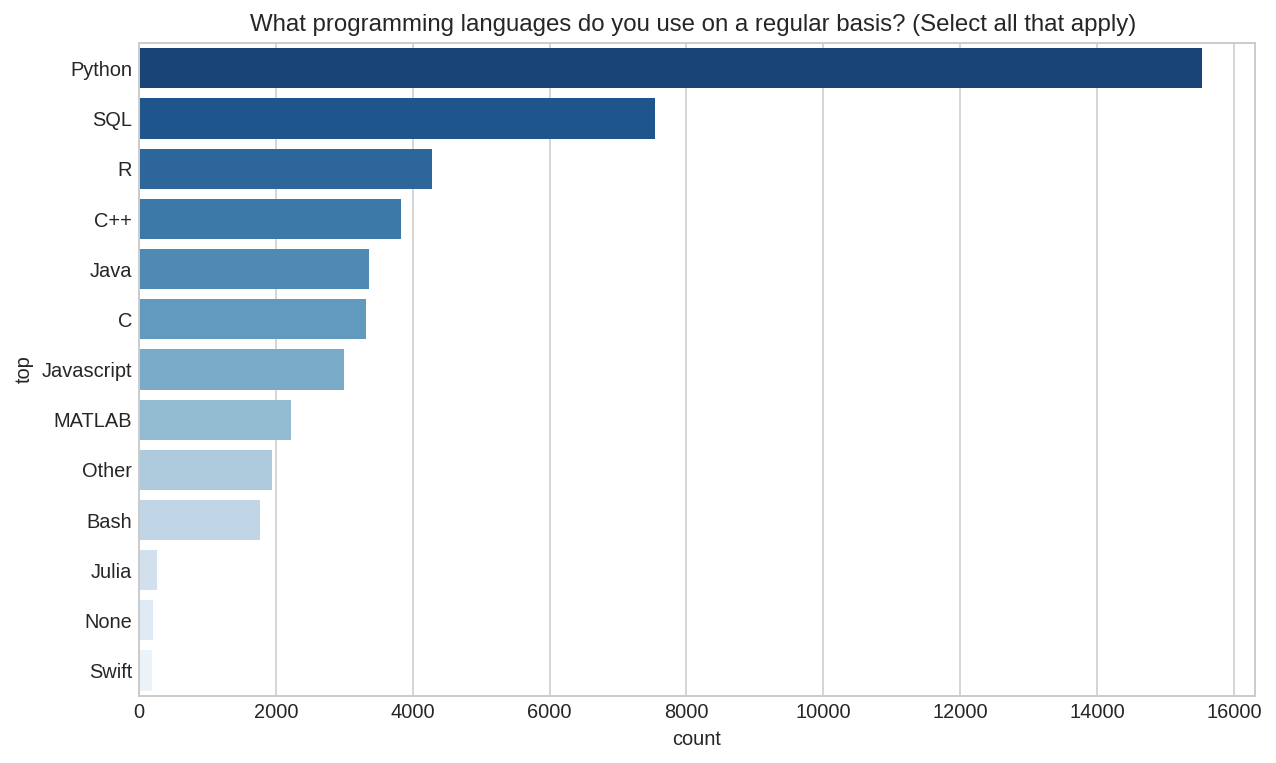

In [184]:
# single choice든 multiple choice든 한번에 시각화하는 함수화하기
show_countplot_by_qno("Q1")
show_multiple_choice_bar_plot_by_qno("Q7")
# -> 지금은 따로따로지만, qno만 넘겨주면 알아서 signle인지 multiple인지 판단하고 시각화하는 함수 만들기

In [185]:
question.index # 컬럼명들

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [186]:
def show_plot_by_qno(qno):
  if qno in question.index: # 컬럼명에 확실히 qno가 있느냐
    show_countplot_by_qno(qno)
  else:
    show_multiple_choice_bar_plot_by_qno(qno)

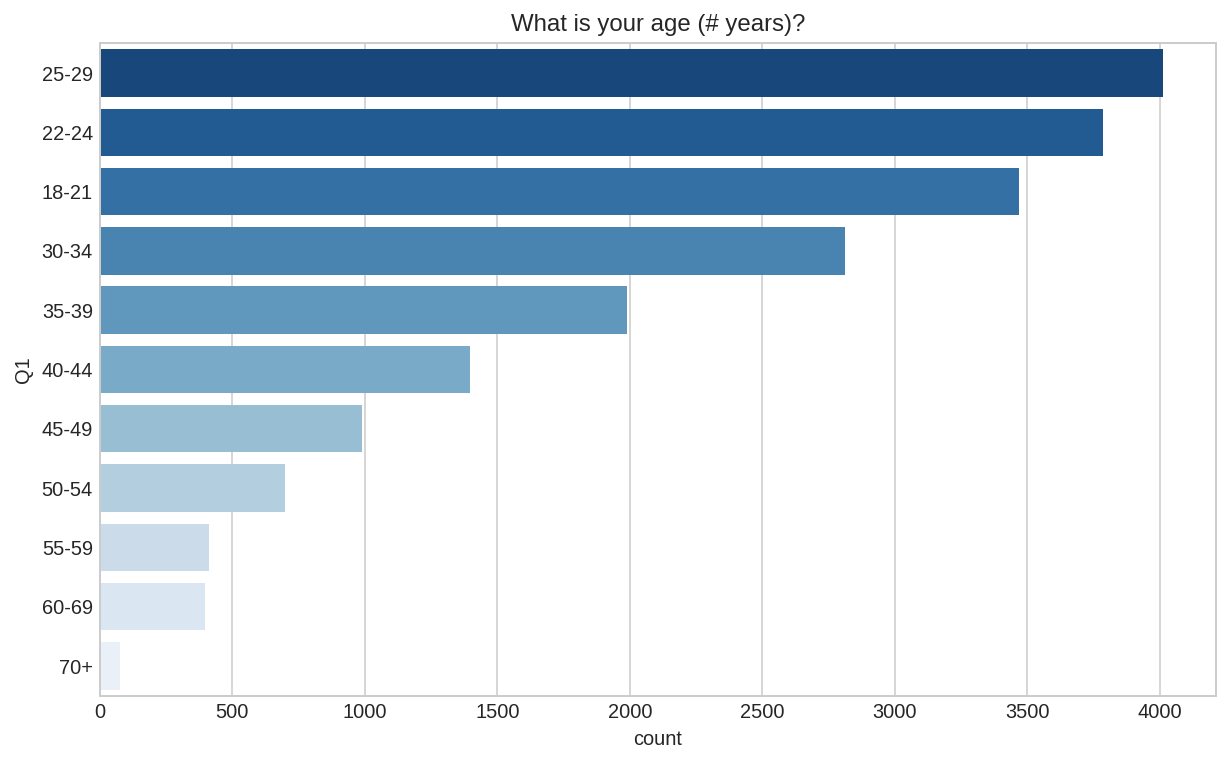

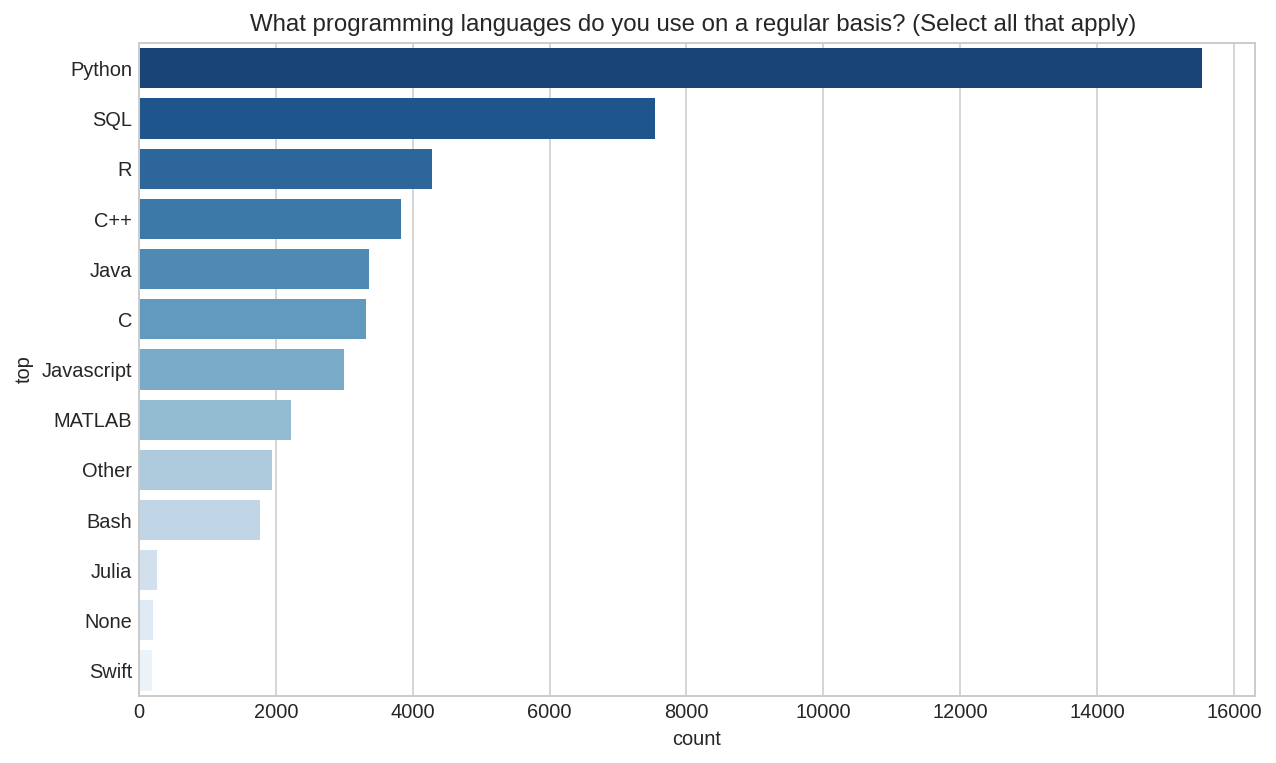

In [188]:
show_plot_by_qno("Q1")
show_plot_by_qno("Q7")

Q8 What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice

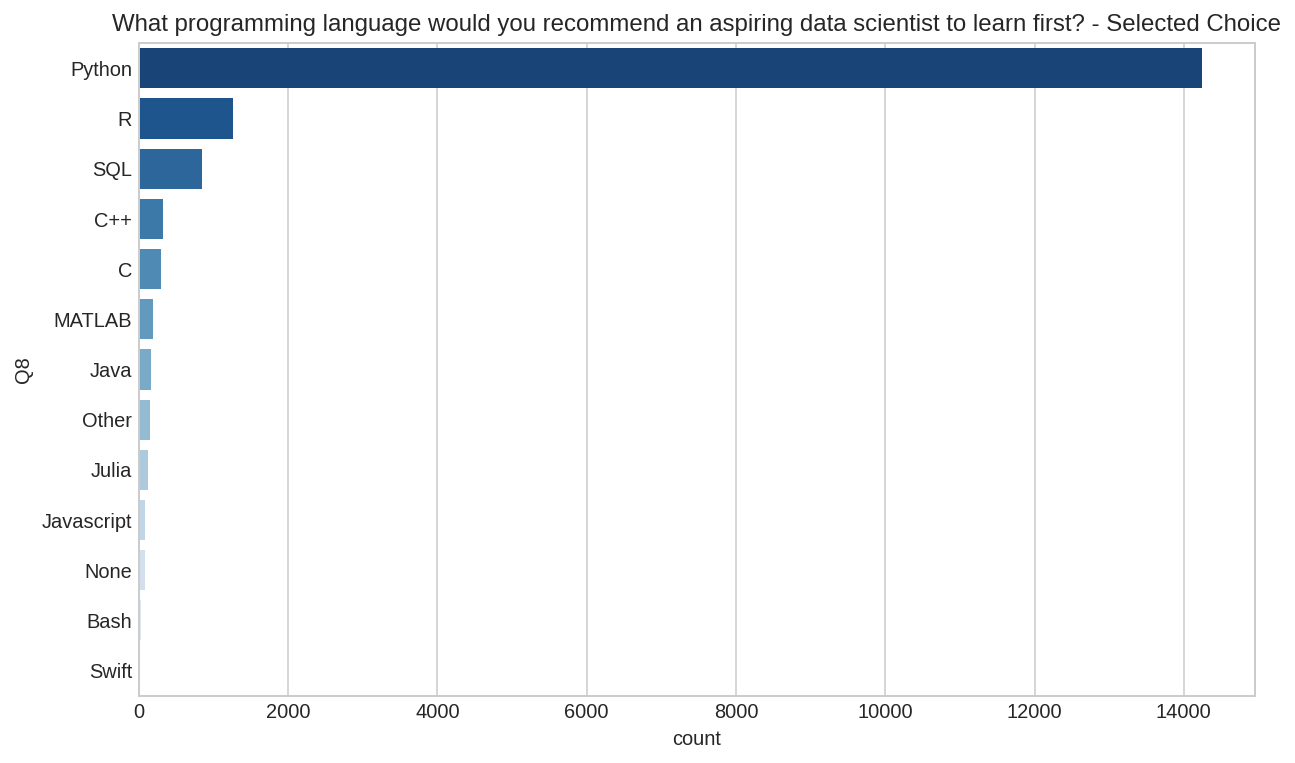

In [191]:
# 처음으로 배우는 프로그래밍 언어로 어떤 것을 추천하겠느냐?
show_plot_by_qno("Q8")

Q9 Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply)

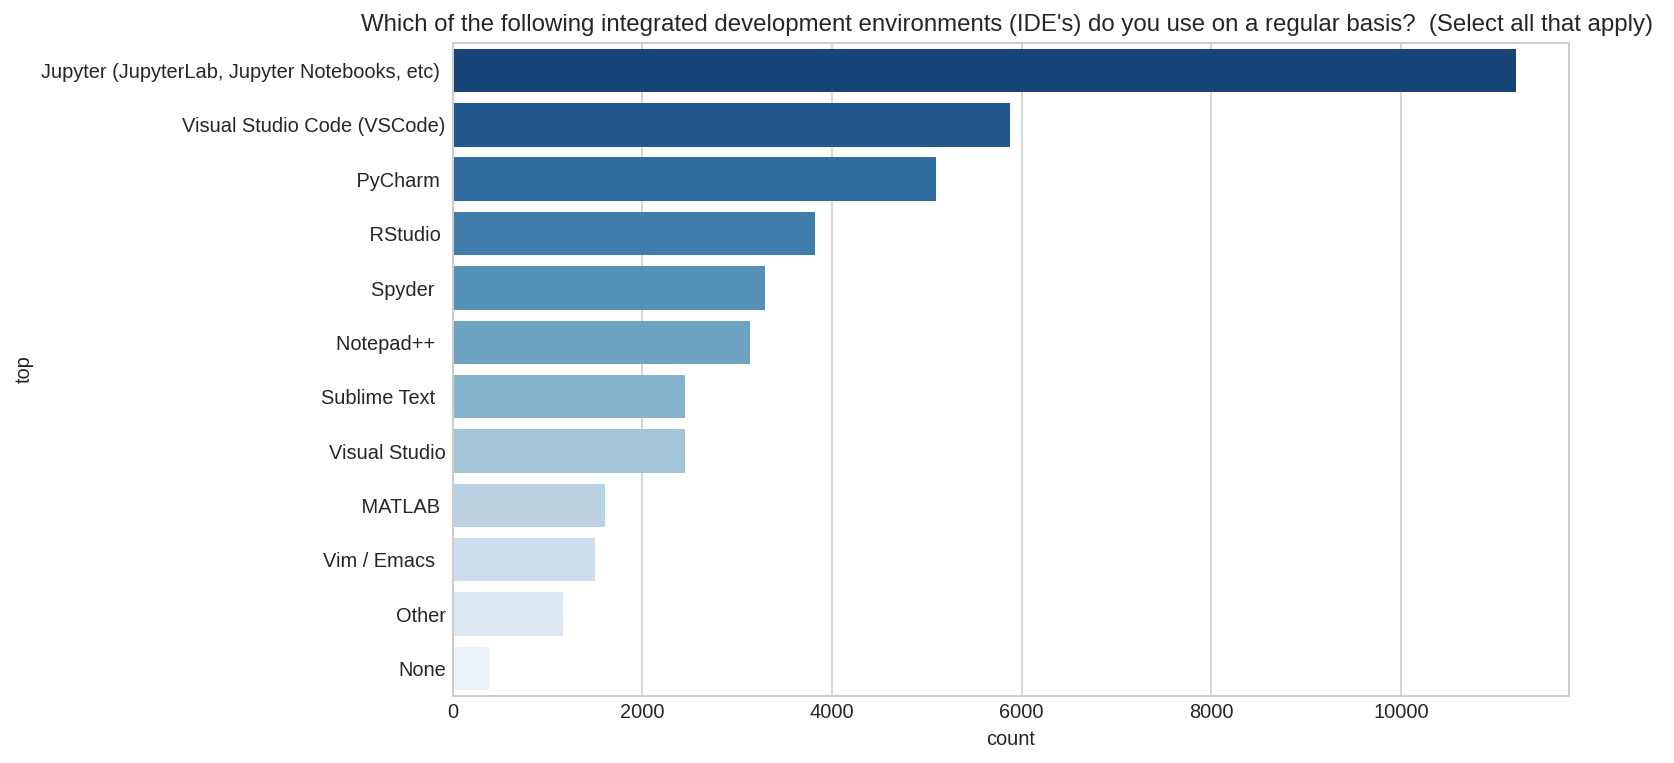

In [192]:
# 어떤 IDE 통합개발환경을 사용하느냐?
show_plot_by_qno("Q9")

Q10 Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply)

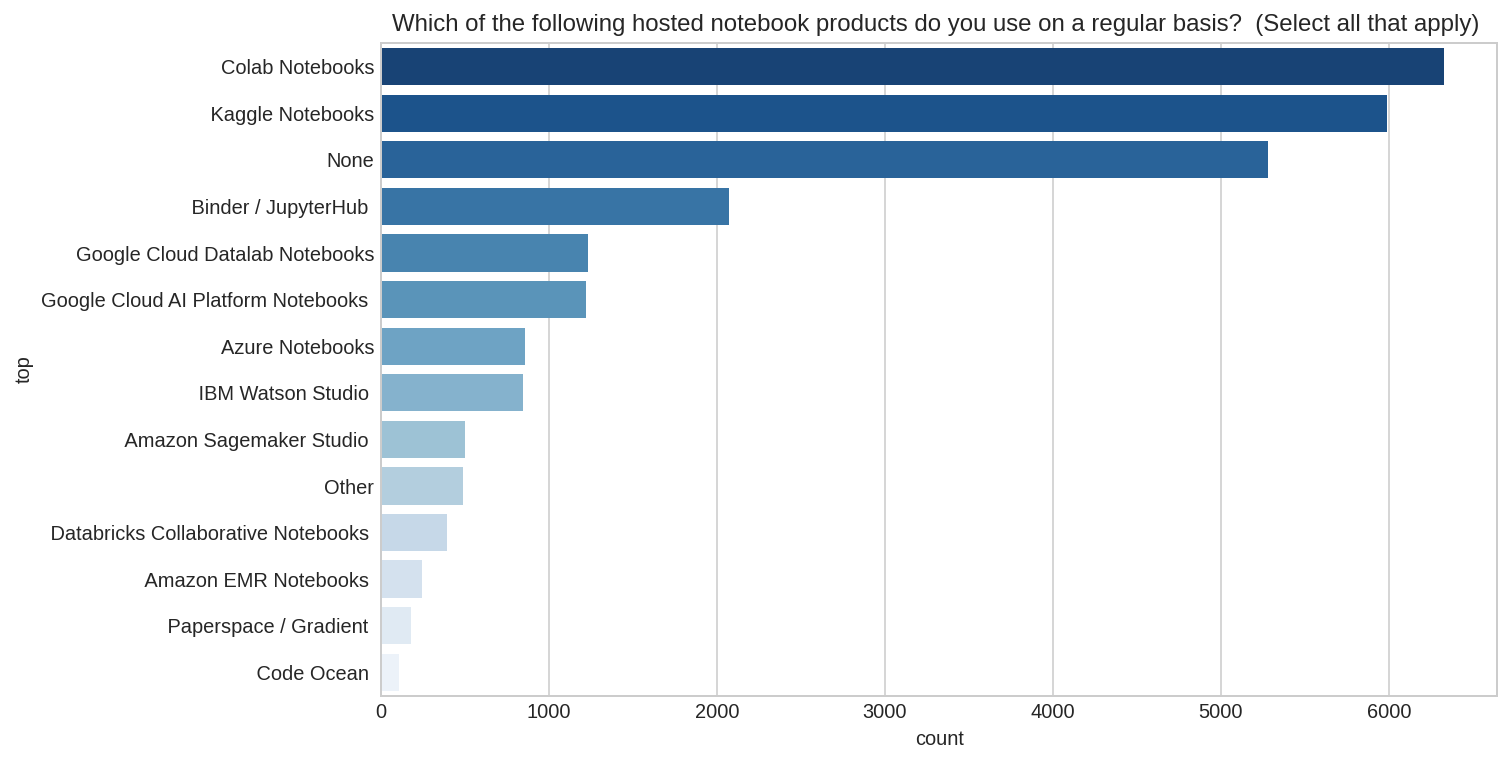

In [194]:
# 호스팅된 노트북 어떤 것을 사용하느냐?
show_plot_by_qno("Q10")

Q11 What type of computing platform do you use most often for your data science projects?

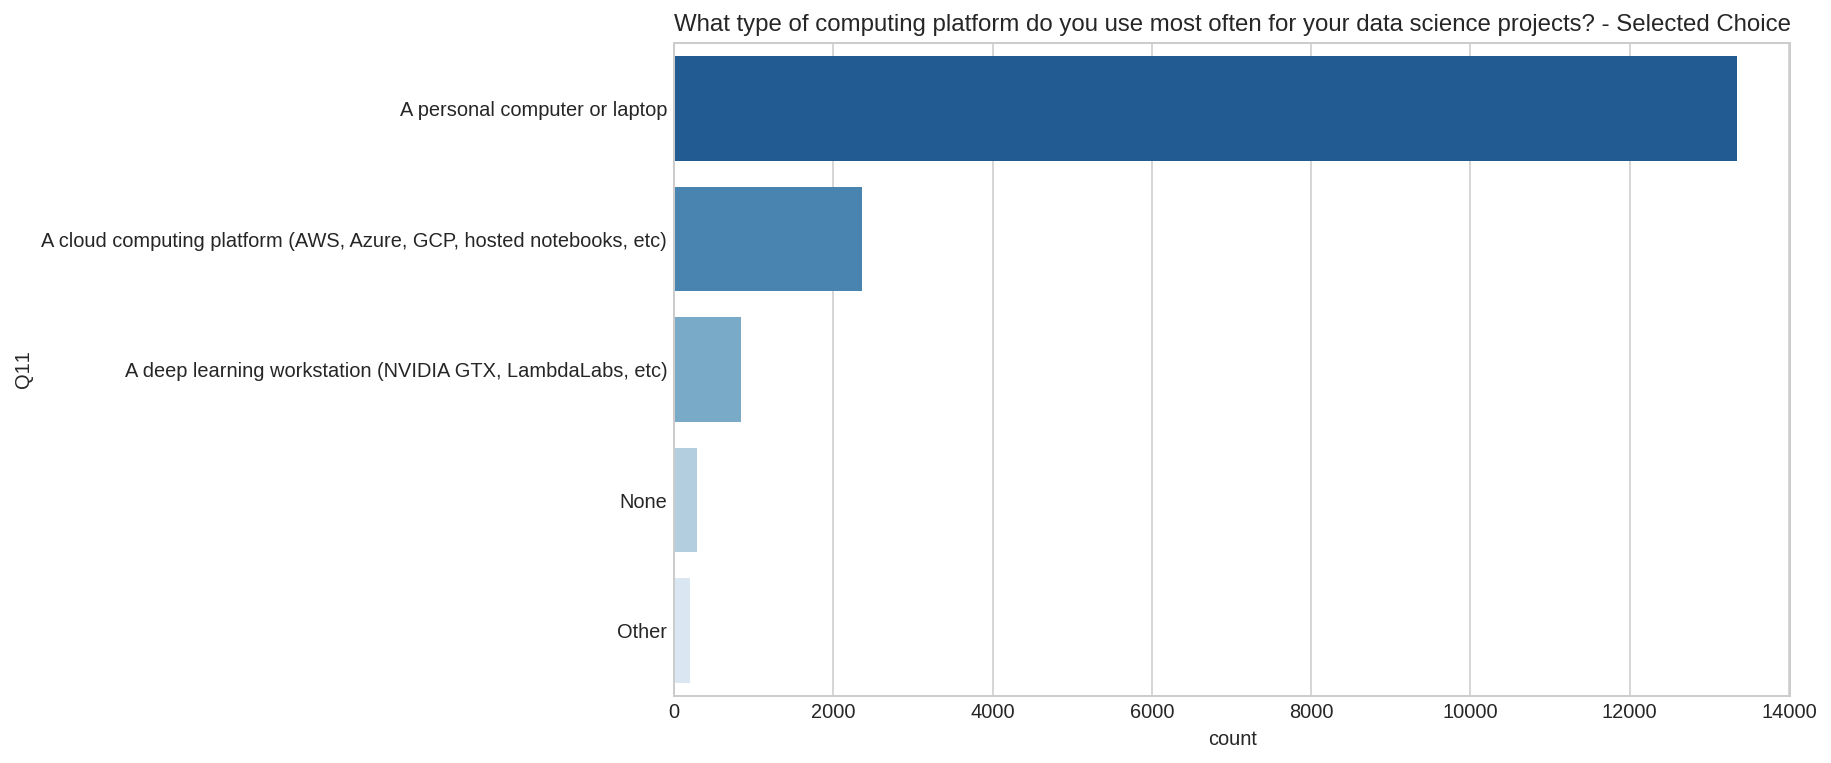

In [196]:
# 프로젝트에 주로 사용하는 플랫폼이 어떤 거냐?
show_plot_by_qno("Q11")

Q12 Which types of specialized hardware do you use on a regular basis?  (Select all that apply)

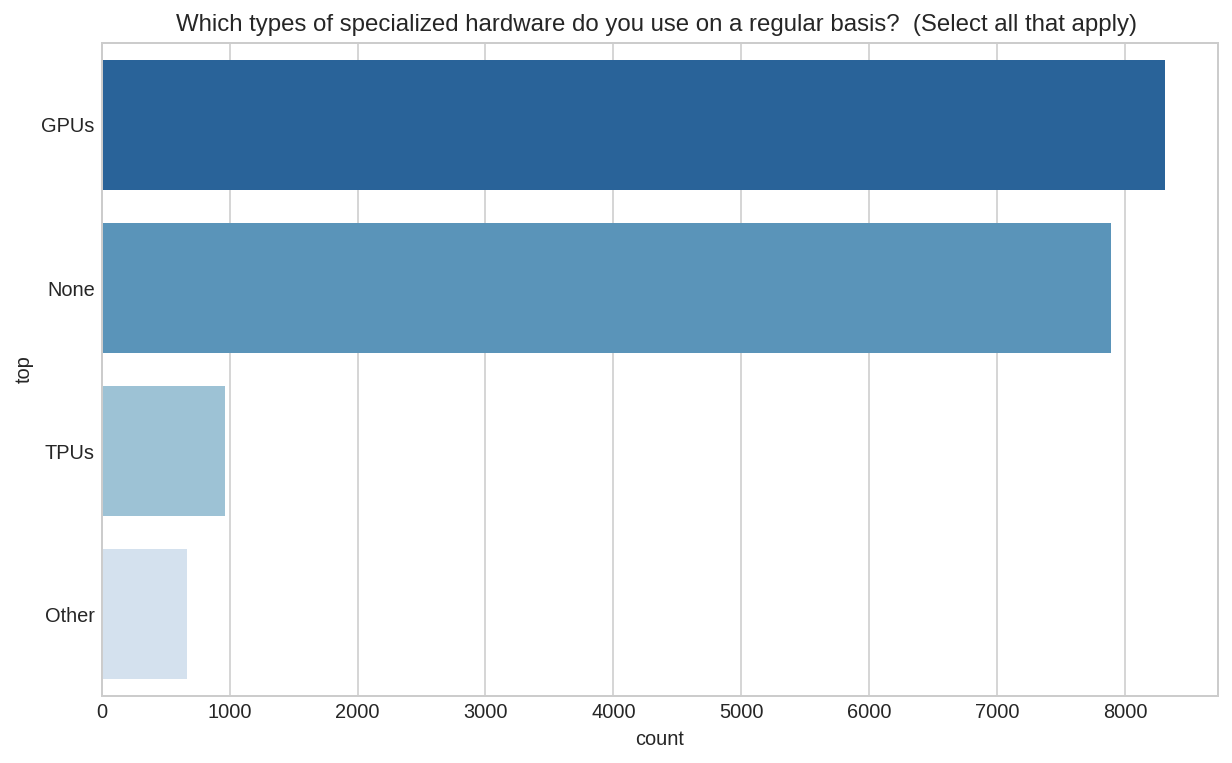

In [198]:
# 특별히 사용하는 하드웨어가 있냐?
show_plot_by_qno("Q12")

Q13 Approximately how many times have you used a TPU (tensor processing unit)?

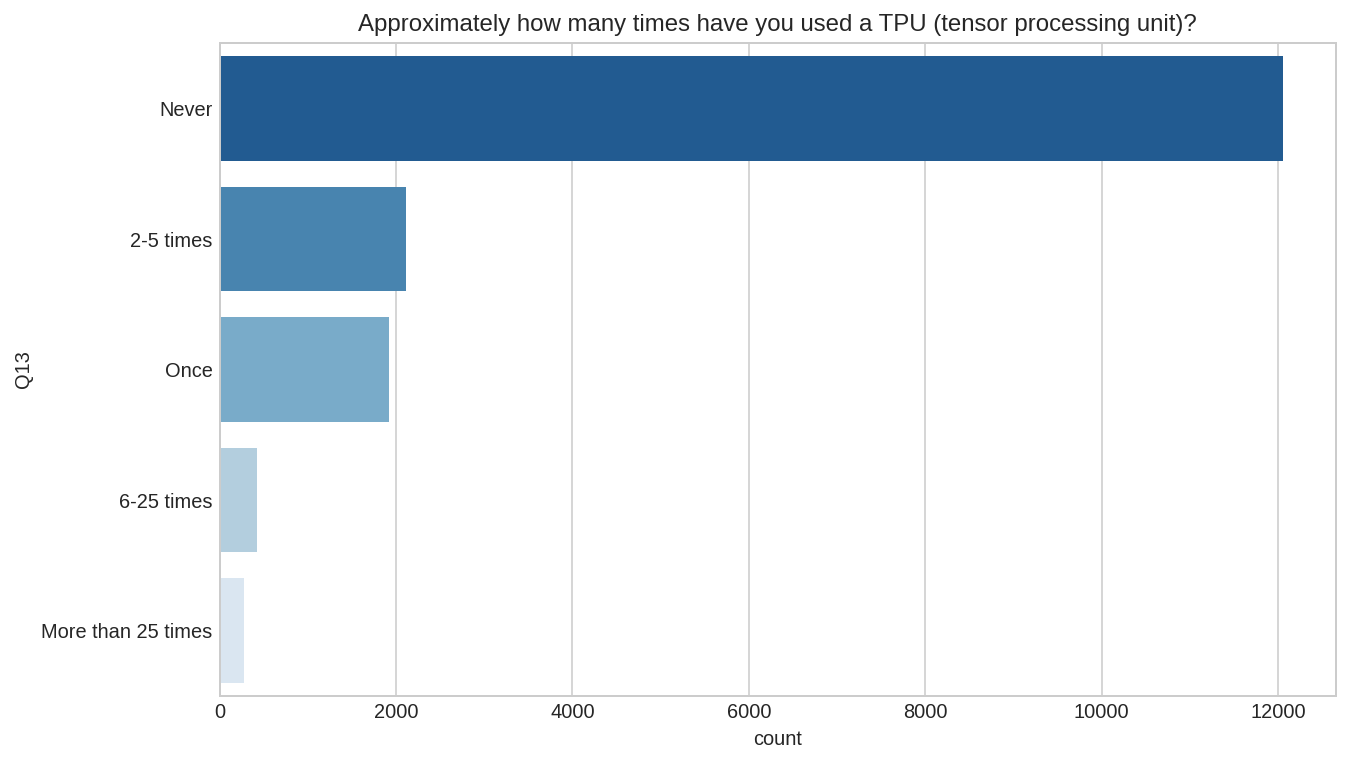

In [200]:
# TPU를 어느정도 사용하는지
show_plot_by_qno("Q13")

Q14 What data visualization libraries or tools do you use on a regular basis?  (Select all that apply)

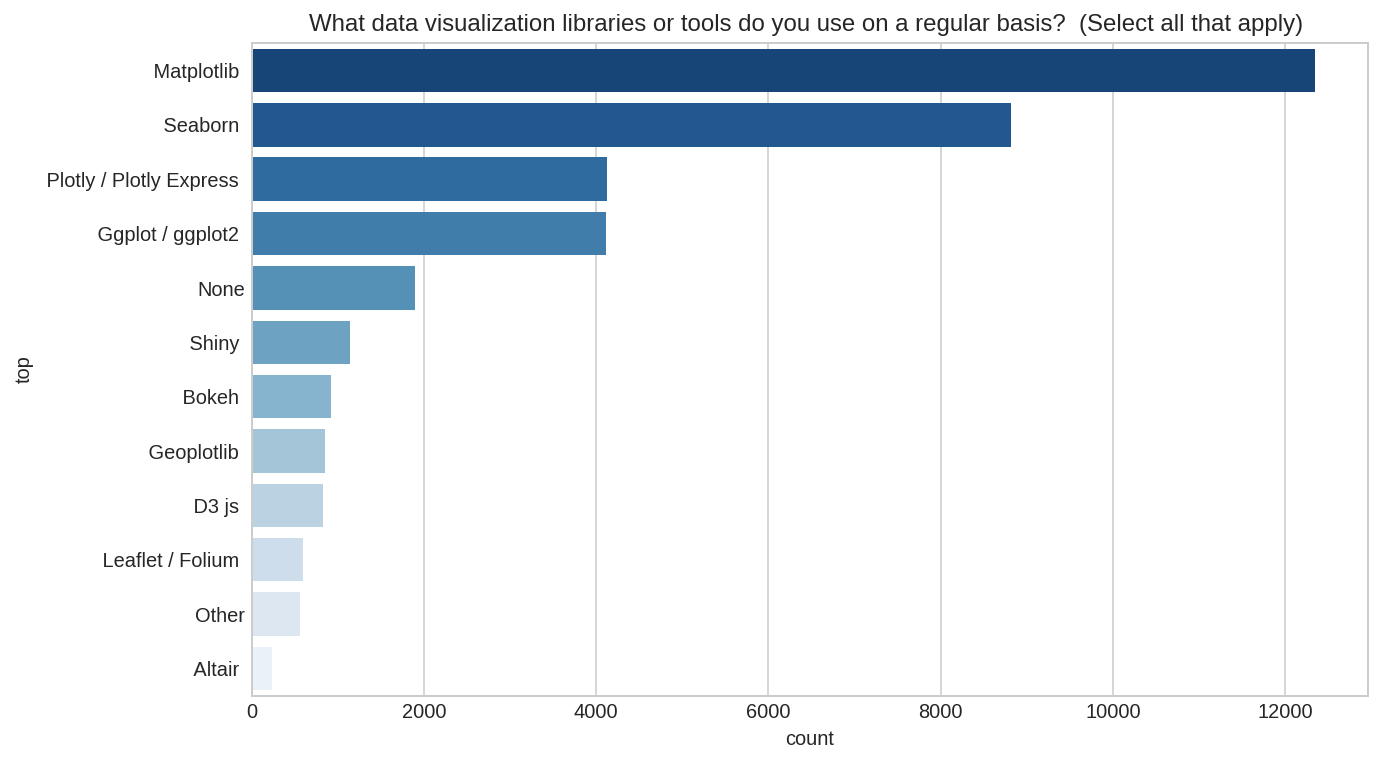

In [202]:
# 시각화도구 어떤 것을 사용하는지 시각화도구 어떤 것을 사용하는지
show_plot_by_qno("Q14")
show_plot_by_qno("Q14")

Q15 For how many years have you used machine learning methods?

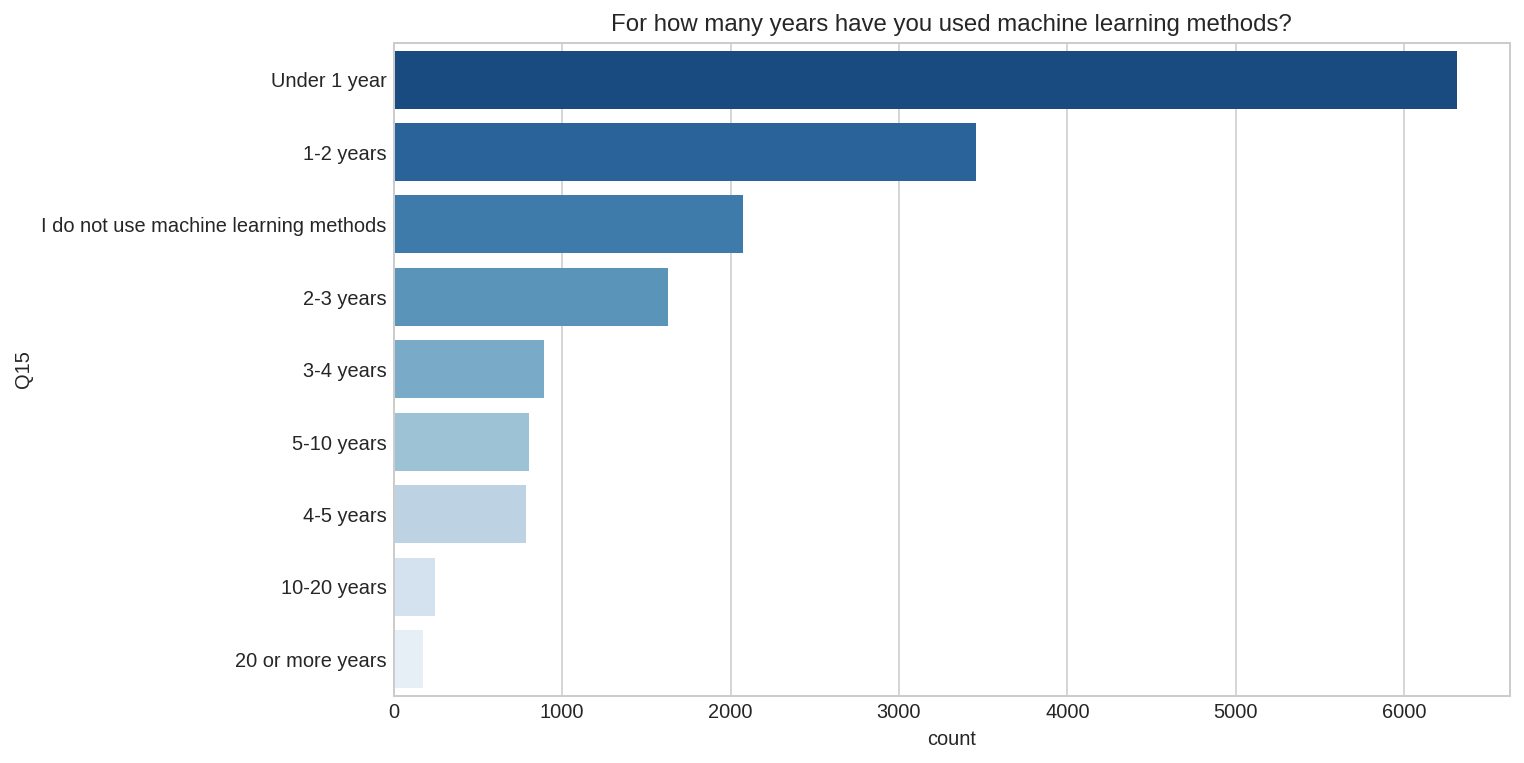

In [204]:
# 머신러닝 얼마나 사용했냐
show_plot_by_qno("Q15")

Q16 Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)

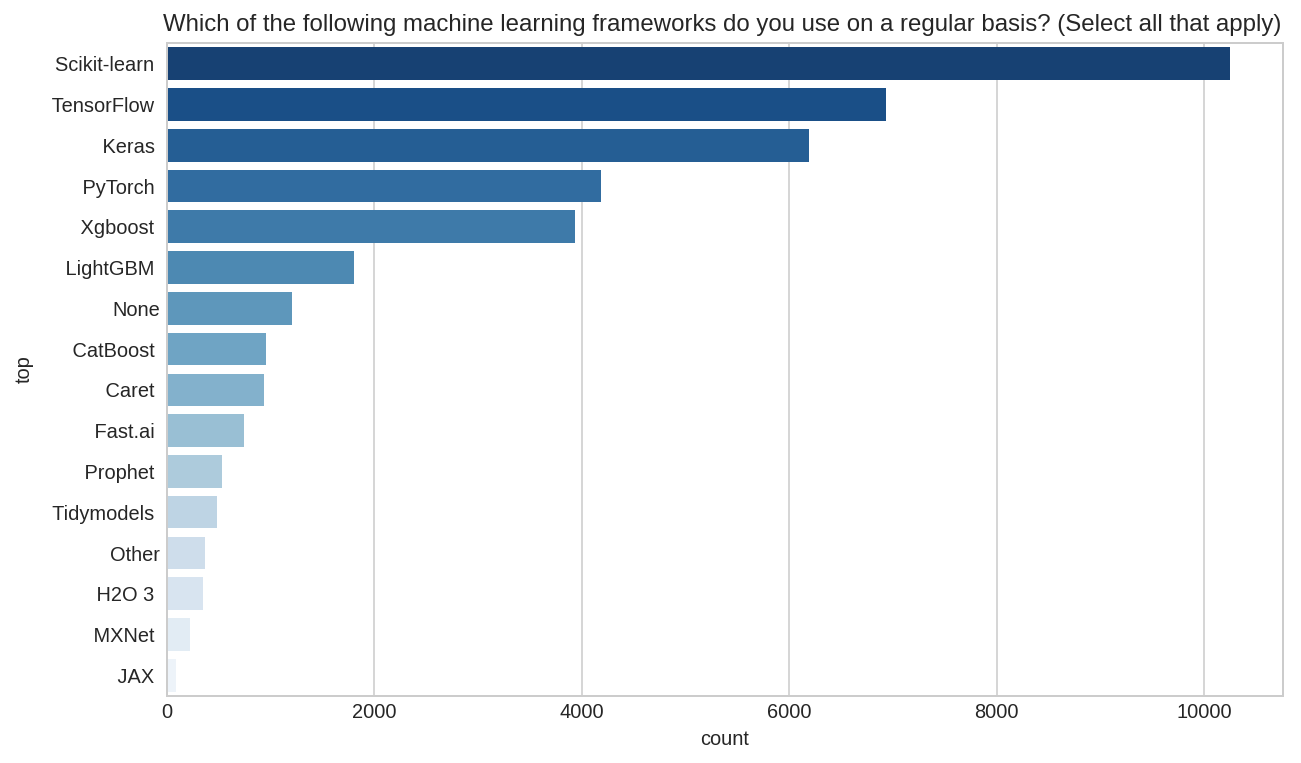

In [206]:
# 머신러닝 프레임워크로 보통 어느것을 사용하는지# 머신러닝 프레임워크로 보통 어느것을 사용하는지
show_plot_by_qno("Q16")
show_plot_by_qno("Q16")

Q17 Which of the following ML algorithms do you use on a regular basis? (Select all that apply)

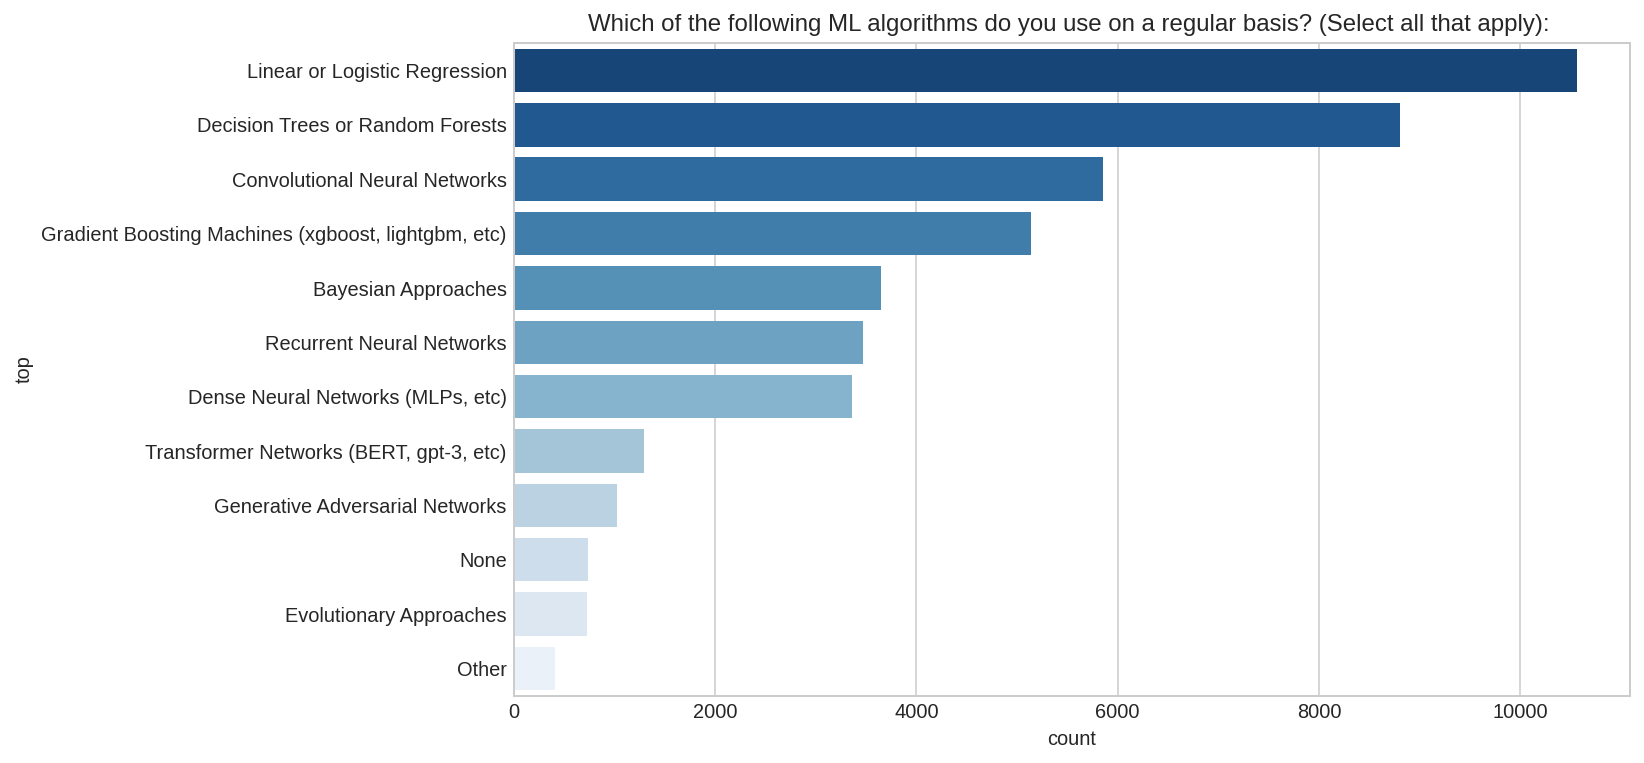

In [208]:
# 머신러닝 알고리즘으로 어떤 것을 사용하는지
show_plot_by_qno("Q17")

Q18 Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) 

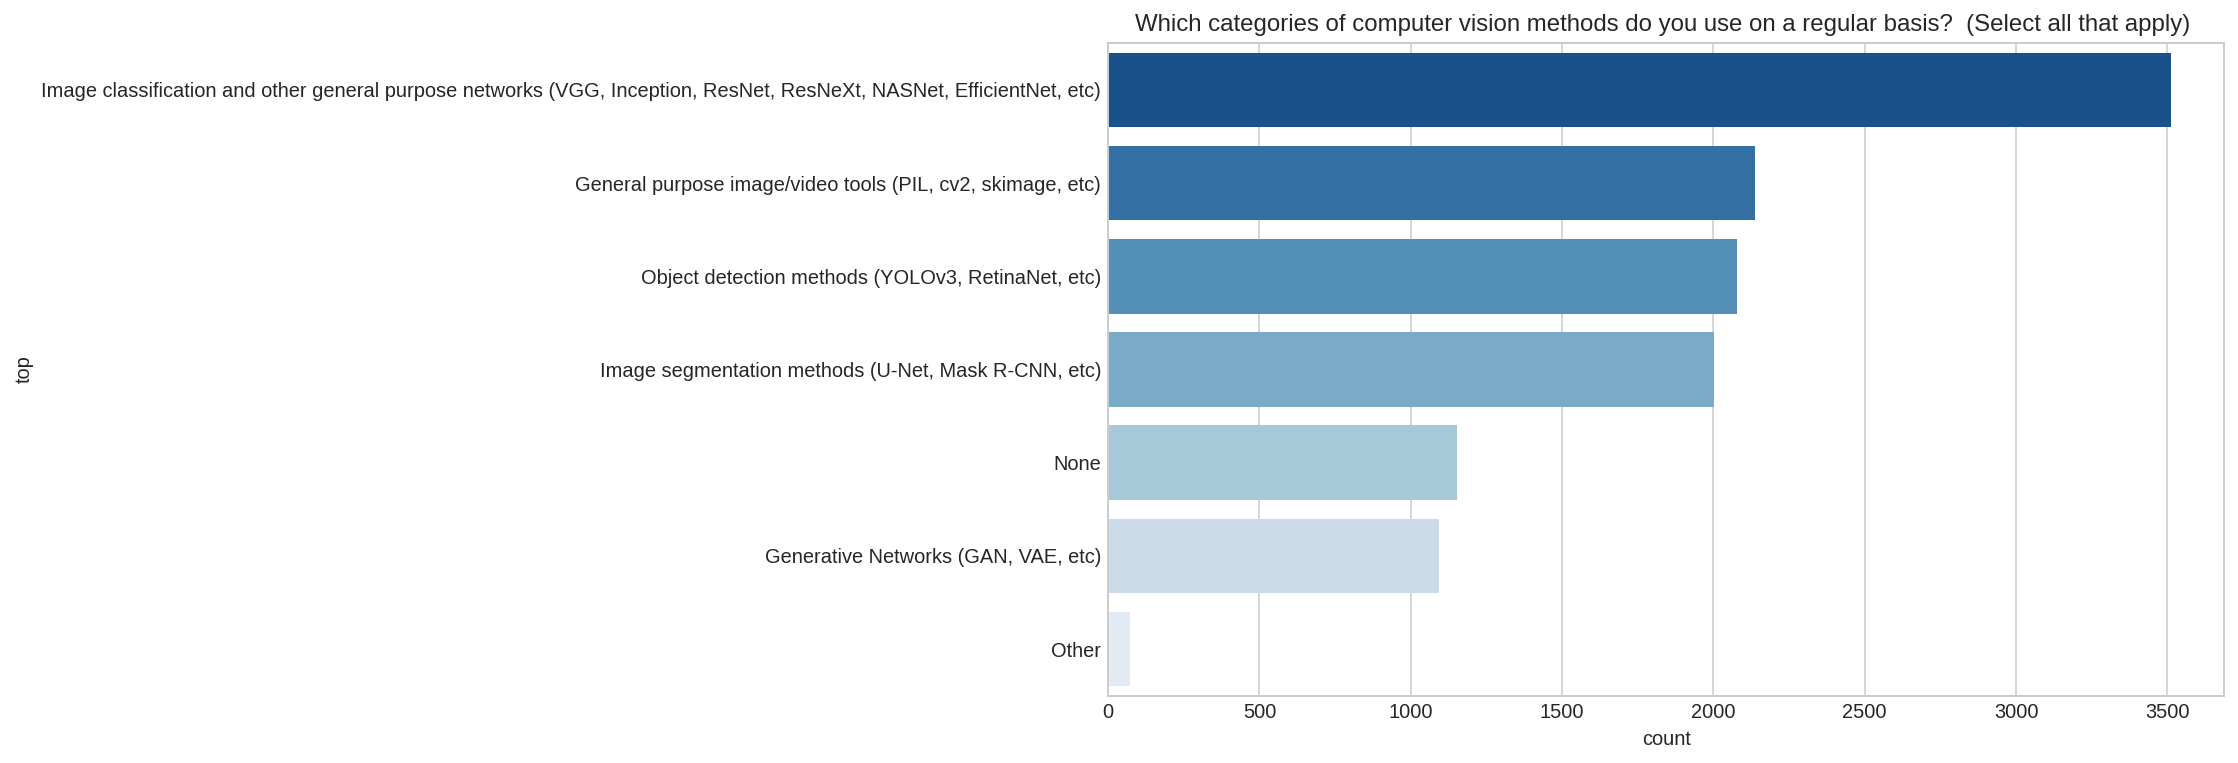

In [210]:
# 컴퓨터 비전 어떤 걸 가장 많이 사용하고 있는지
show_plot_by_qno("Q18")

Q19 Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply)

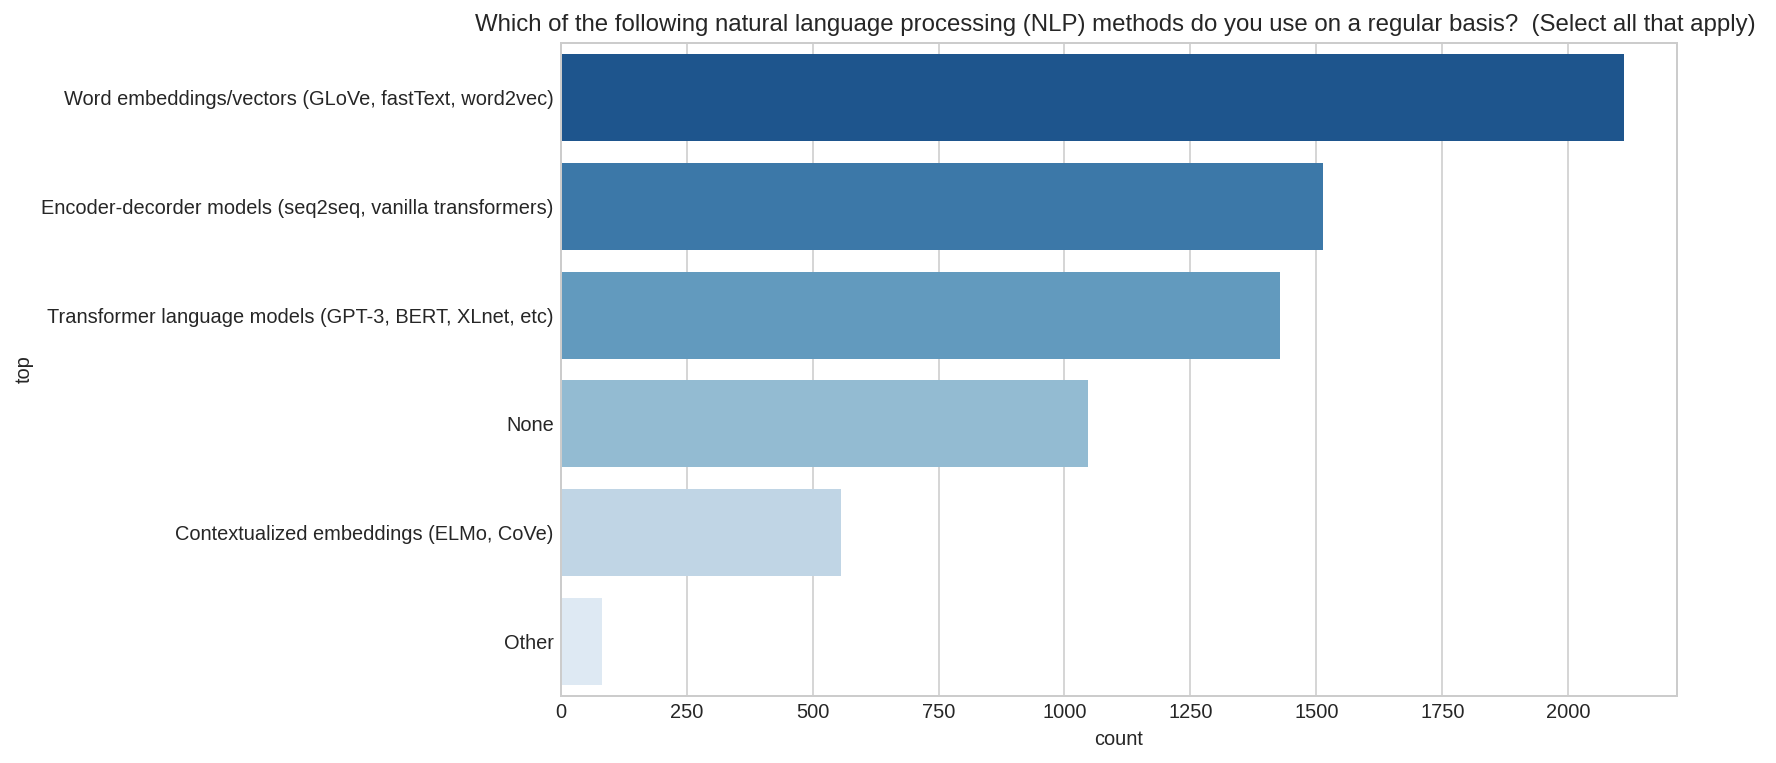

In [215]:
# 자연어처리 NLP 어떤걸 많이 사용하고 있는지
show_plot_by_qno("Q19")

Q20 What is the size of the company where you are employed?

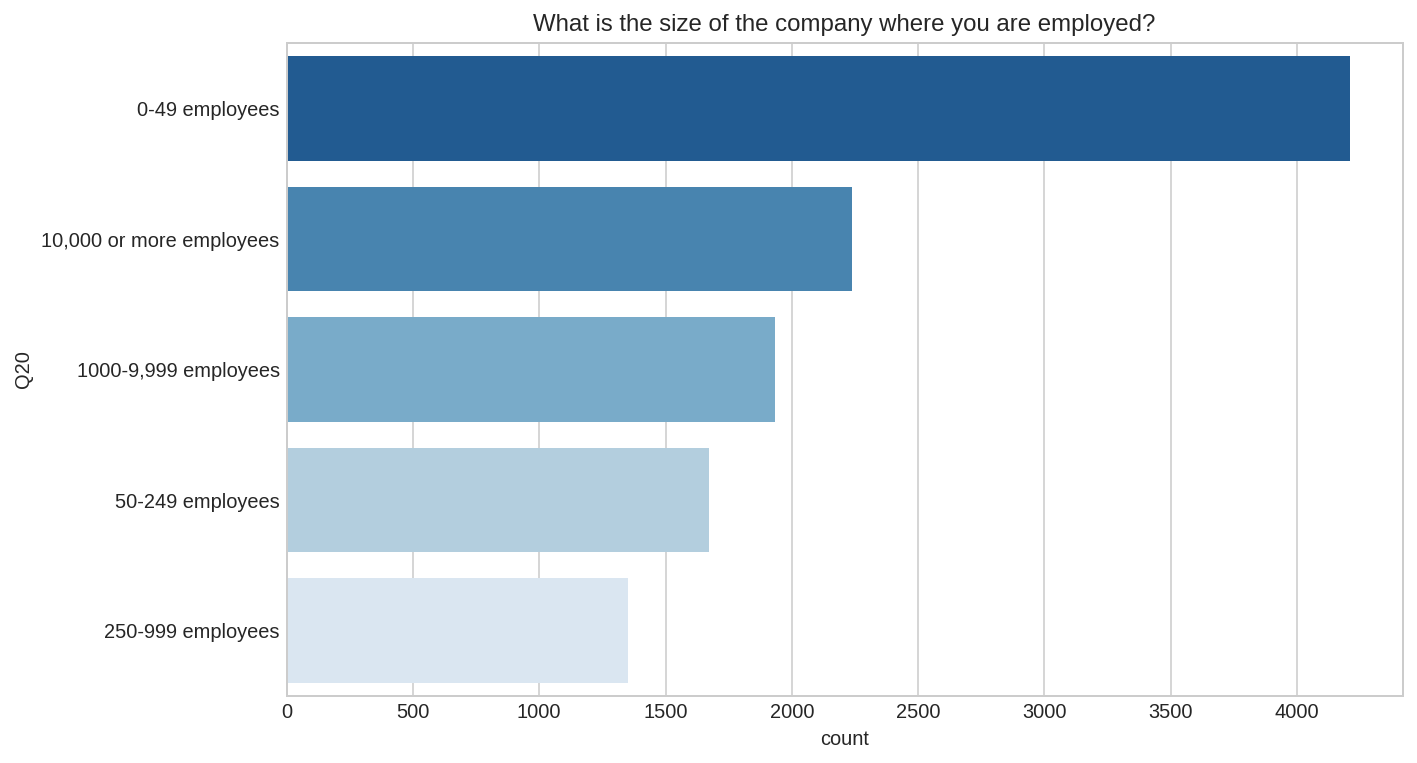

In [217]:
# 어느정도 규모의 회사에서 일을 하고 있는지
show_plot_by_qno("Q20")

Q21 Approximately how many individuals are responsible for data science workloads at your place of business?

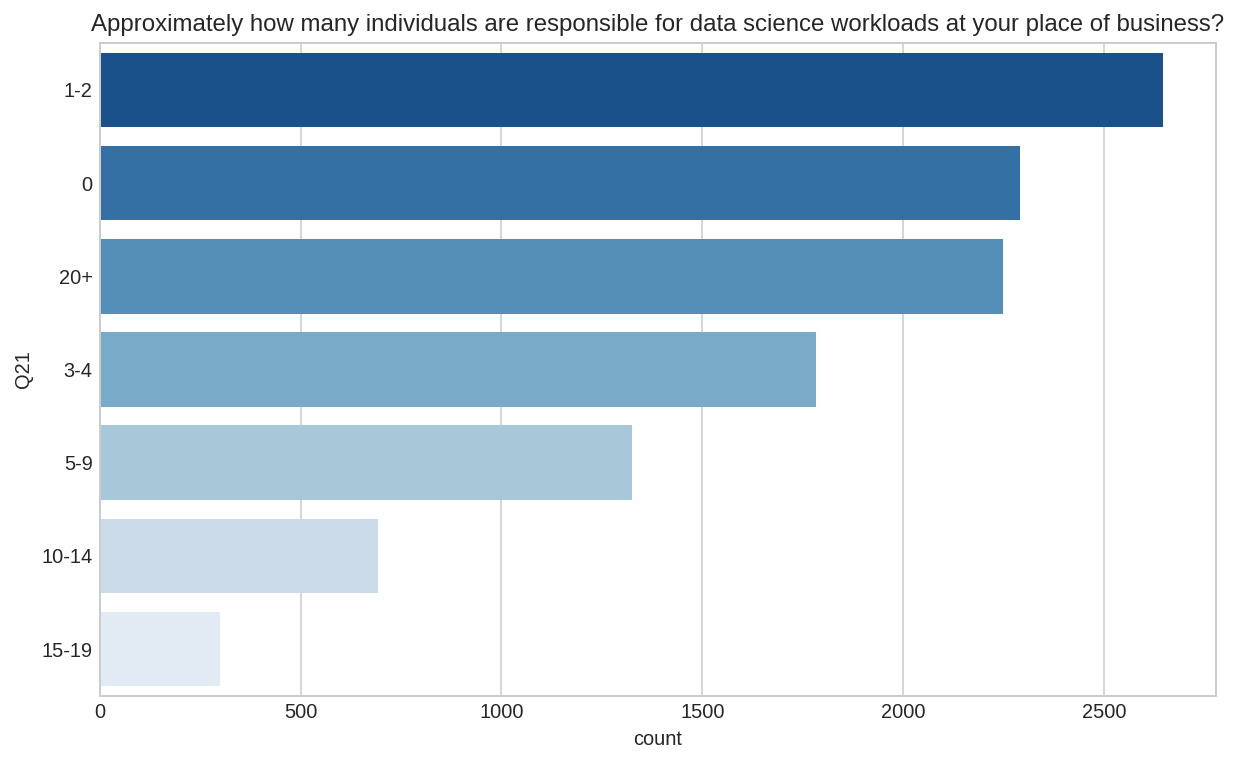

In [218]:
# 기업에서 몇명이 주로 데이터 사이언스 업무를 담당하고 있는지
show_plot_by_qno("Q21")

Q22 Does your current employer incorporate machine learning methods into their business?

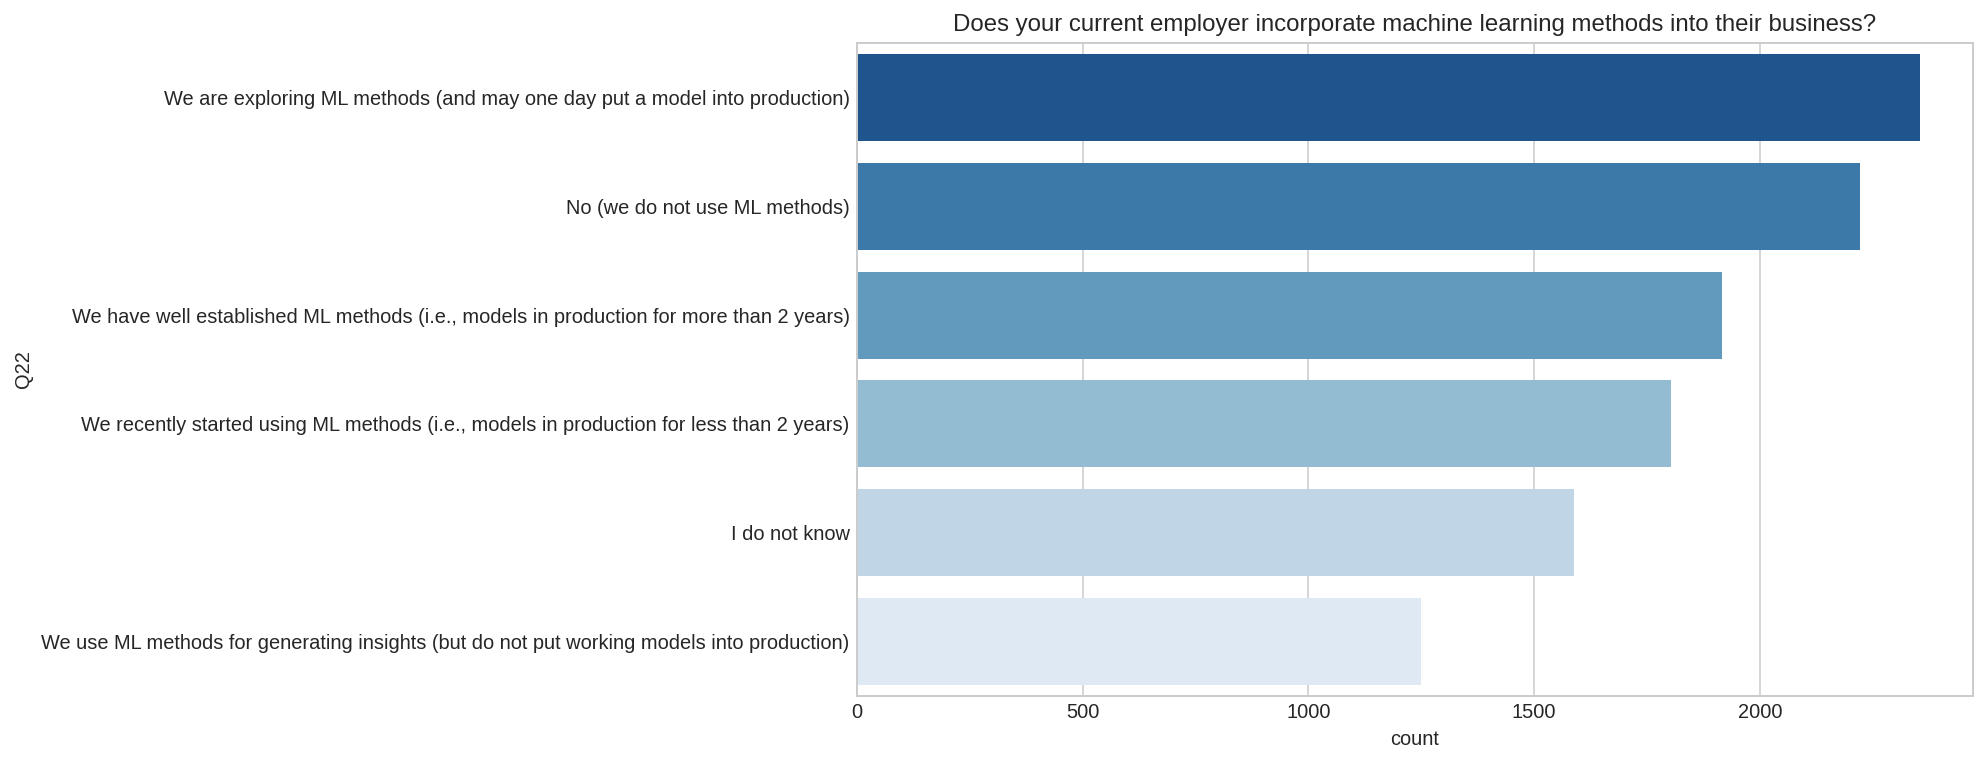

In [219]:
# 실제로 비지니스에서 머신러닝 메소드를 어느정도 사용하고 있는지
show_plot_by_qno("Q22")

 Q23 Select any activities that make up an important part of your role at work: (Select all that apply)

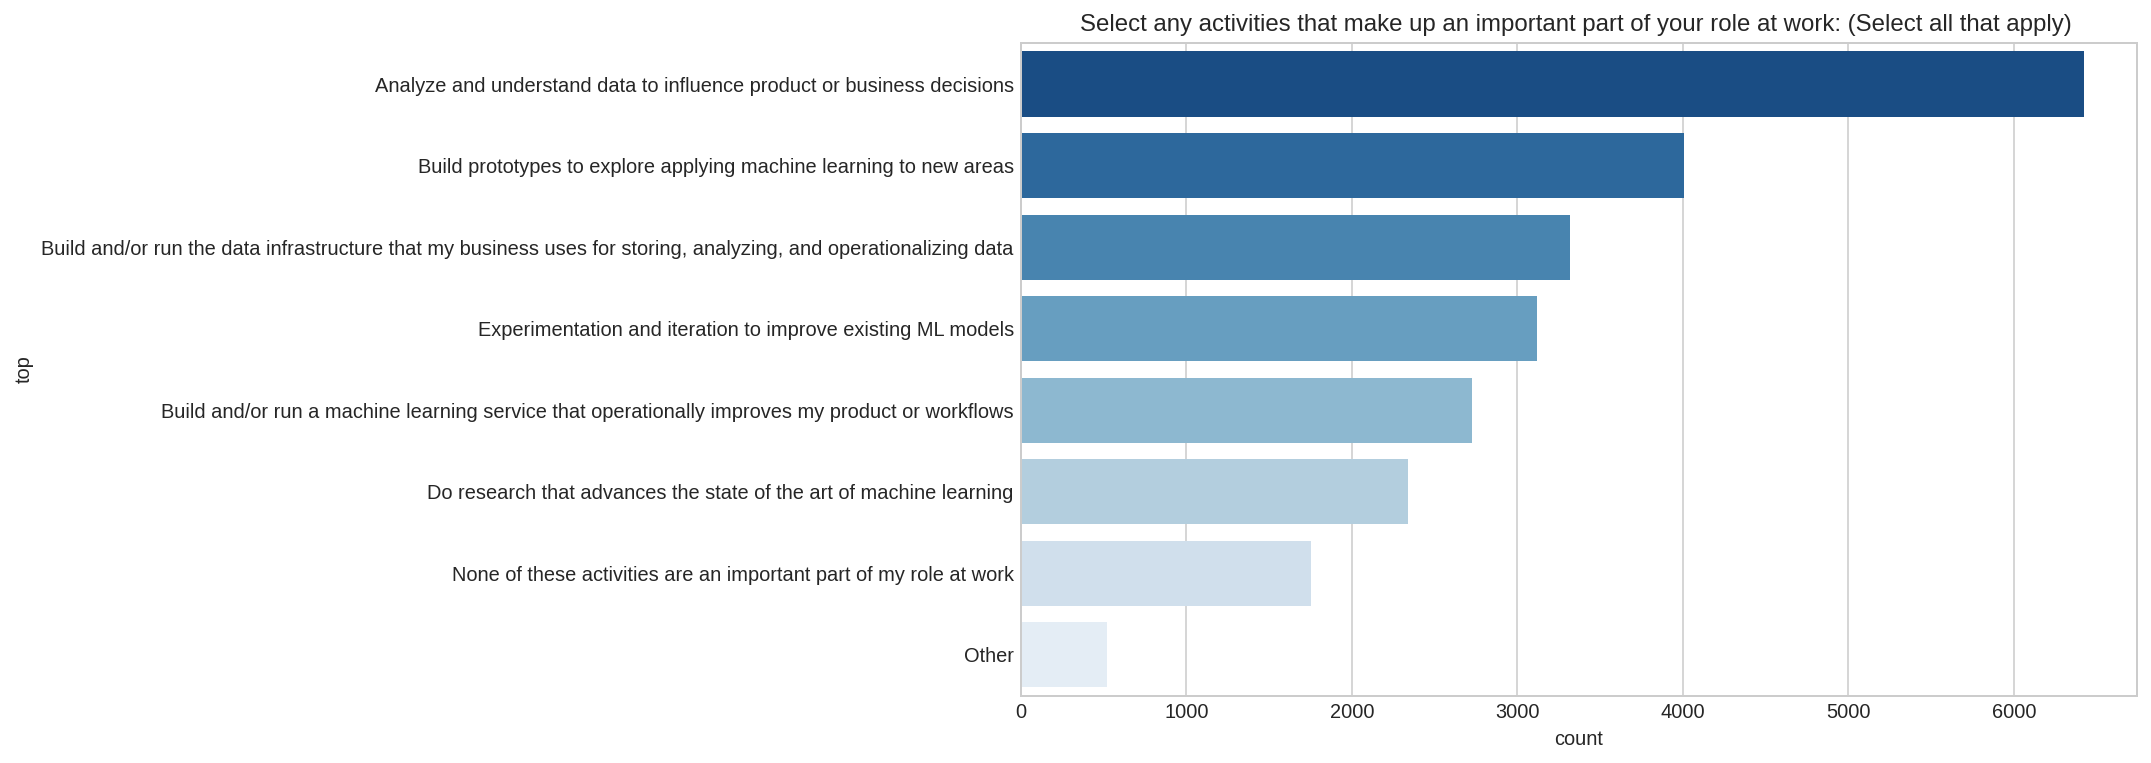

In [222]:
# 담당하고 있는 중요 업무가 뭐냐
show_plot_by_qno("Q23")

Q24 What is your current yearly compensation (approximate $USD)?

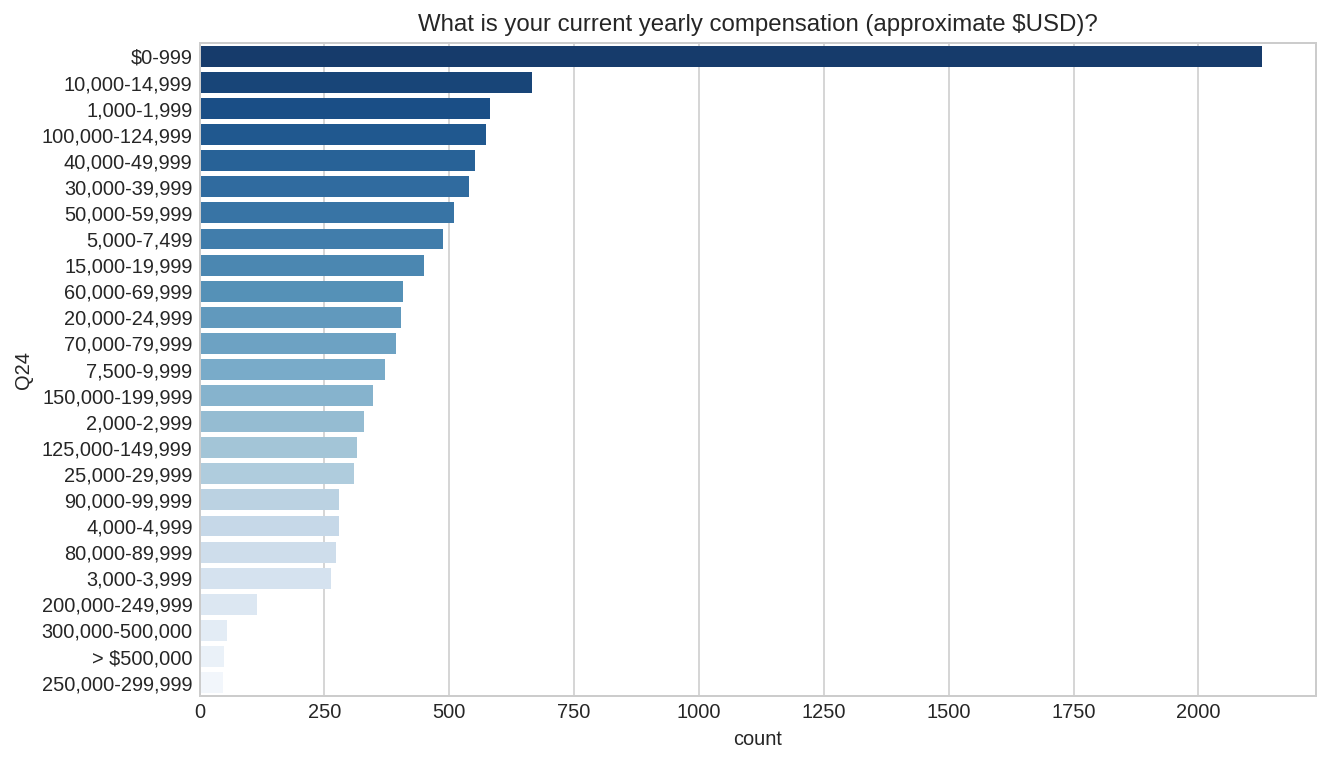

In [223]:
# 현재 받고 있는 임금이 어느정도 되는지
show_plot_by_qno("Q24")

In [231]:
# 임금순으로 정렬
q24_count = answer["Q24"].value_counts().reset_index()
q24_count.columns = ["range", "count"]
q24_count.sort_values("range") # 앞에 0이냐 1이냐 2냐 이런 식으로 정렬이 됨.

range  count
0            $0-999   2128
2       1,000-1,999    581
1     10,000-14,999    665
3   100,000-124,999    573
15  125,000-149,999    315
8     15,000-19,999    449
13  150,000-199,999    347
14      2,000-2,999    330
10    20,000-24,999    404
21  200,000-249,999    115
16    25,000-29,999    310
24  250,000-299,999     48
20      3,000-3,999    264
5     30,000-39,999    540
22  300,000-500,000     55
18      4,000-4,999    279
4     40,000-49,999    552
7       5,000-7,499    488
6     50,000-59,999    510
9     60,000-69,999    408
12      7,500-9,999    371
11    70,000-79,999    394
19    80,000-89,999    273
17    90,000-99,999    280
23       > $500,000     50

In [246]:
# 숫자 순으로 정렬되도록
q24_count["range"].str.split("-")
q24_count["range"].str.split("-", expand=True) # 데이터프레임 형태
q24_count["min"] = q24_count["range"].str.split("-", expand=True)[0]
q24_count["max"] = q24_count["range"].str.split("-", expand=True)[1]

# 숫자로 바꿔주기 위해서 특수문자 다 제거
# q24_count["min"].str.replace(",|\$|>","") # $: 정규표현식이라서 $그대로 쓰려면 \$로
q24_count["min"] = q24_count["min"].str.replace(",|\$|>","").astype(int)
q24_count = q24_count.sort_values("min")
q24_count

range  count     min      max
0            $0-999   2128       0      999
2       1,000-1,999    581    1000    1,999
14      2,000-2,999    330    2000    2,999
20      3,000-3,999    264    3000    3,999
18      4,000-4,999    279    4000    4,999
7       5,000-7,499    488    5000    7,499
12      7,500-9,999    371    7500    9,999
1     10,000-14,999    665   10000   14,999
8     15,000-19,999    449   15000   19,999
10    20,000-24,999    404   20000   24,999
16    25,000-29,999    310   25000   29,999
5     30,000-39,999    540   30000   39,999
4     40,000-49,999    552   40000   49,999
6     50,000-59,999    510   50000   59,999
9     60,000-69,999    408   60000   69,999
11    70,000-79,999    394   70000   79,999
19    80,000-89,999    273   80000   89,999
17    90,000-99,999    280   90000   99,999
3   100,000-124,999    573  100000  124,999
15  125,000-149,999    315  125000  149,999
13  150,000-199,999    347  150000  199,999
21  200,000-249,999    115  200000  249,999
24  250,000-299,999     48  250000  299,999
22  300,000-500,000     55  300000  500,000
23       > $500,000     50  500000     None

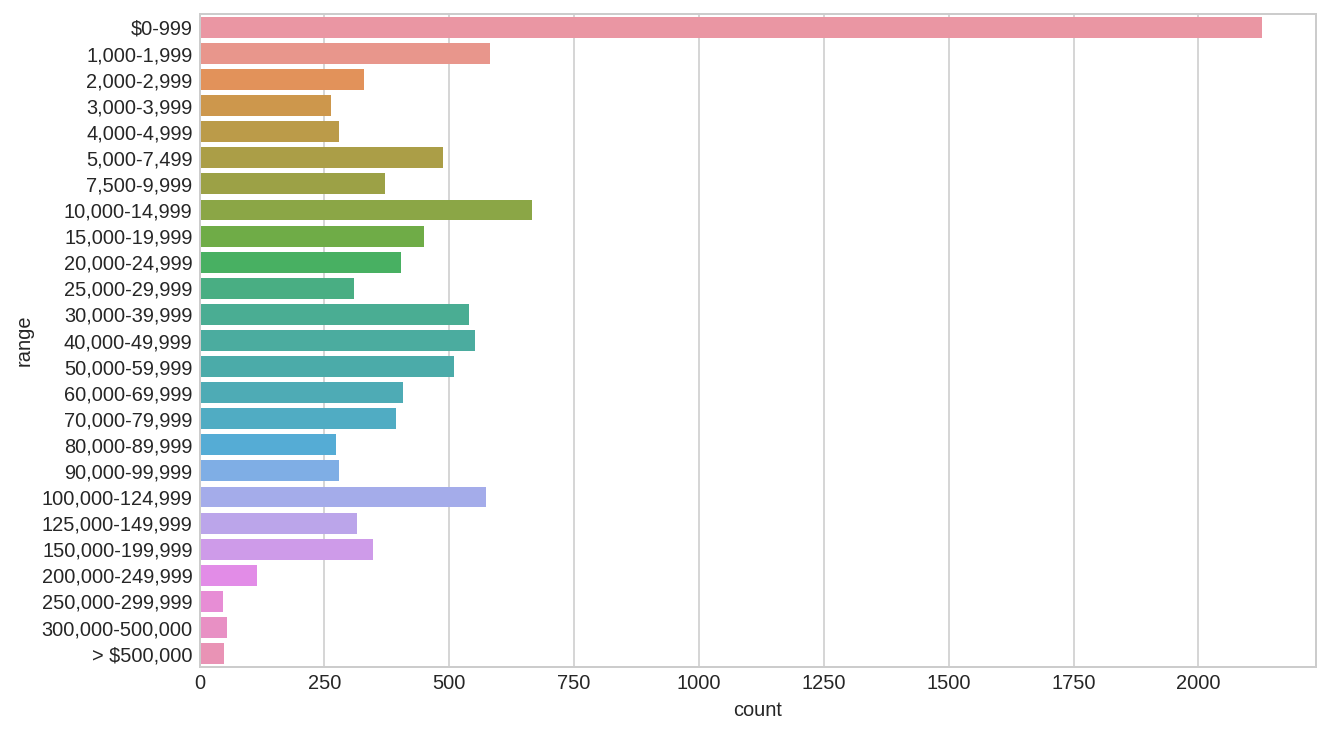

In [249]:
plt.figure(figsize=(10,6))
sns.barplot(data=q24_count, y="range", x="count")

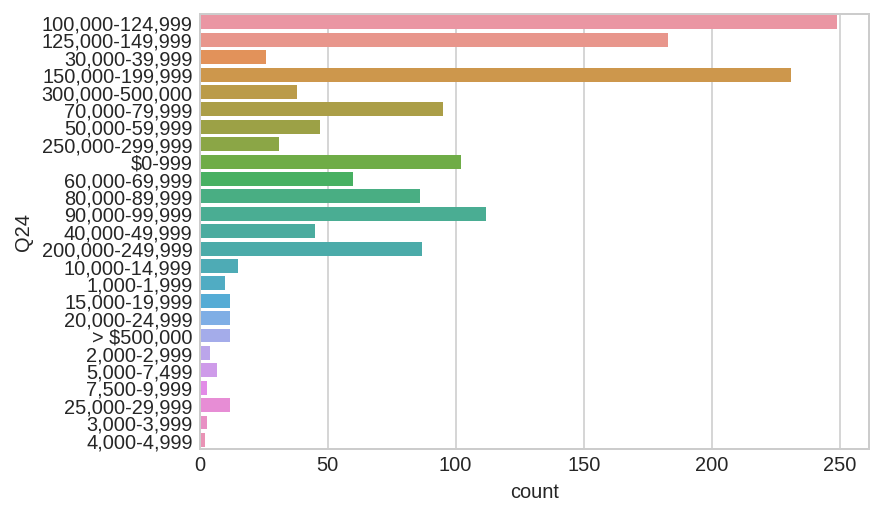

In [257]:
# 미국 응답자만 보고싶다!
question # Q3가 국가에 대한 내용
answer['Q3'].value_counts()
q3_usa = answer[answer['Q3'].isin(["United States of America"])]

sns.countplot(data=q3_usa, y="Q24")

In [258]:
q24_cols = q24_count.range.tolist()

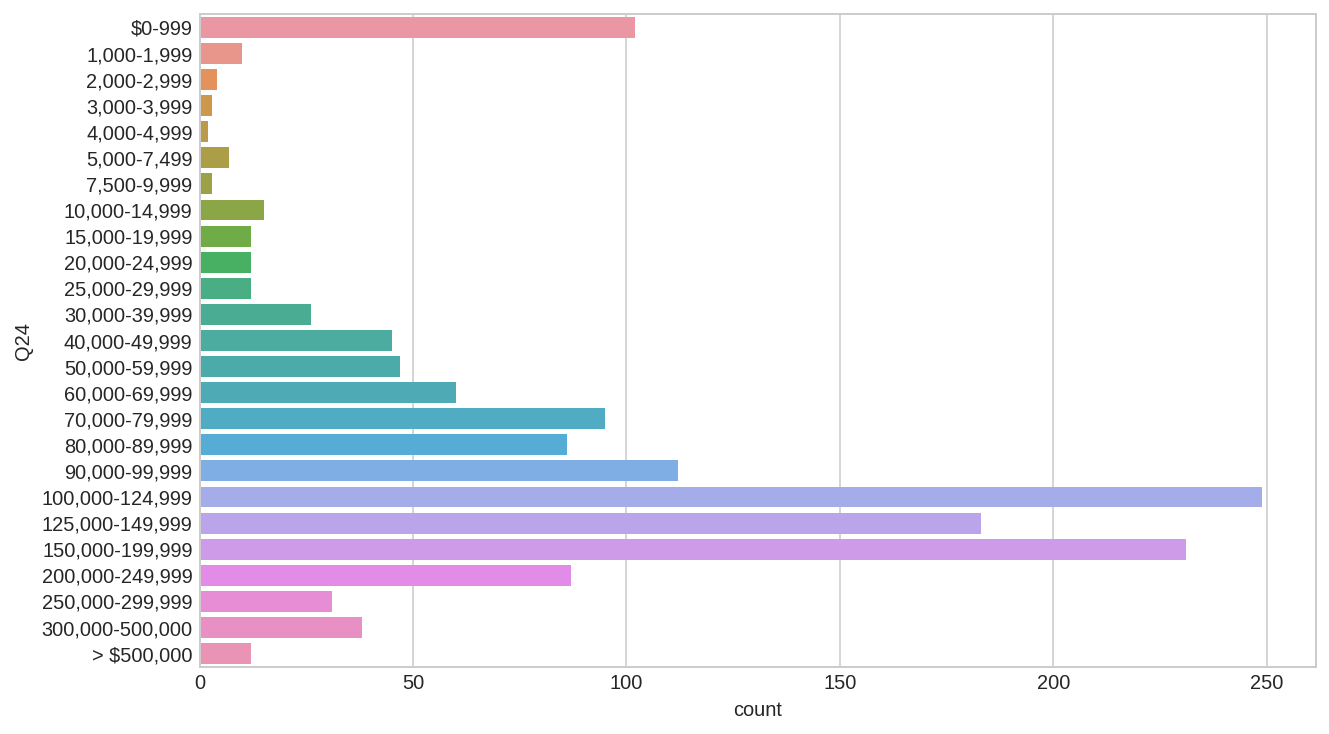

In [261]:
plt.figure(figsize=(10,6))
sns.countplot(data=q3_usa, y="Q24", order=q24_cols)

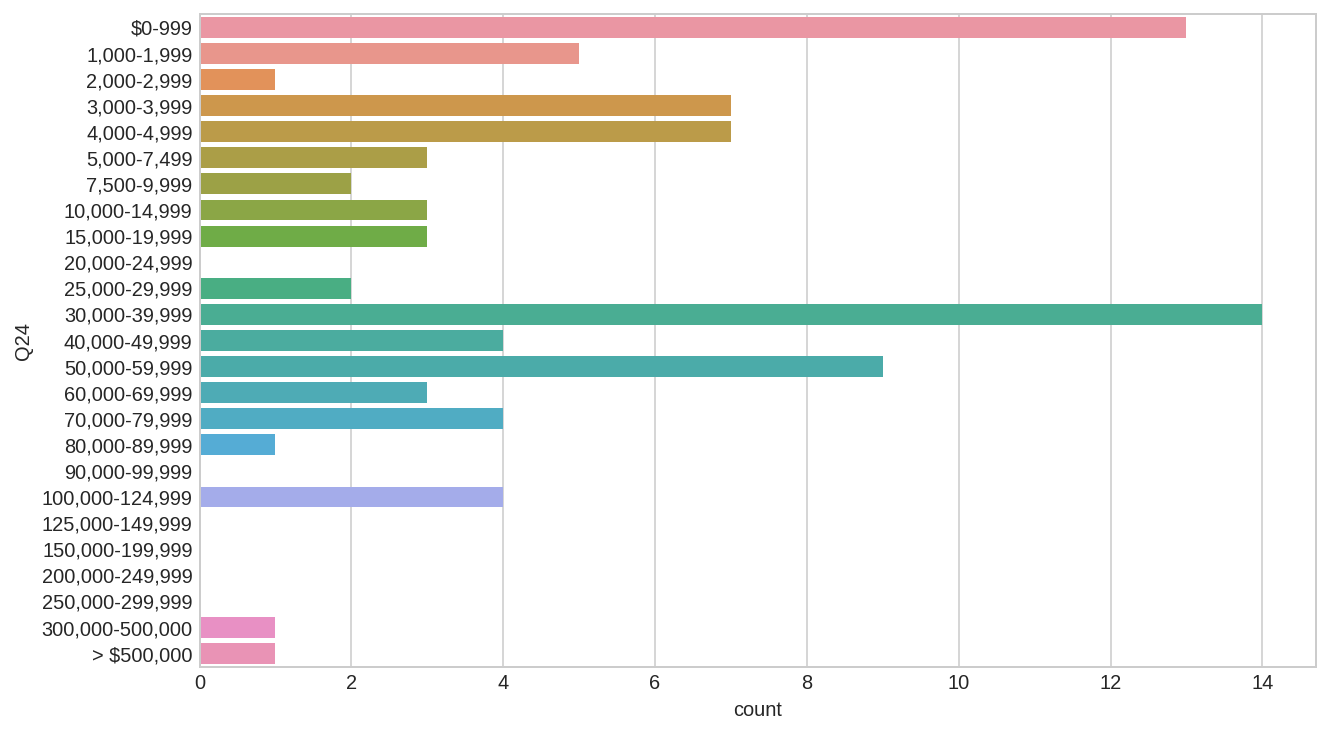

In [263]:
# 한국꺼 알아보자
answer['Q3'].value_counts()
q3_korea = answer[answer['Q3'].isin(["South Korea"])]
plt.figure(figsize=(10,6))
sns.countplot(data=q3_korea, y="Q24", order=q24_cols)

Q25 Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?

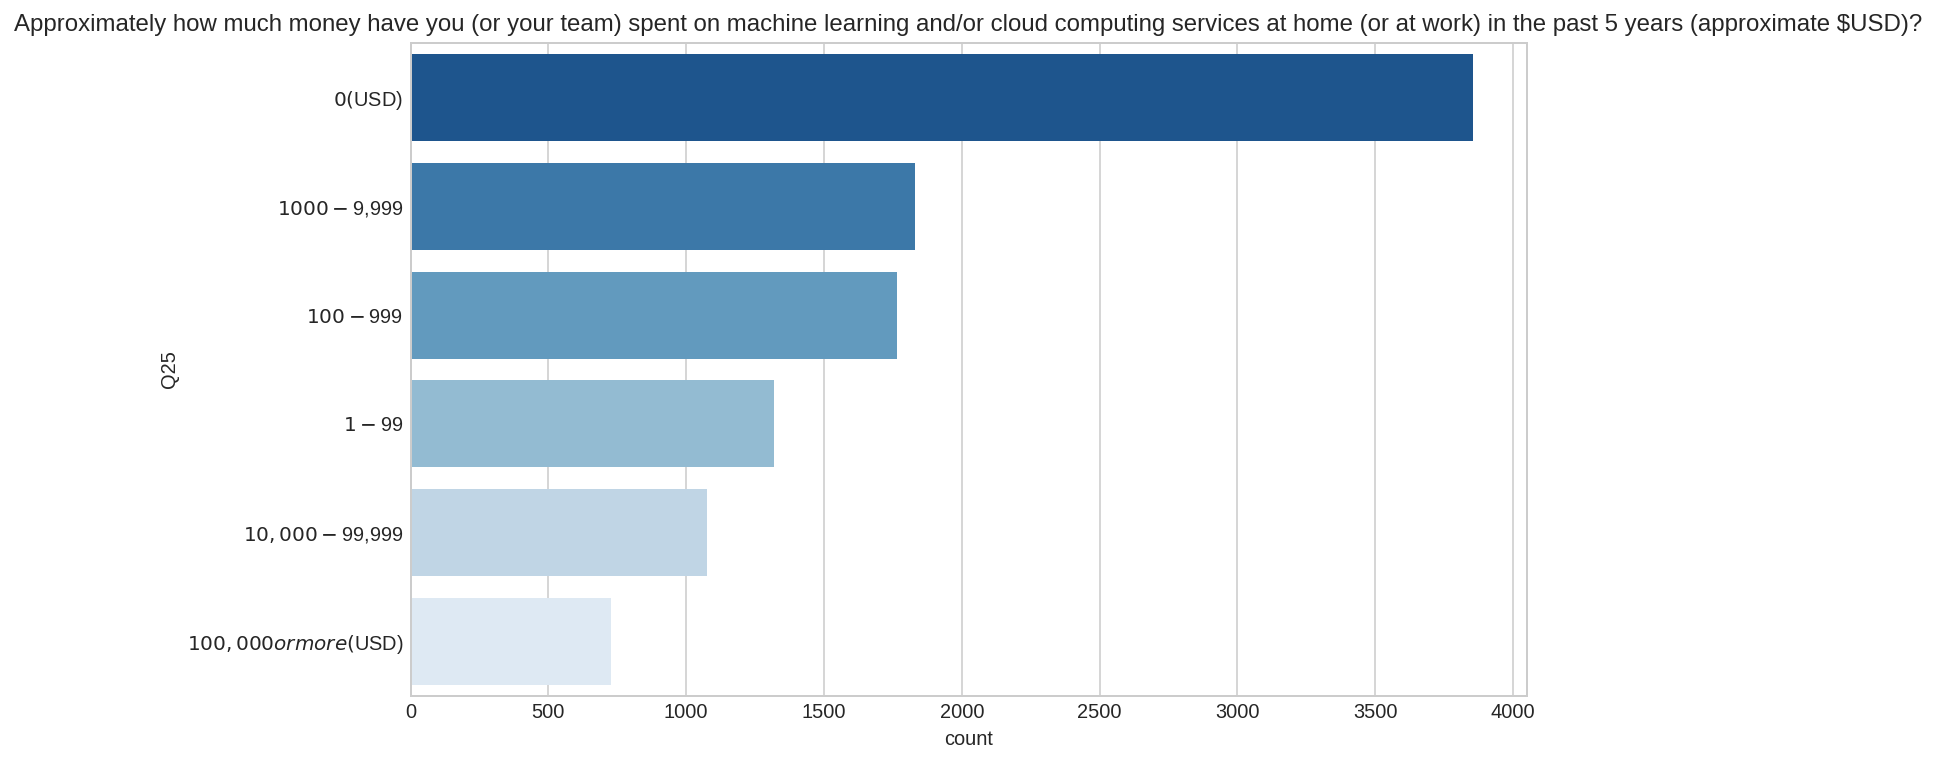

In [225]:
# 팀이나 개인적으로 머신러닝이나 클라우드 컴퓨팅에 지난 5년간 돈을 얼마 썼는지
show_plot_by_qno("Q25")

Q26_A Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply)

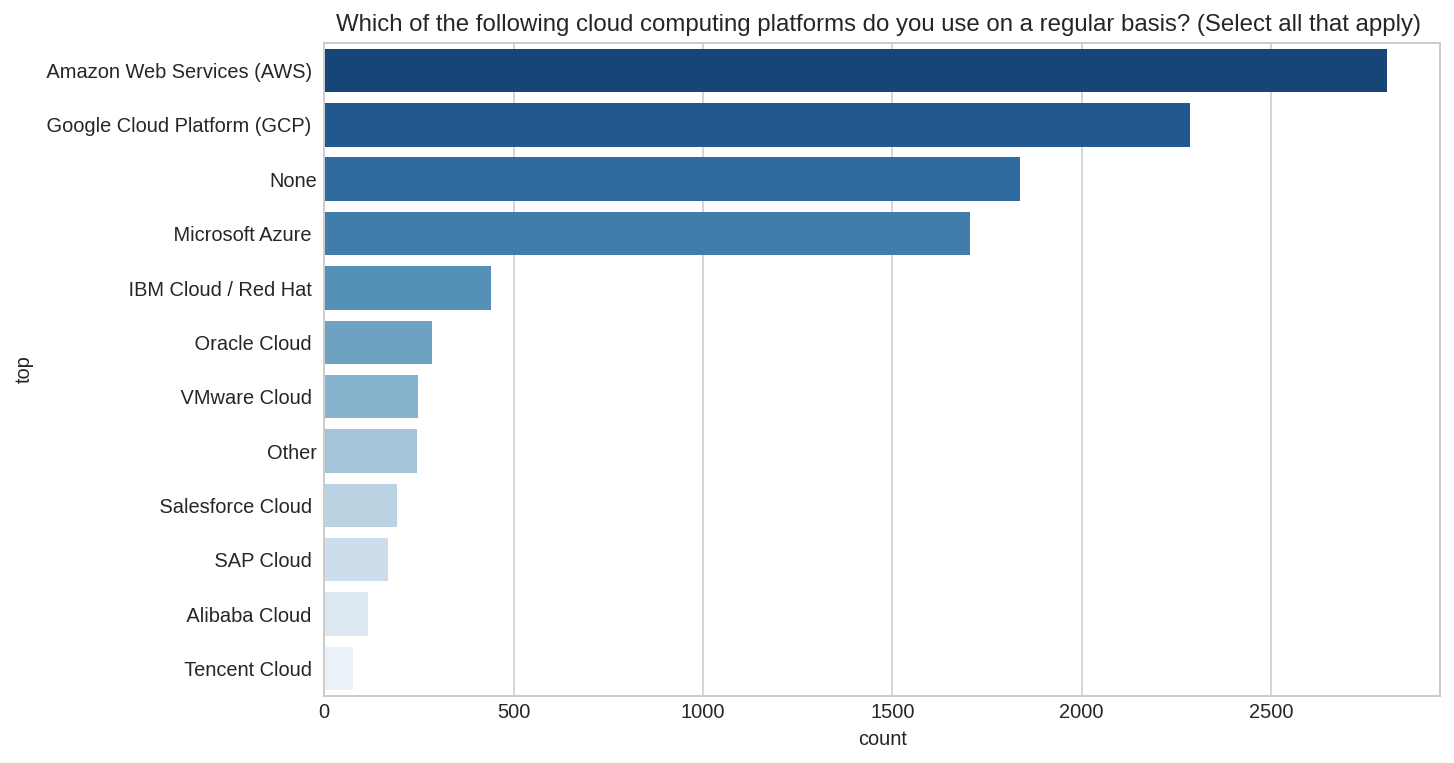

In [276]:
# 2개의 질문의 응답값을 가져옴
# 어떤 플랫폼을 사용하는지
show_plot_by_qno("Q26_A")

Q26_B Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?

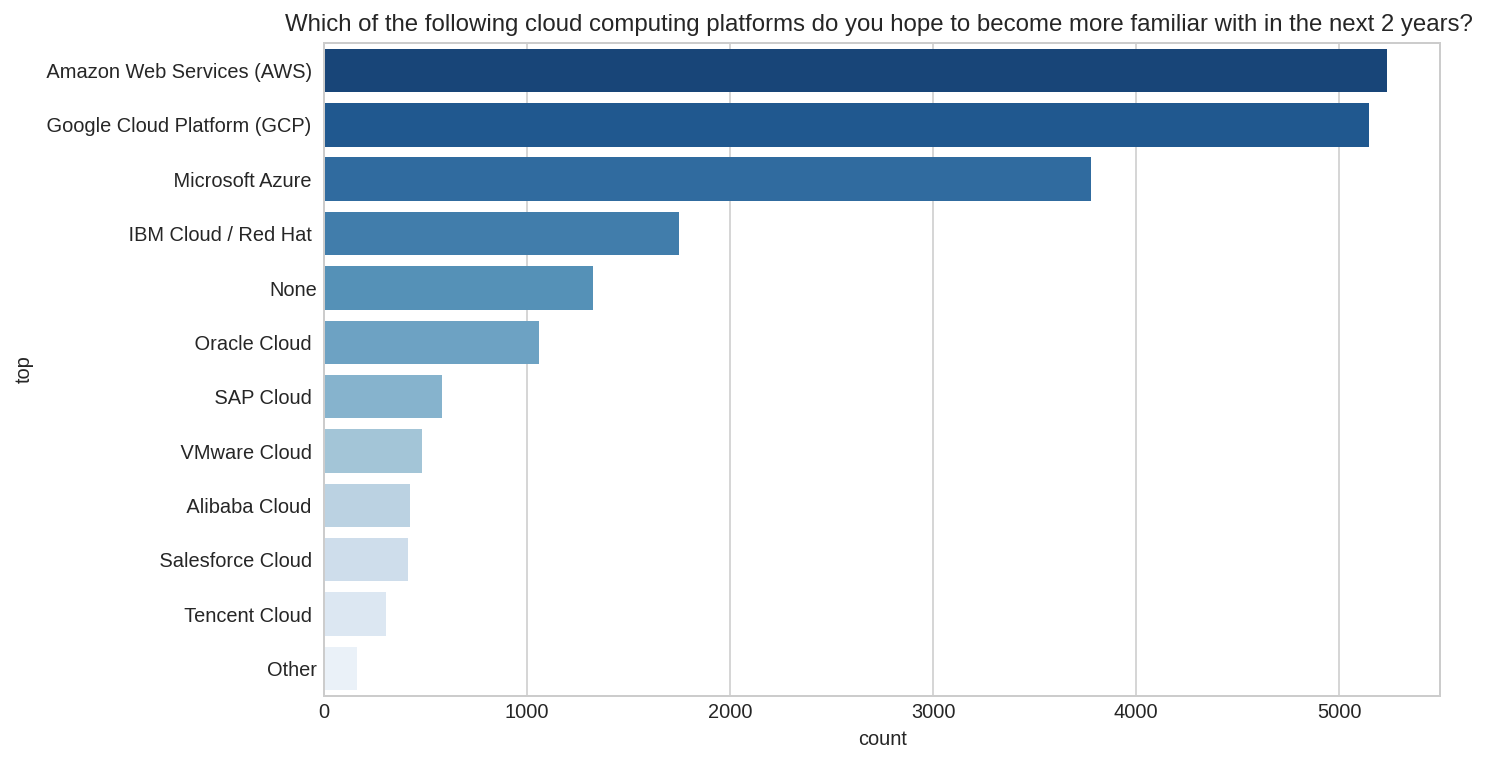

In [277]:
# 앞으로는 어떤 플랫폼을 사용할거냐
show_plot_by_qno("Q26_B")

Q27_A Do you use any of the following cloud computing products on a regular basis? (Select all that apply)

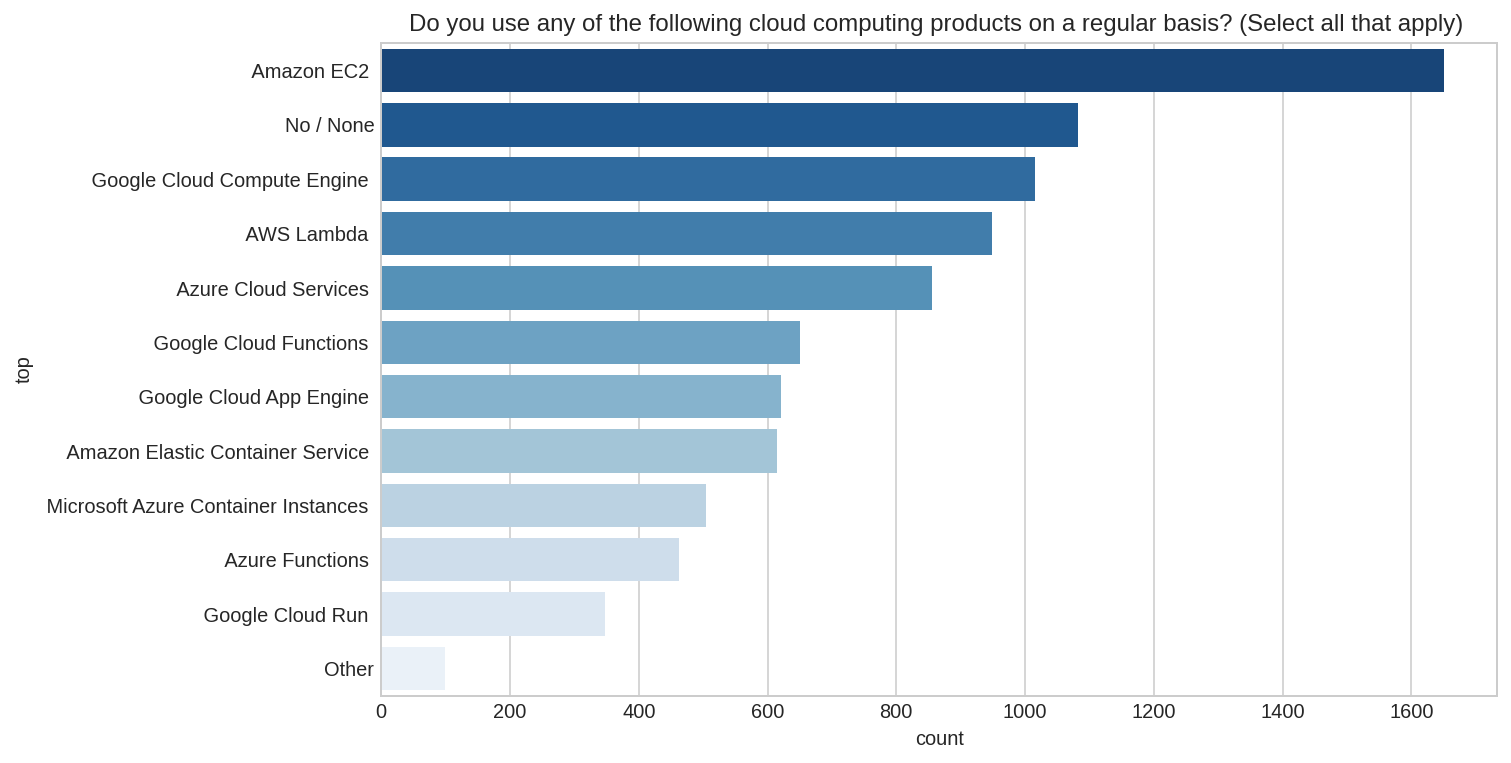

In [280]:
# 클라우드 컴퓨팅 제품 중에 어떤 제품군을 사용하고 있는지
show_plot_by_qno("Q27_A")

Q27_B In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply)

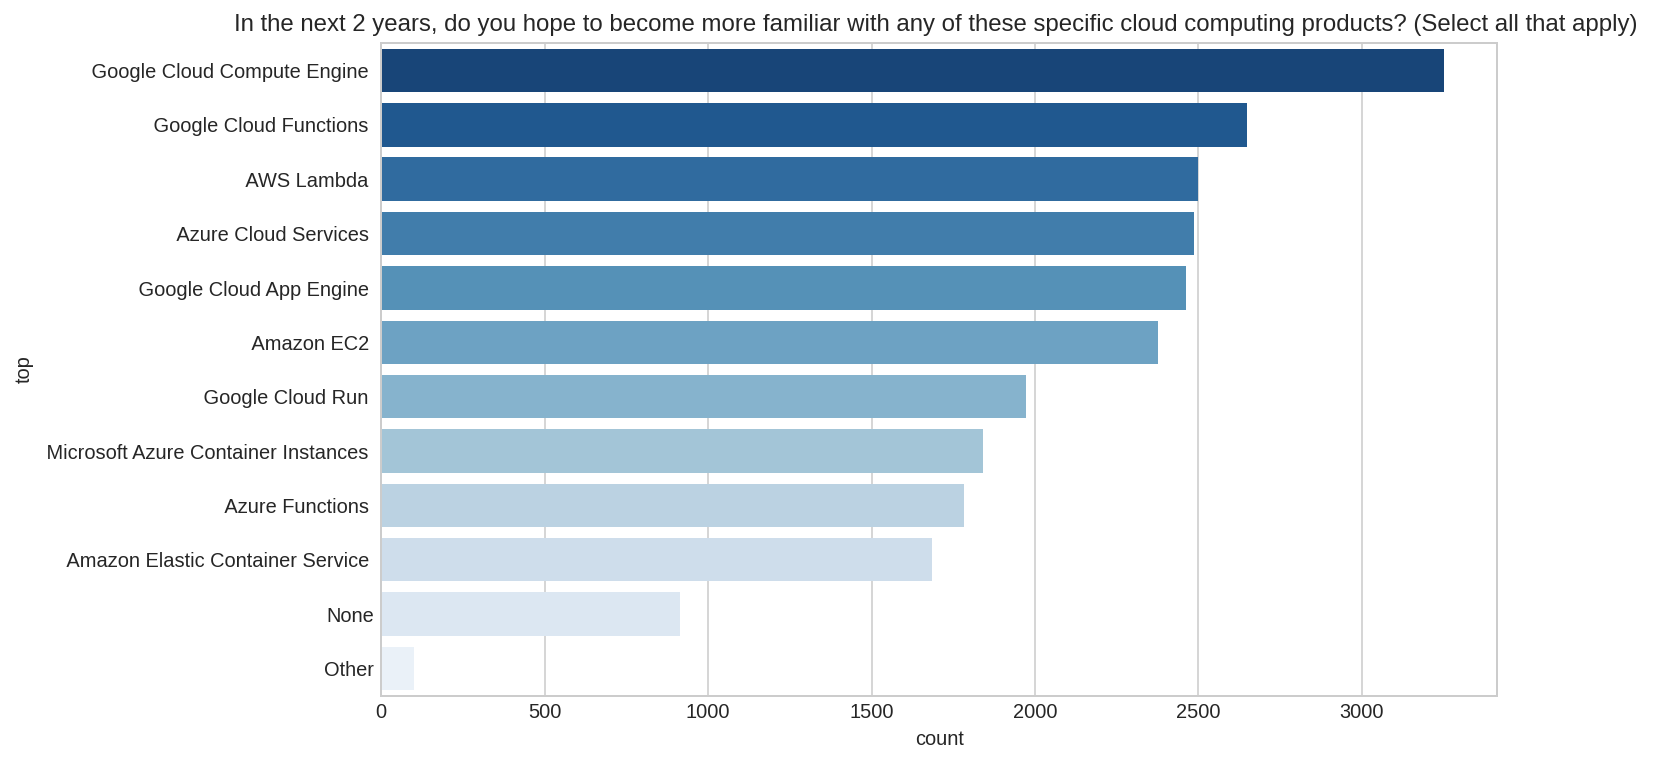

In [283]:
# 앞으로는 그럼 어떤걸 사용할 건지
show_plot_by_qno("Q27_B")

Q28_A Do you use any of the following machine learning products on a regular basis? (Select all that apply)

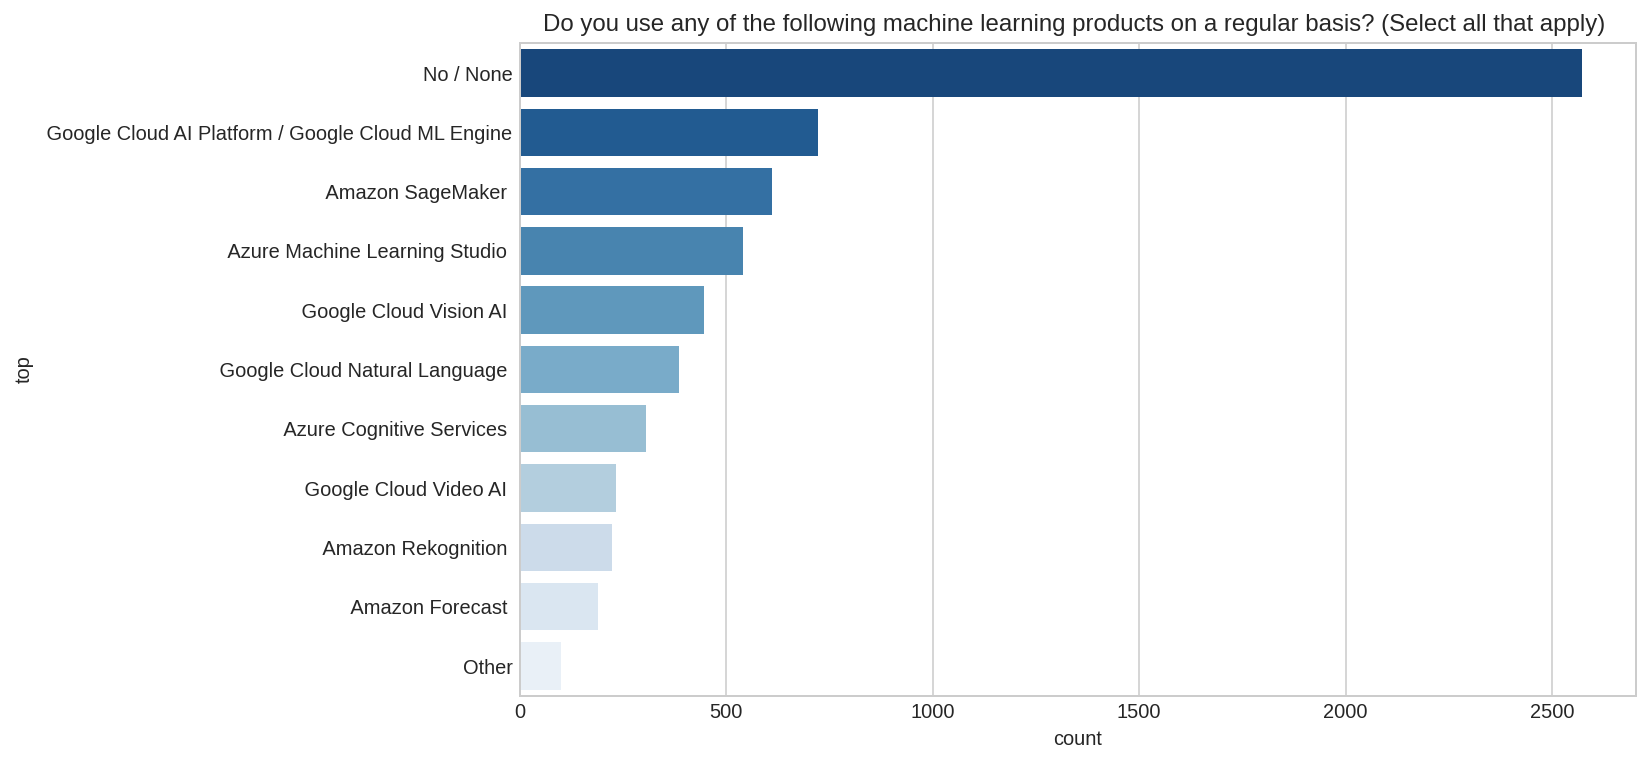

In [286]:
# 어떤 머신러닝 프로덕트를 사용하냐
show_plot_by_qno("Q28_A")

Q28_B In the next 2 years, do you hope to become more familiar with any of these specific machine learning products? (Select all that apply)

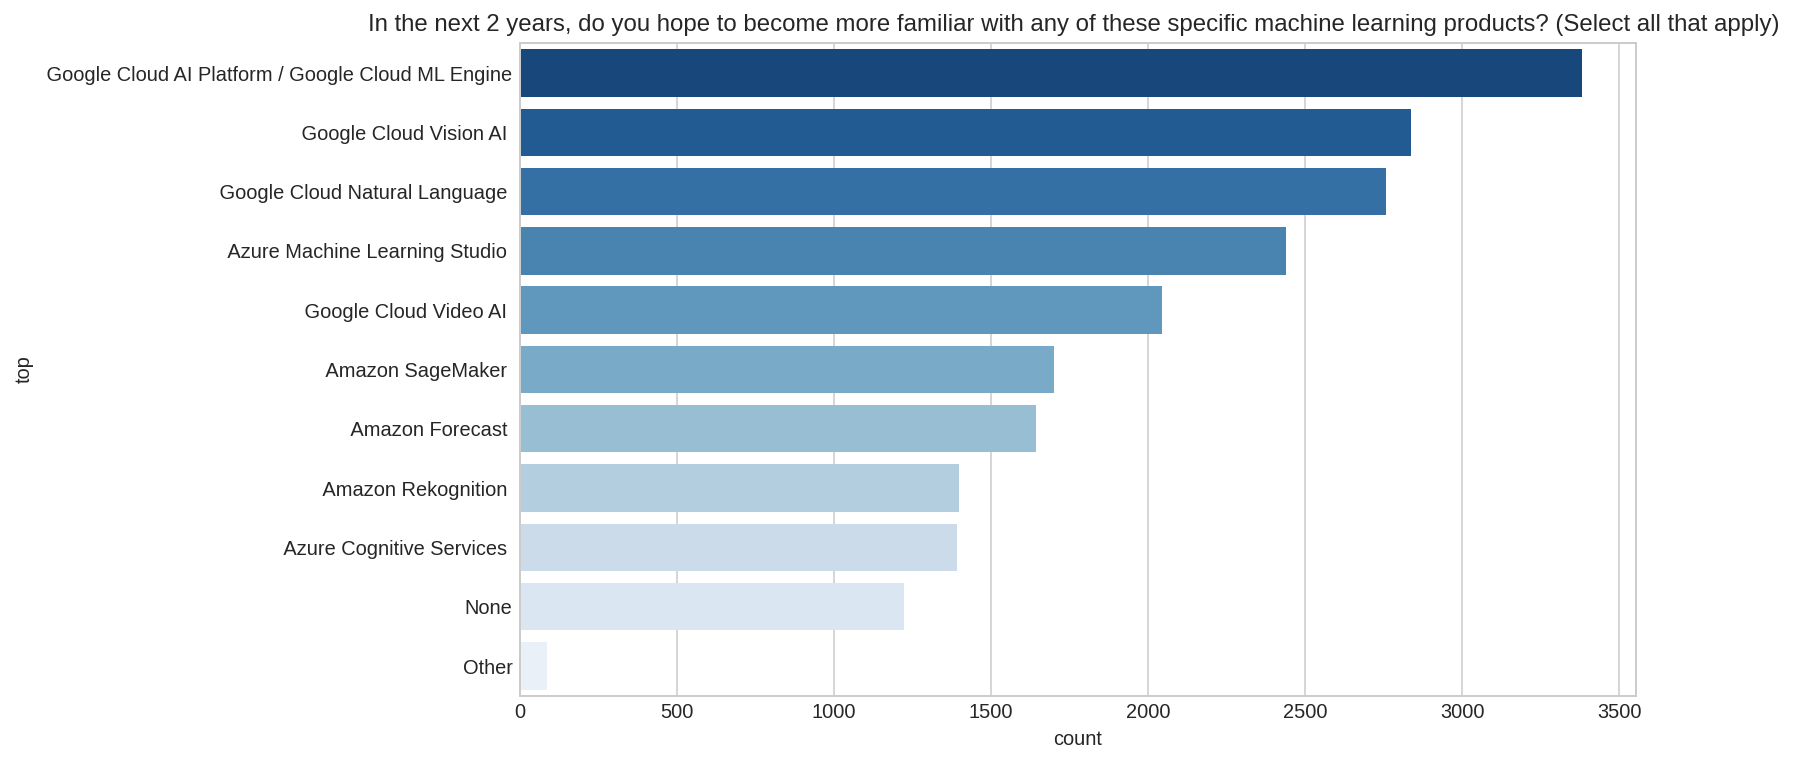

In [287]:
# 앞으로는 어떤걸 사용할건지
show_plot_by_qno("Q28_B")

Q29_A Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)

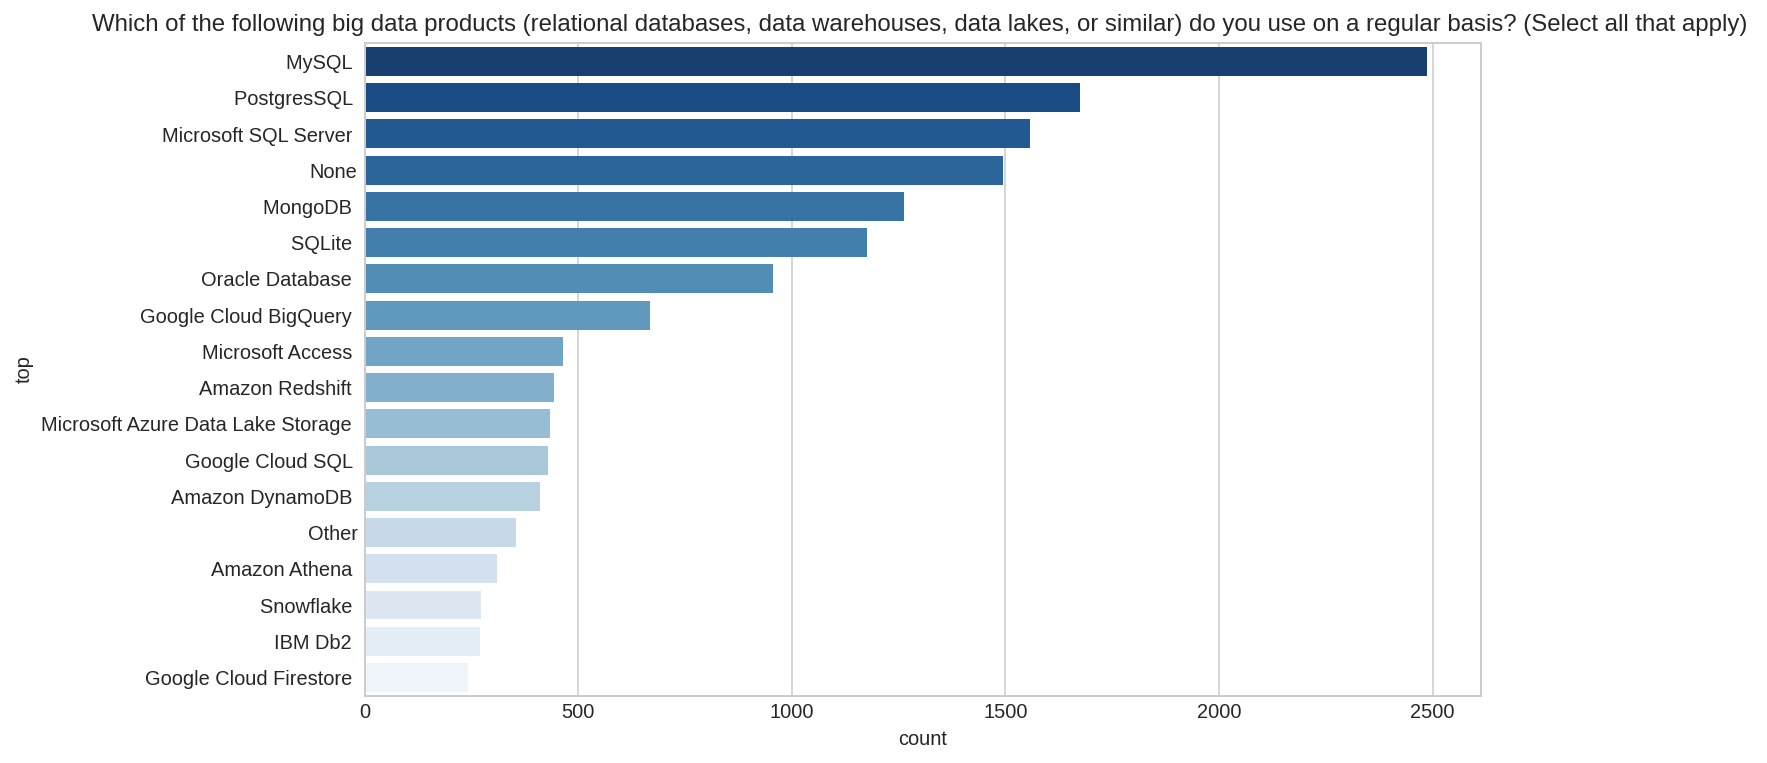

In [289]:
# 빅데이터 제품 중 어떤 제품을 사용하는지
show_plot_by_qno("Q29_A")

Q29_B Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply) 

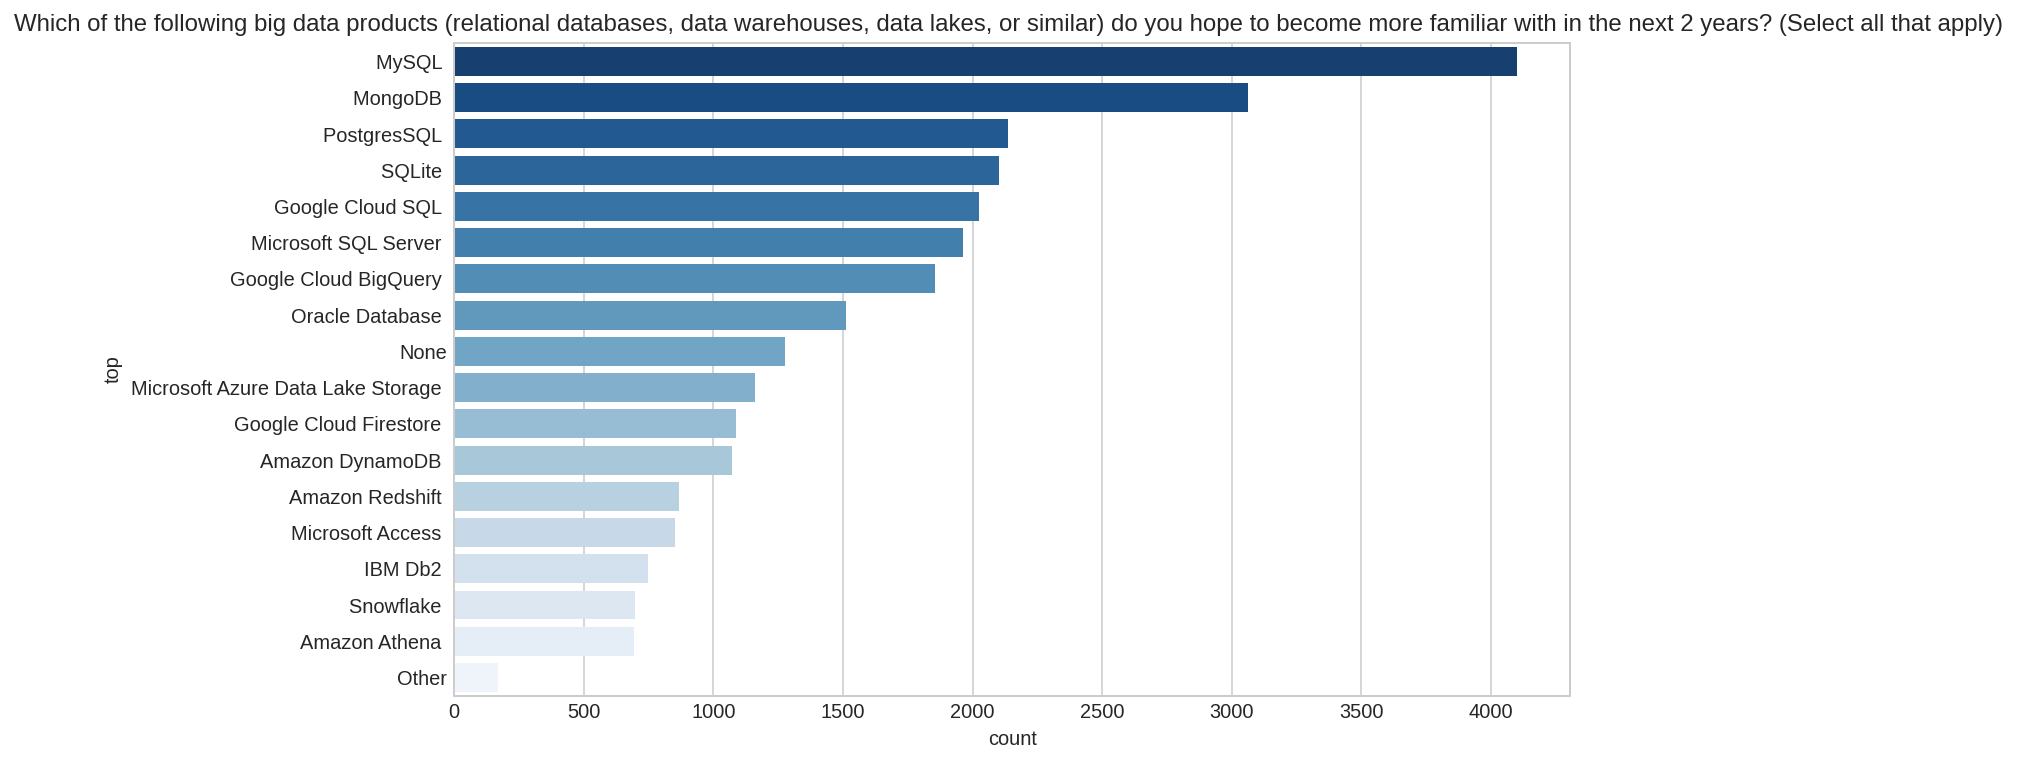

In [290]:
# 그럼 앞으로 어떤걸 사용할건지
show_plot_by_qno("Q29_B")

Q30 Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often?

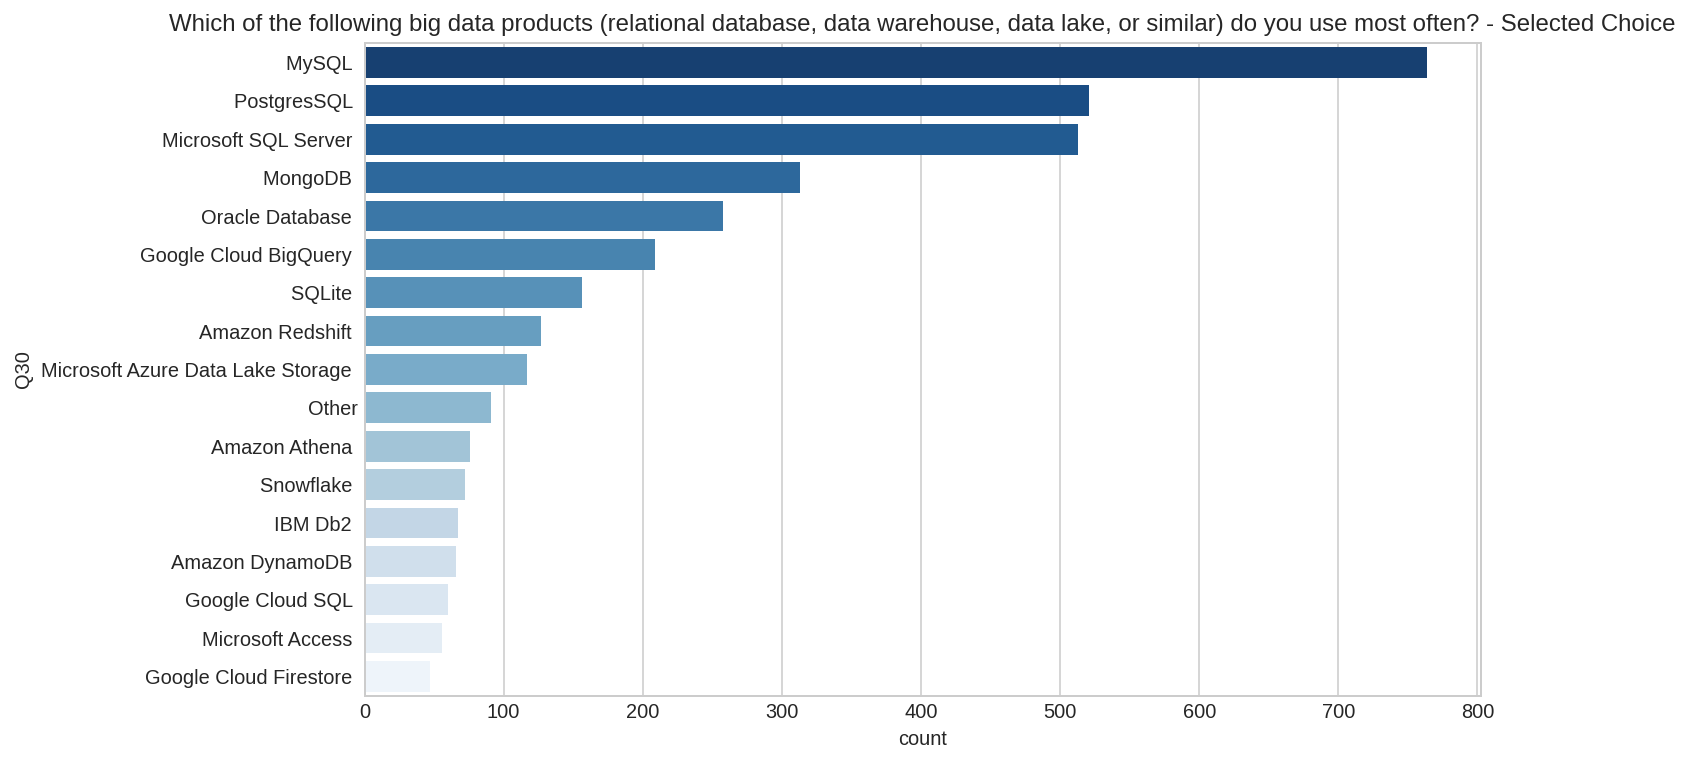

In [293]:
# 빅데이터 프로덕트로 가장 자주 사용하는게 어떤 건지(1개만 초이스)
show_plot_by_qno("Q30")

Q31_A Which of the following business intelligence tools do you use on a regular basis? (Select all that apply)

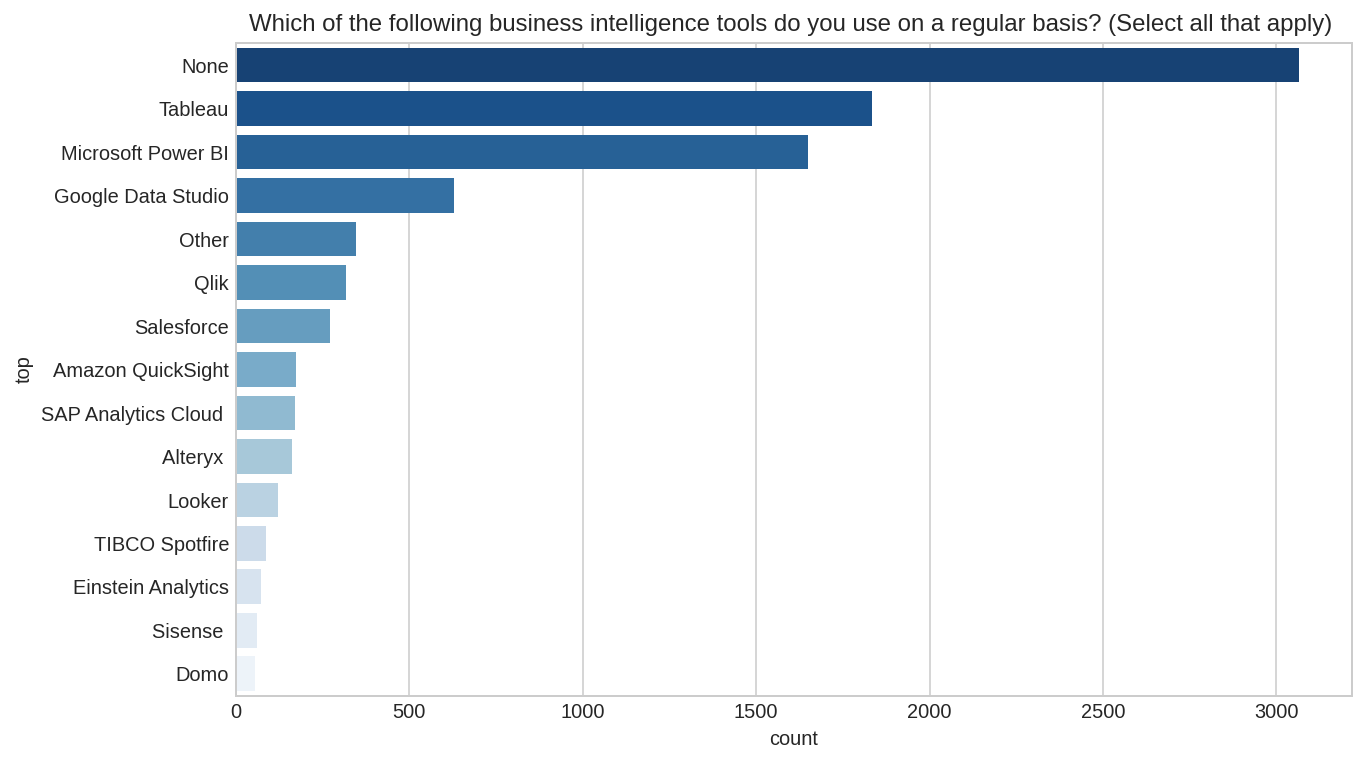

In [297]:
# 어떤 비즈니스 툴 사용하고 있는지(유료 툴)
show_plot_by_qno("Q31_A")

Q31_B Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply)

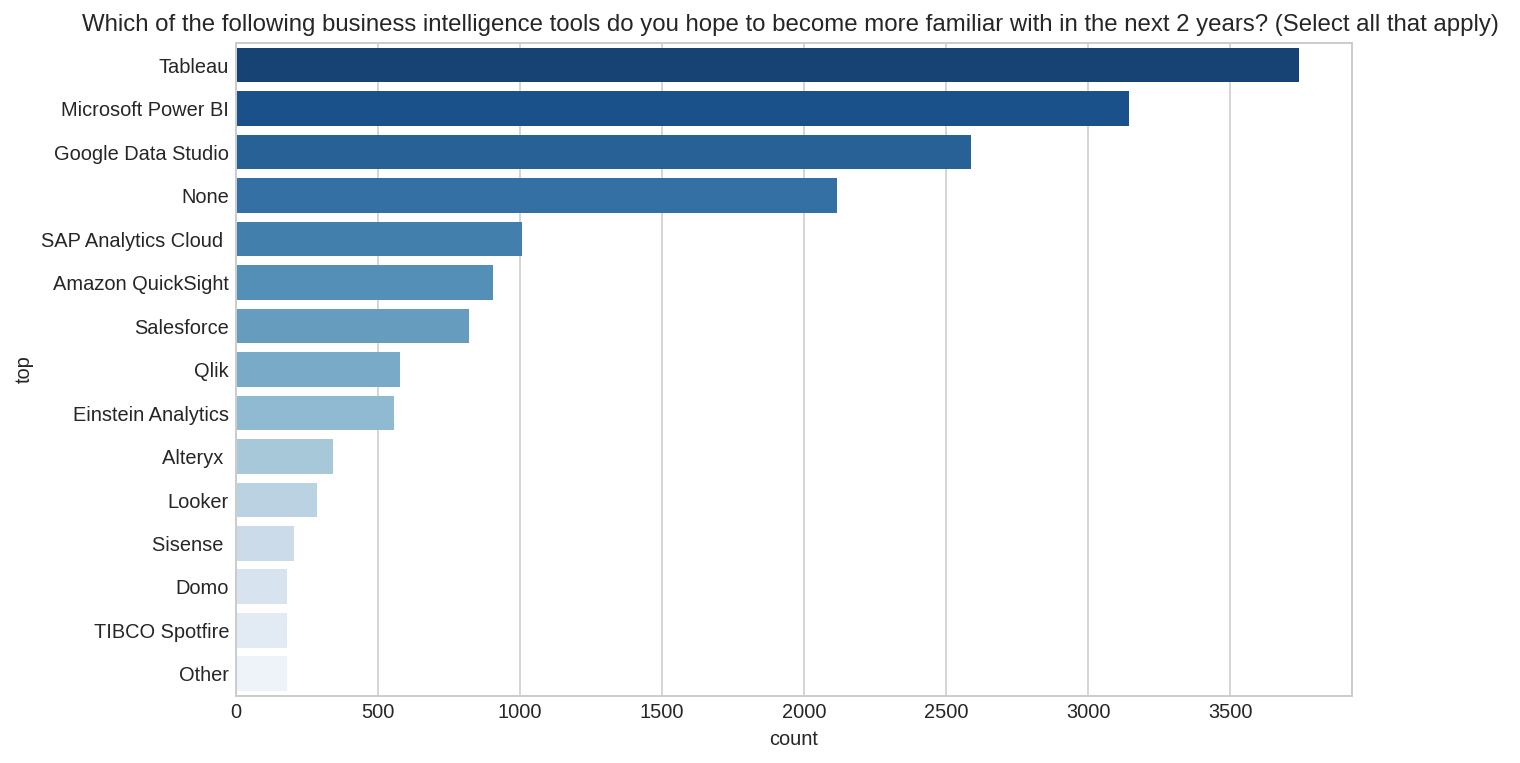

In [298]:
# 이후에 어떤 걸 사용하고자 하는지
show_plot_by_qno("Q31_B")

Q32 Which of the following business intelligence tools do you use most often?

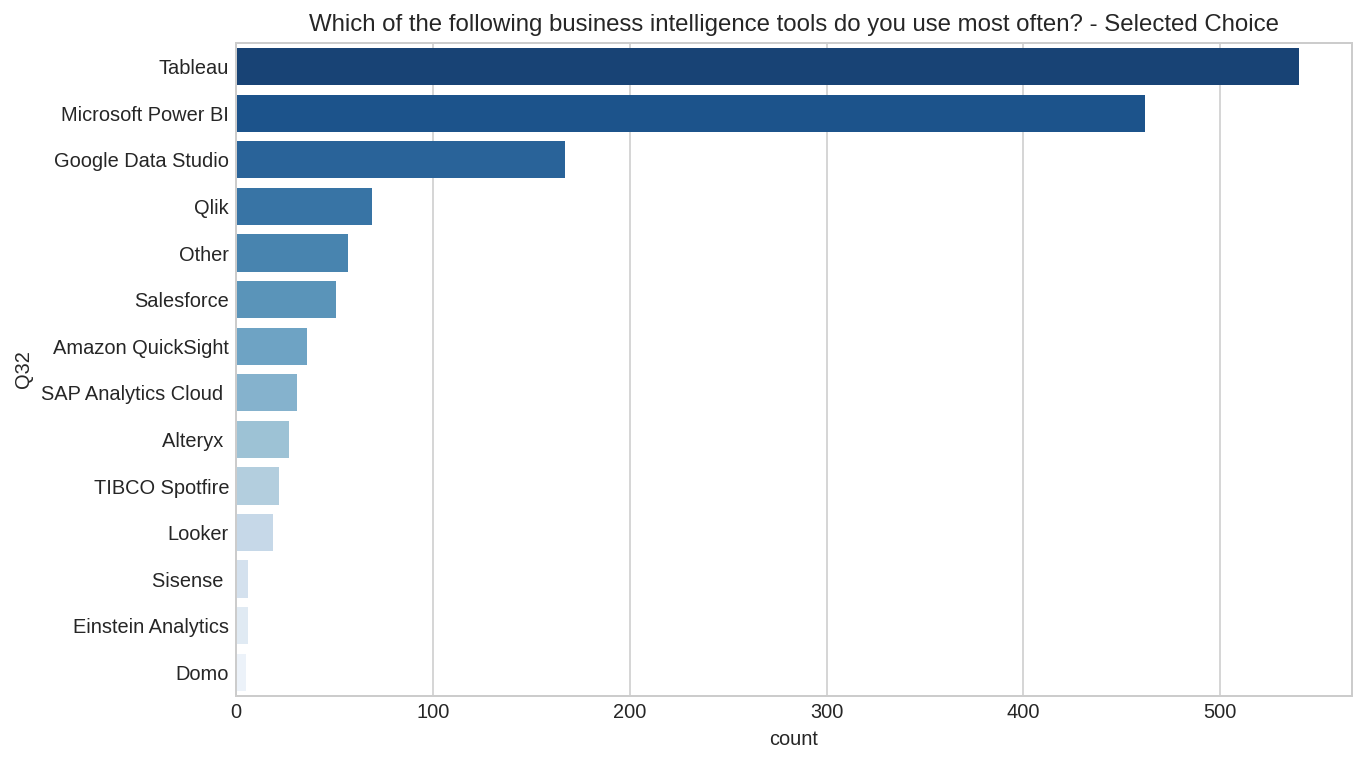

In [300]:
# 가장 자주 사용하는 툴이 어떤 건지
show_plot_by_qno("Q32")

Q33_A Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply)

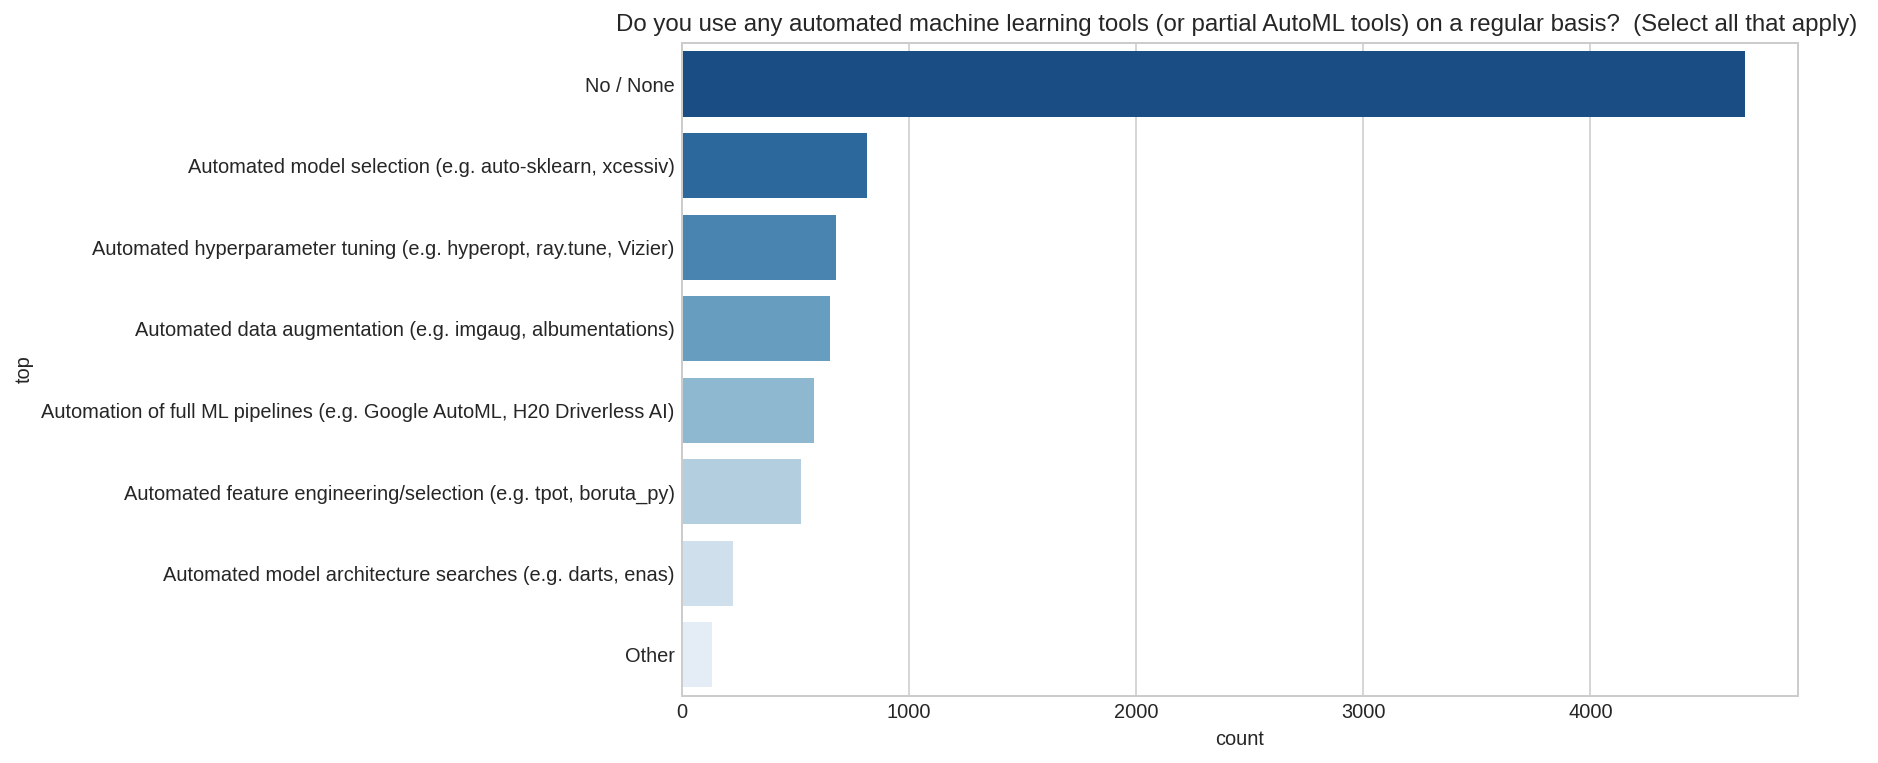

In [302]:
# AutoML 같은 제품군을 어디에 주로 사용하고 있는지
show_plot_by_qno("Q33_A")

Q33_B Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply)

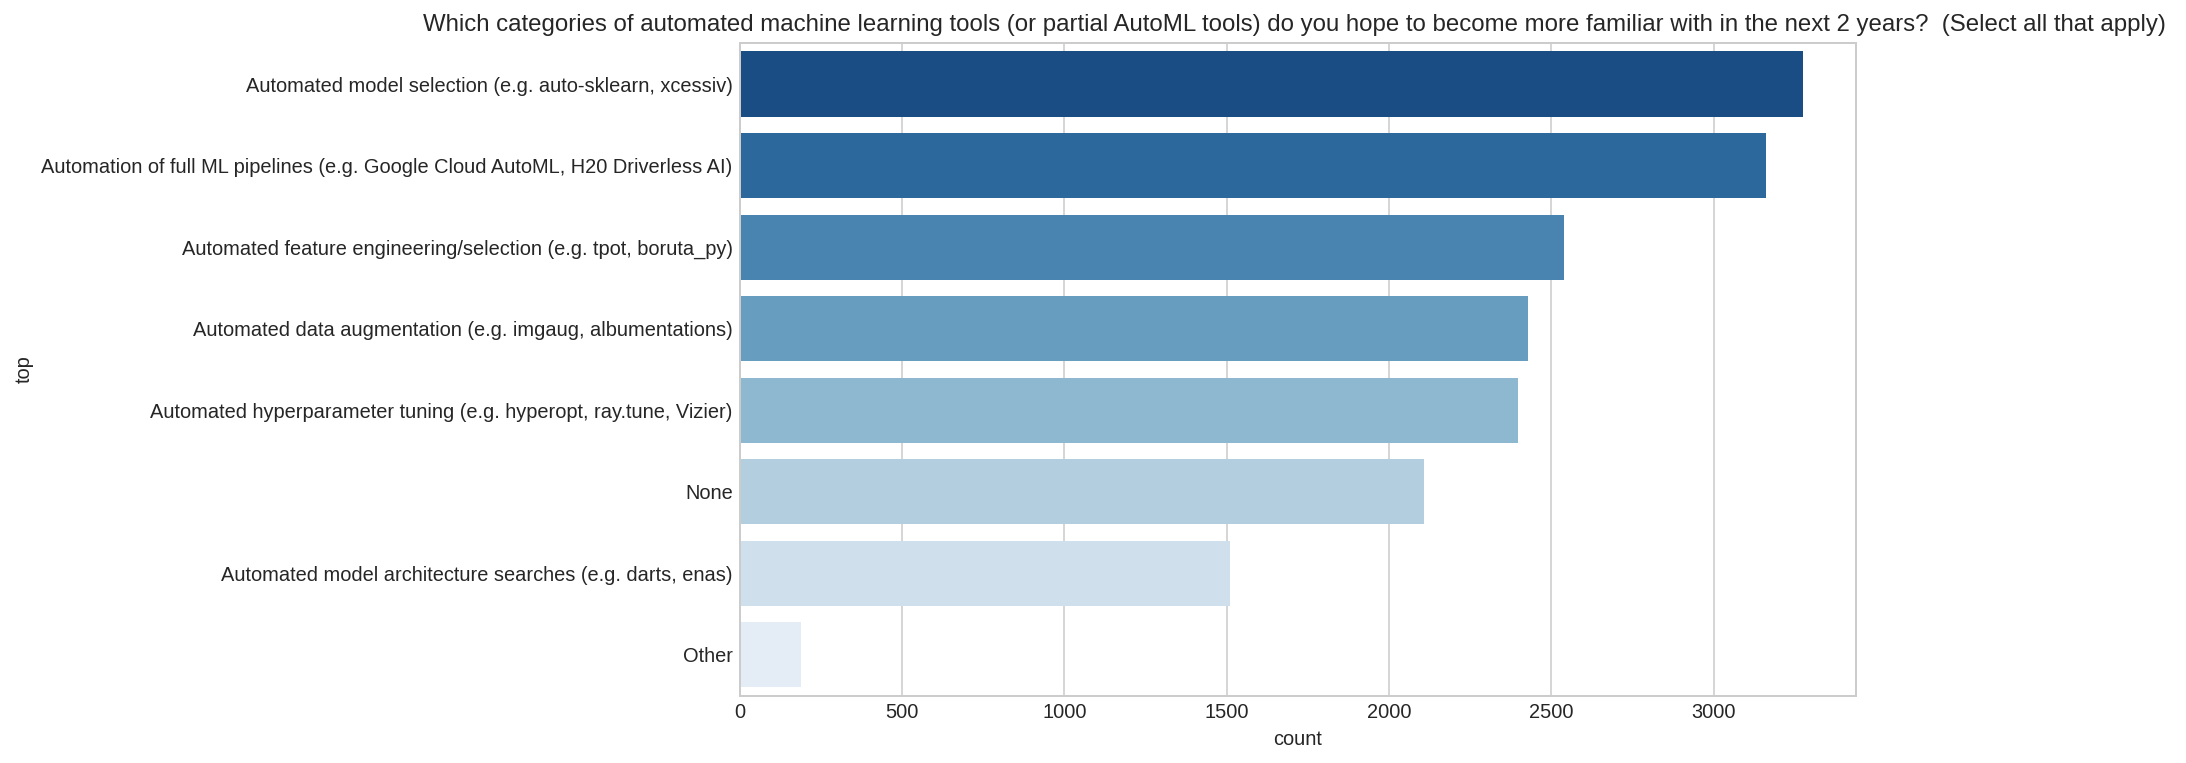

In [305]:
# 앞으로는 어떻게 할 건지
show_plot_by_qno("Q33_B")

Q34_A Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply)

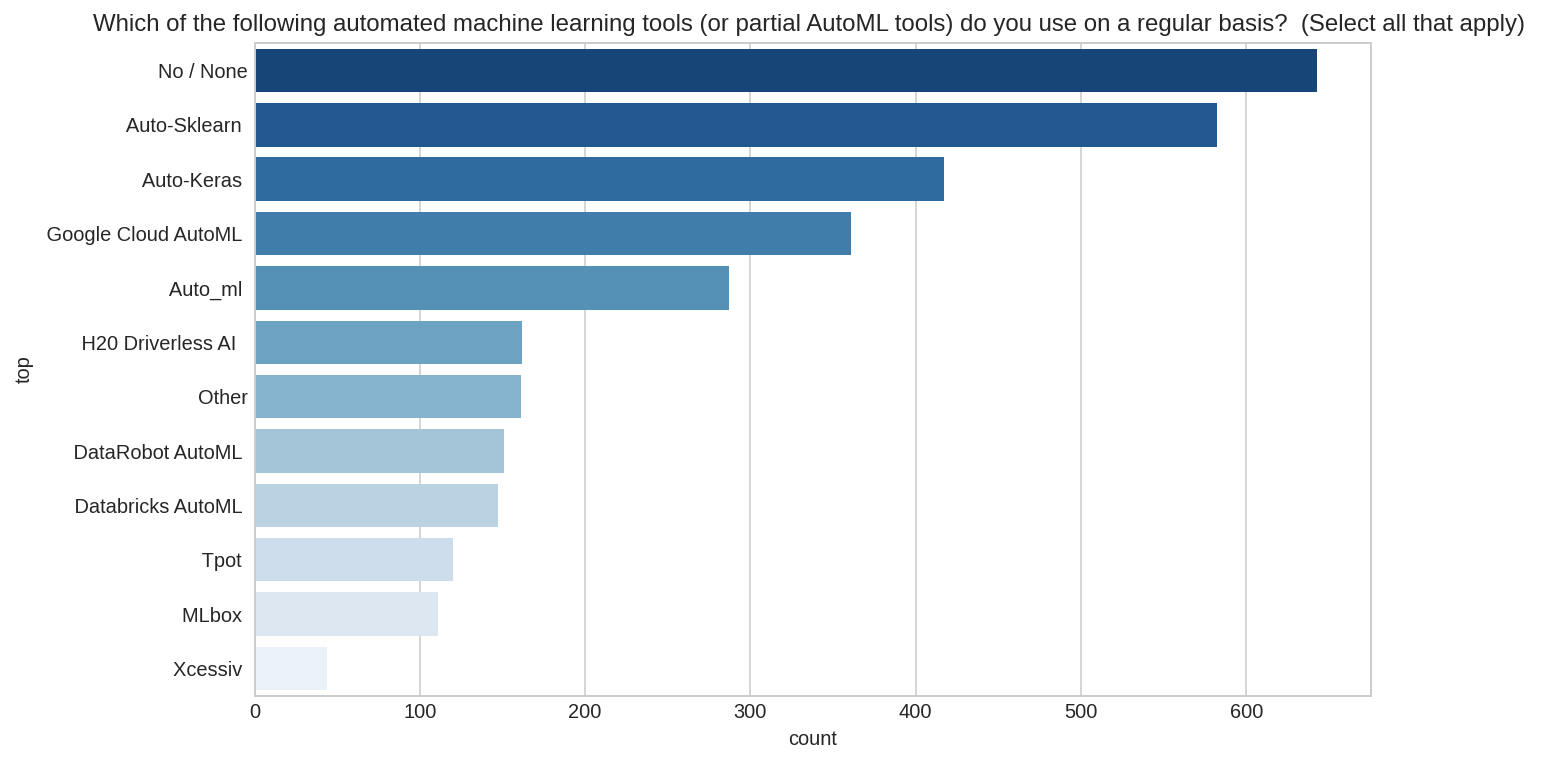

In [308]:
# AutoML에서 주로 사용하는게 어떤 건지
show_plot_by_qno("Q34_A")

Q34_B Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply)

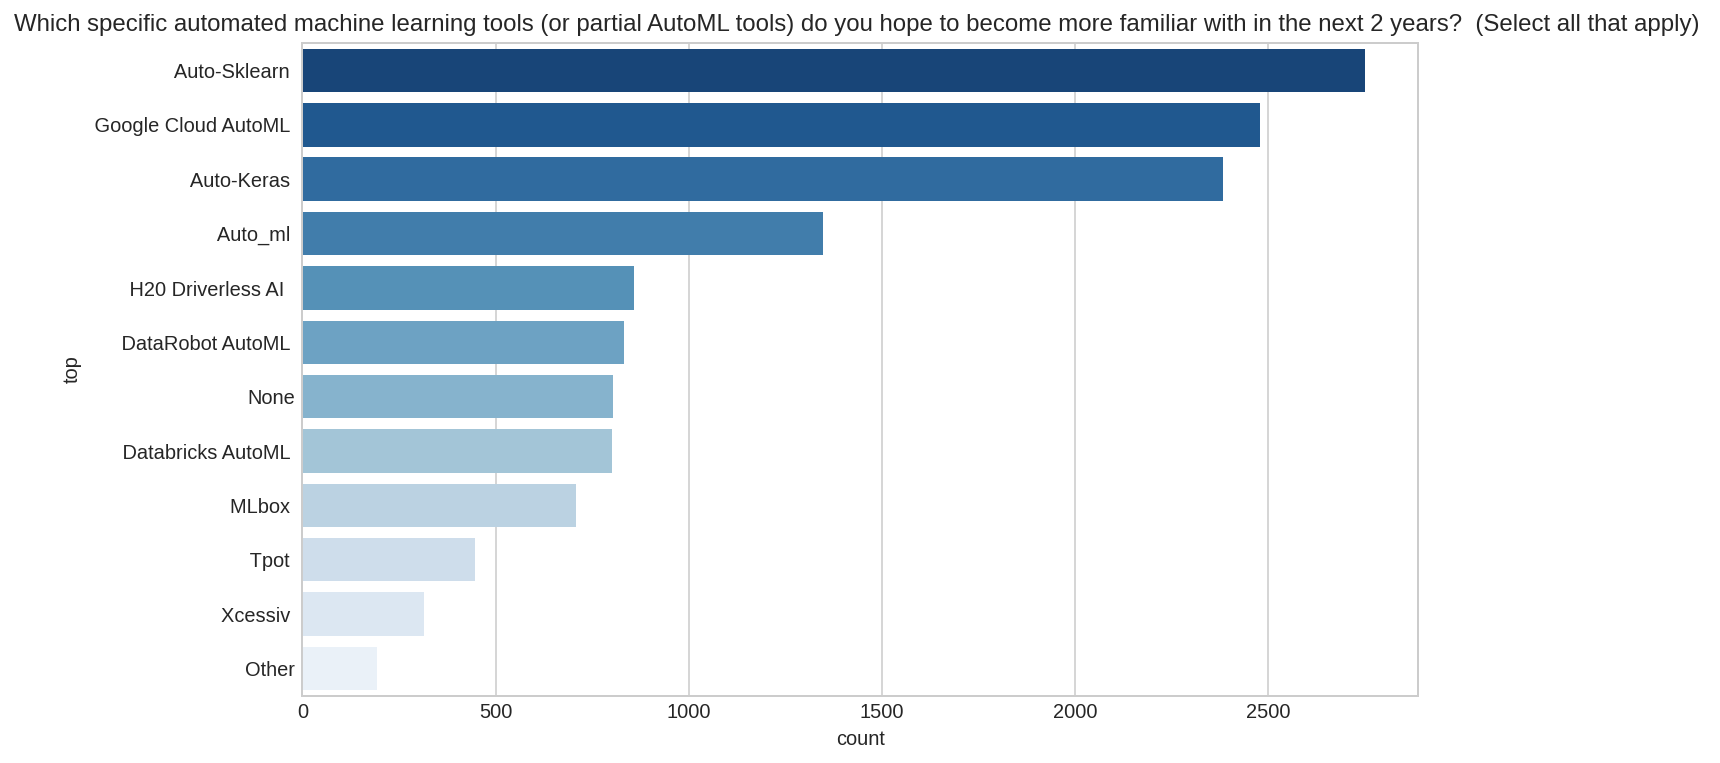

In [309]:
# 이후에는 어떻게 할건지
show_plot_by_qno("Q34_B")

Q35_A Do you use any tools to help manage machine learning experiments? (Select all that apply)

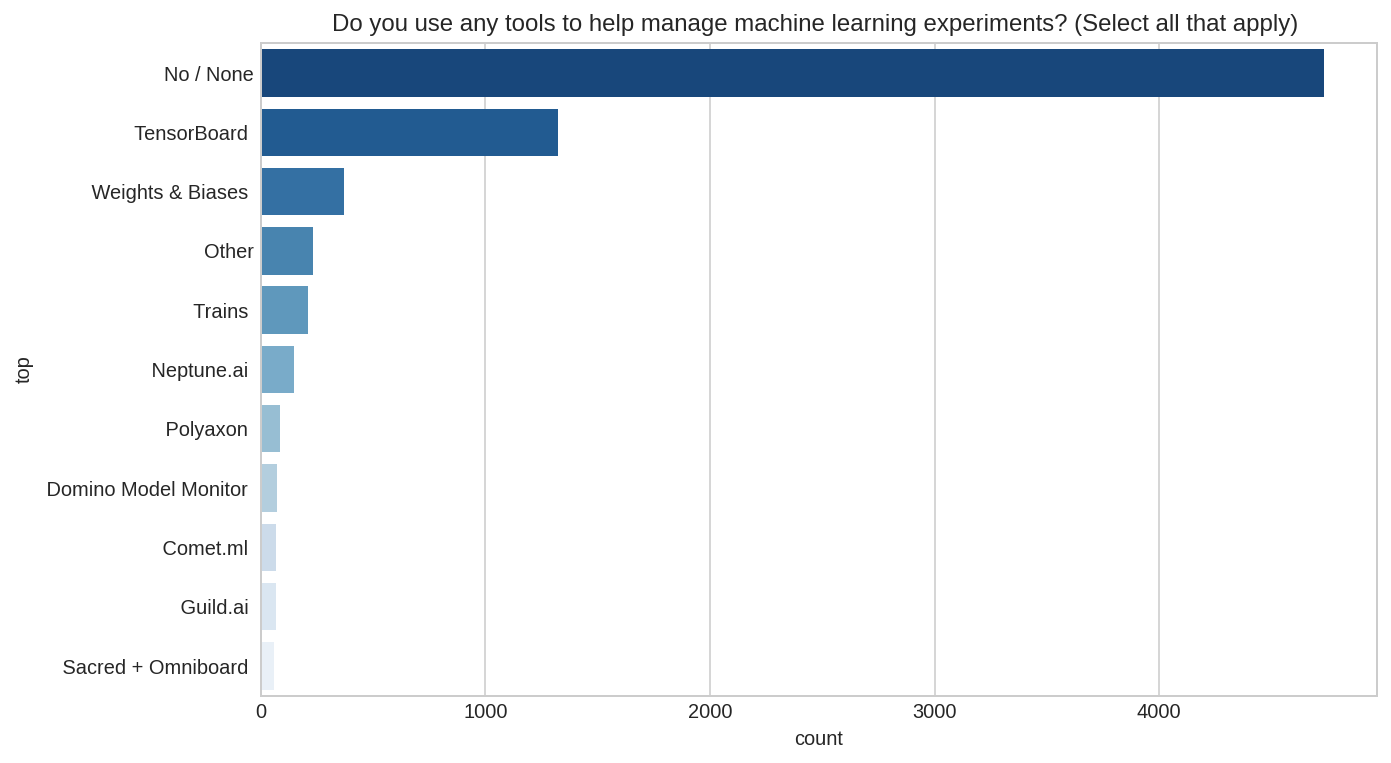

In [317]:
# 머신러닝 제품군을 운영하면서 어떤 툴을 통해 도움받고 있는지
show_plot_by_qno("Q35_A")

Q35_B In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)

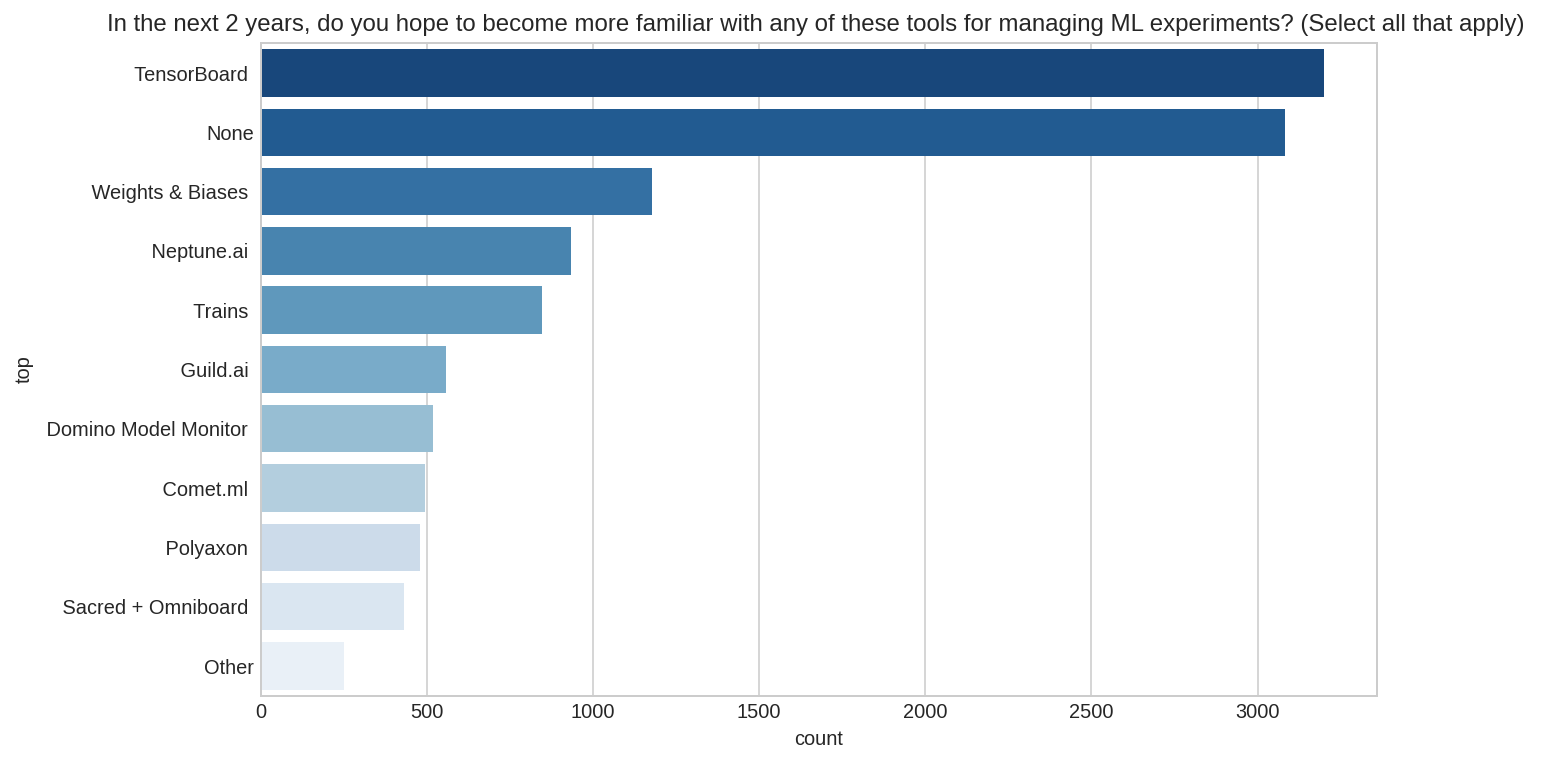

In [318]:
# 이후에 어떻게 할건지
show_plot_by_qno("Q35_B")

Q36 Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)

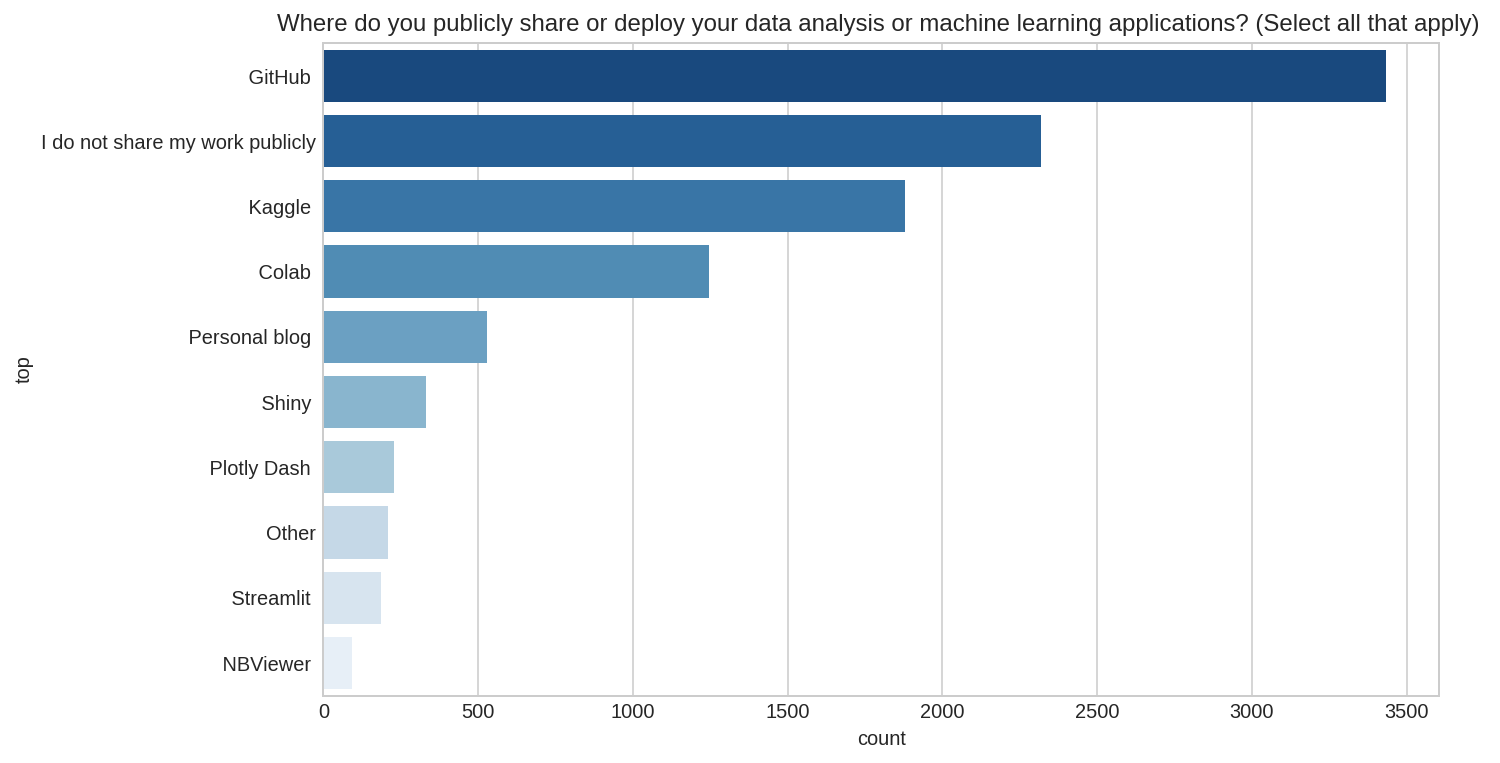

In [323]:
# 머신러닝 한 걸 주로 어디에 공유하는지
show_plot_by_qno("Q36")

Q37 On which platforms have you begun or completed data science courses? (Select all that apply)

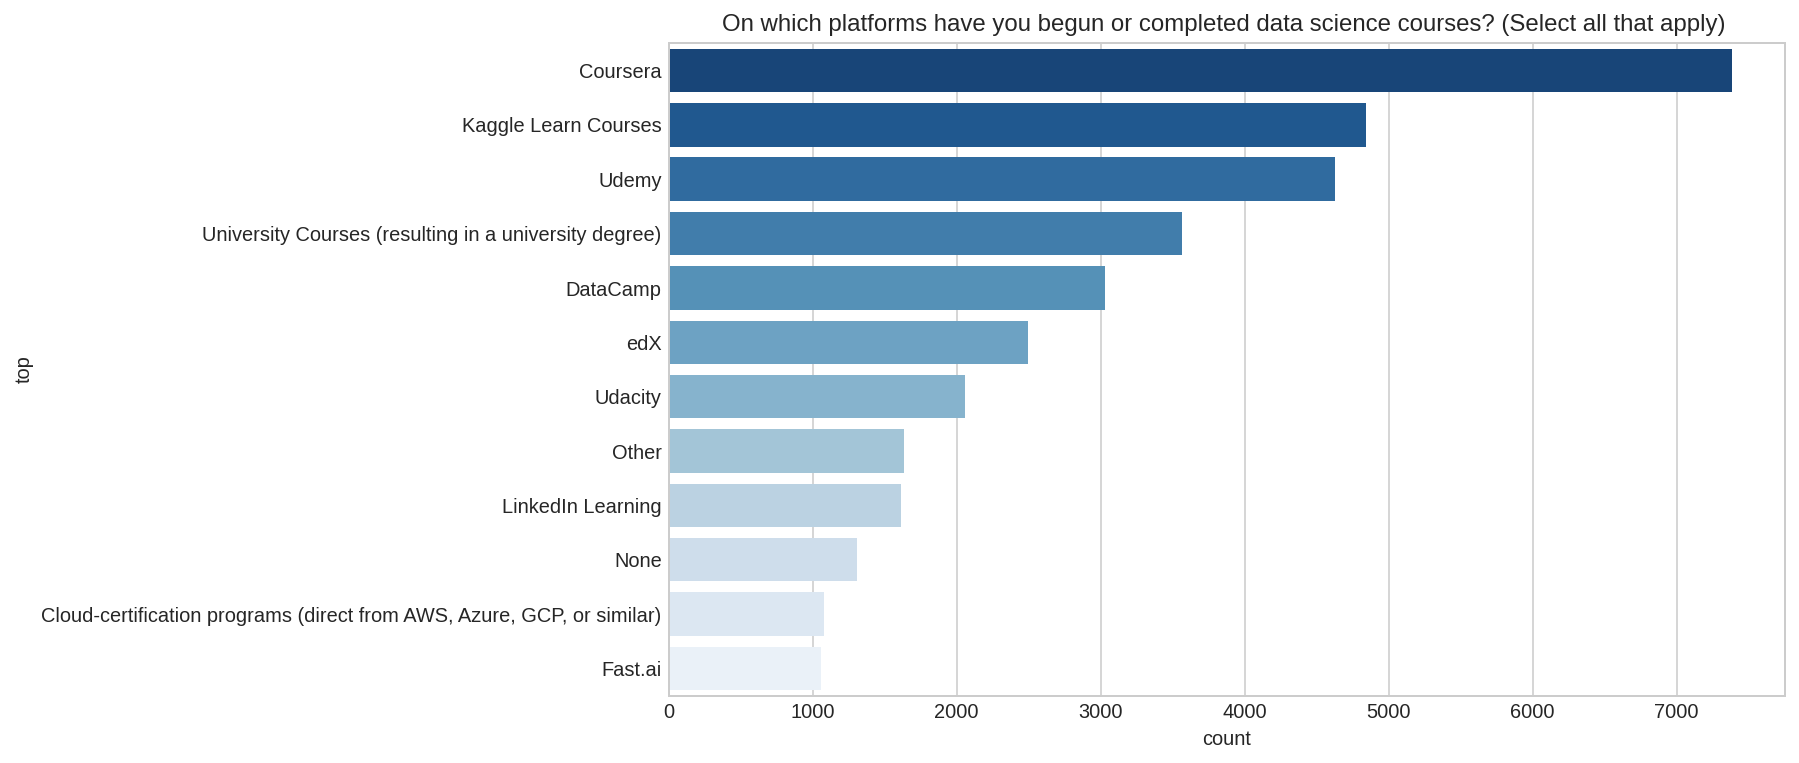

In [324]:
# 어디에서 데이터 사이언스 코스를 시작하거나 완주했는지
show_plot_by_qno("Q37")

In [ ]:
# 한국은 어디에서 하는지 알아보자


Q38 What is the primary tool that you use at work or school to analyze data? (Include text response)

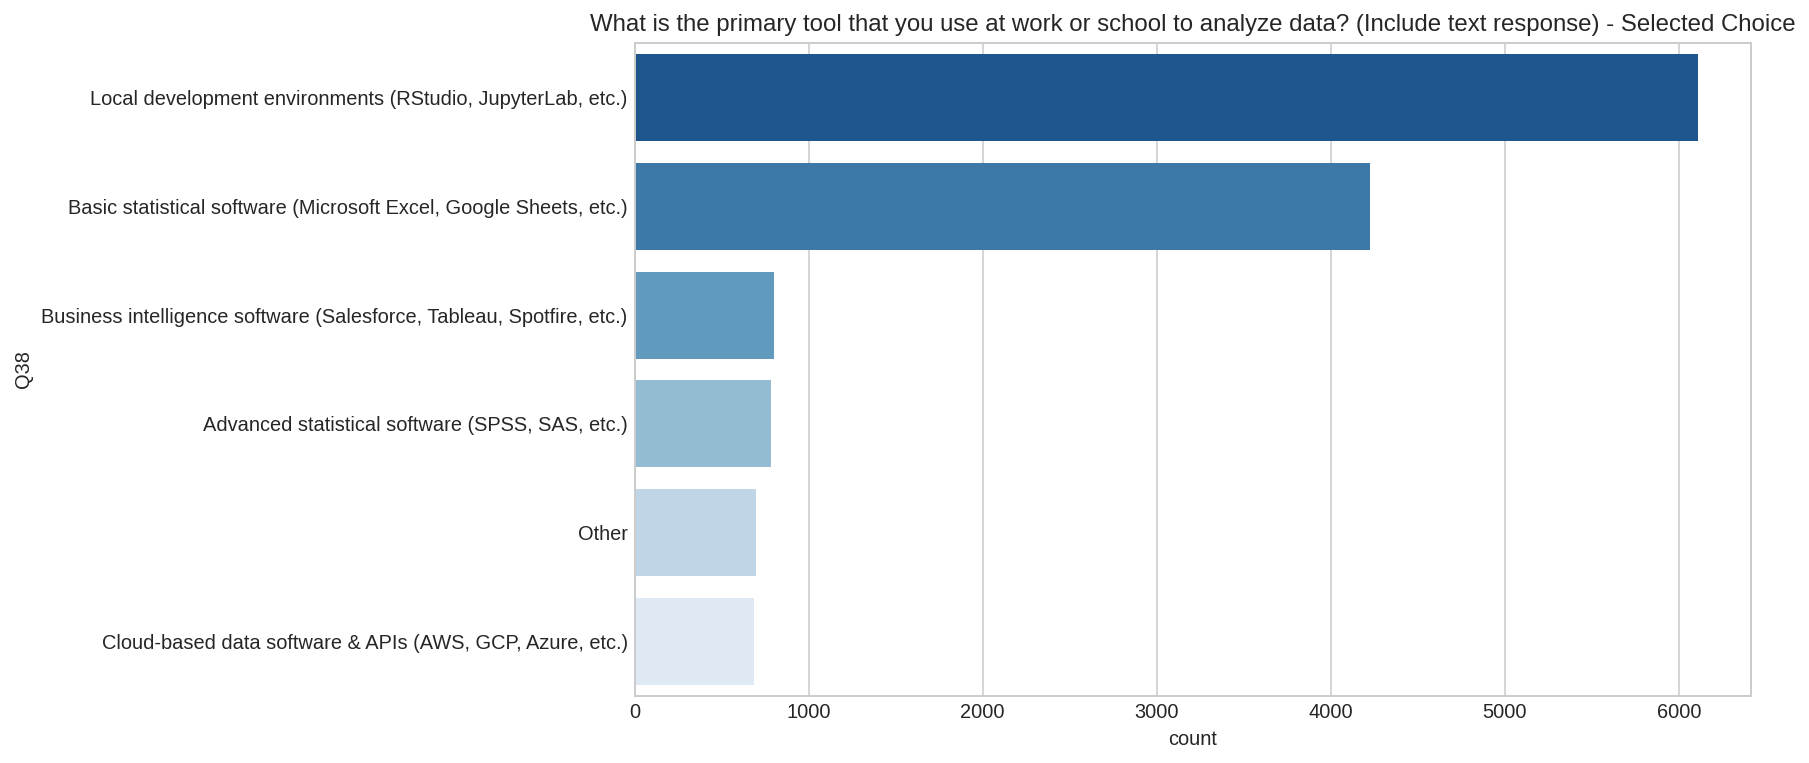

In [326]:
# 학교나 업무할 때 어떤 툴을 가장 우선적으로 사용하는지
show_plot_by_qno("Q38")

Q39 Who/what are your favorite media sources that report on data science topics? (Select all that apply)

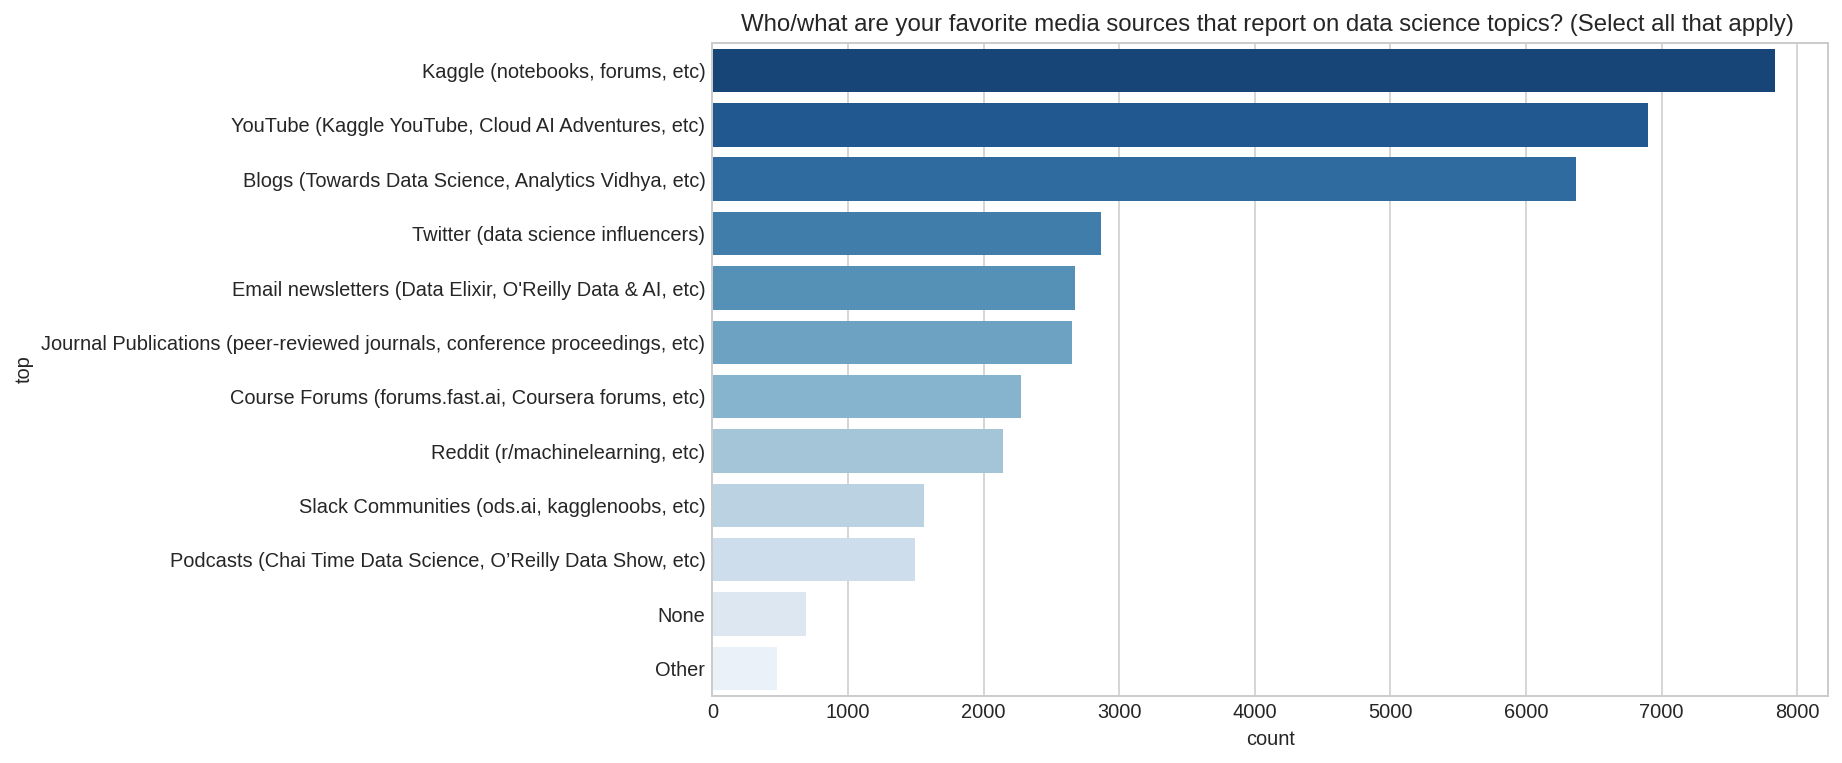

In [327]:
# 가장 선호하는 미디어가 어디인지
show_plot_by_qno("Q39")

In [ ]:
'''
캐글 노트북을 내 컴퓨터로 가져와 실습하고 싶다면?

Kaggle에서 Copy and Edit 버튼이 있는데 
이 버튼을 눌러서 Copy해온 뒤에 Edit 눌러주기
왼쪽 상단 보면 File 가 있고, 여기에서 다운로드를 받을 수 있다.
주피터 노트북 파일(.ipynb)로 받아진다. 
해당 파일 복사 내가 옮기고자 하는 폴더에서 붙여넣기

또는 구글 colab에서 하고 싶은 경우
똑같이 다운로드 받은 파일을 
colab 을 사용하려는 폴더로 복사붙여넣기 해주면 된다.
'''